In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import networkx as nx
from datetime import datetime
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import folium
from datetime import datetime
import matplotlib.dates as mdates
from pyvis.network import Network
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations


In [2]:
data = pd.read_csv("CLIWOC15.csv")

data.shape


/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/378731438.py:1: DtypeWarning: Columns (5,6,7,8,11,13,18,19,23,24,25,26,28,29,30,34,35,38,43,44,46,73,77,81,82,84,85,87,88,94,96,97,98,99,111,114,116,119,120,122,124,125,127,129,131,133,135,137,140) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("CLIWOC15.csv")


(280280, 141)

In [3]:
data.head

<bound method NDFrame.head of          RecID InstAbbr                    InstName  InstPlace  \
0          108      MNM  Archivo Museo Naval Madrid     Madrid   
1          109      MNM  Archivo Museo Naval Madrid     Madrid   
2          110      MNM  Archivo Museo Naval Madrid     Madrid   
3          111      MNM  Archivo Museo Naval Madrid     Madrid   
4          112      MNM  Archivo Museo Naval Madrid     Madrid   
...        ...      ...                         ...        ...   
280275  280276      NMM    National Maritime Museum  Greenwich   
280276  280277      NMM    National Maritime Museum  Greenwich   
280277  280278      NMM    National Maritime Museum  Greenwich   
280278  280279      NMM    National Maritime Museum  Greenwich   
280279  280280      NMM    National Maritime Museum  Greenwich   

              InstLand NumberEntry NameArchiveSet ArchivePart Specification  \
0                Spain         NaN            NaN         NaN           NaN   
1                Sp

In [4]:
data.head()
# Assuming you have a DataFrame called df
unique_country = data['InstLand'].unique()

print("Number of unique values in 'InstLand':", unique_country)

Number of unique values in 'InstLand': ['Spain' 'United Kingdom' 'France' 'Nederland' 'Sweden']


In [5]:
unique_year = data['Year'].unique()
unique_year.sort()
print(unique_year)

[1662 1663 1675 1676 1677 1699 1742 1745 1746 1747 1748 1749 1750 1751
 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765
 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779
 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792 1793
 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805 1806 1807
 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819 1820 1821
 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835
 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849
 1850 1851 1852 1853 1854 1855]


In [6]:

# Filter the data to include only the years 1770 to 1790
filtered_data = data[(data['Year'] >= 1770) & (data['Year'] <= 1779)]

# Create a new dataframe from the filtered data
new_dataframe = pd.DataFrame(filtered_data)

# Display the shape of the new dataframe
print('New dataframe shape:', new_dataframe.shape)


New dataframe shape: (46237, 141)


In [7]:
def columns_with_many_nans(df, threshold):
    """
    Returns a list of column names in the DataFrame that have more than the specified threshold of NaN values.
    """
    nan_count = df.isnull().sum()
    columns_with_excess_nans = nan_count[nan_count > threshold].index.tolist()
    return columns_with_excess_nans

threshold_start=256000
columns_with_excess_nan_values = columns_with_many_nans(new_dataframe, threshold_start)


# Deleting the columns with excess NaN values
df_cleaned_empty = new_dataframe.drop(columns_with_excess_nan_values, axis=1)
print(df_cleaned_empty.shape)

(46237, 141)


In [8]:
# Creating a new column 'Date' in the 'France' dataframe by concatenating the 'Day', 'Month', and 'Year' columns
# First, let's check if these columns exist in the dataframe
if {'Day', 'Month', 'Year'}.issubset(df_cleaned_empty.columns):
    # The columns exist, so we proceed to create the 'Date' column
    # We convert each column to string type to be able to concatenate them and then combine with a dash "-"
    df_cleaned_empty['Date'] = df_cleaned_empty['Year'].astype(str) + "-" + df_cleaned_empty['Month'].astype(str) + "-" + df_cleaned_empty['Day'].astype(str)
    # Showing the dataframe to confirm the new 'Date' column
    result = df_cleaned_empty[['Day', 'Month', 'Year', 'Date']].head()  # Displaying the first few rows to verify
else:
    result = "One or more of the 'Day', 'Month', or 'Year' columns do not exist in the 'Nederland' dataframe."

result


Day  Month  Year       Date
12   13      3  1774  1774-3-13
13   14      3  1774  1774-3-14
14   15      3  1774  1774-3-15
15   16      3  1774  1774-3-16
16   17      3  1774  1774-3-17

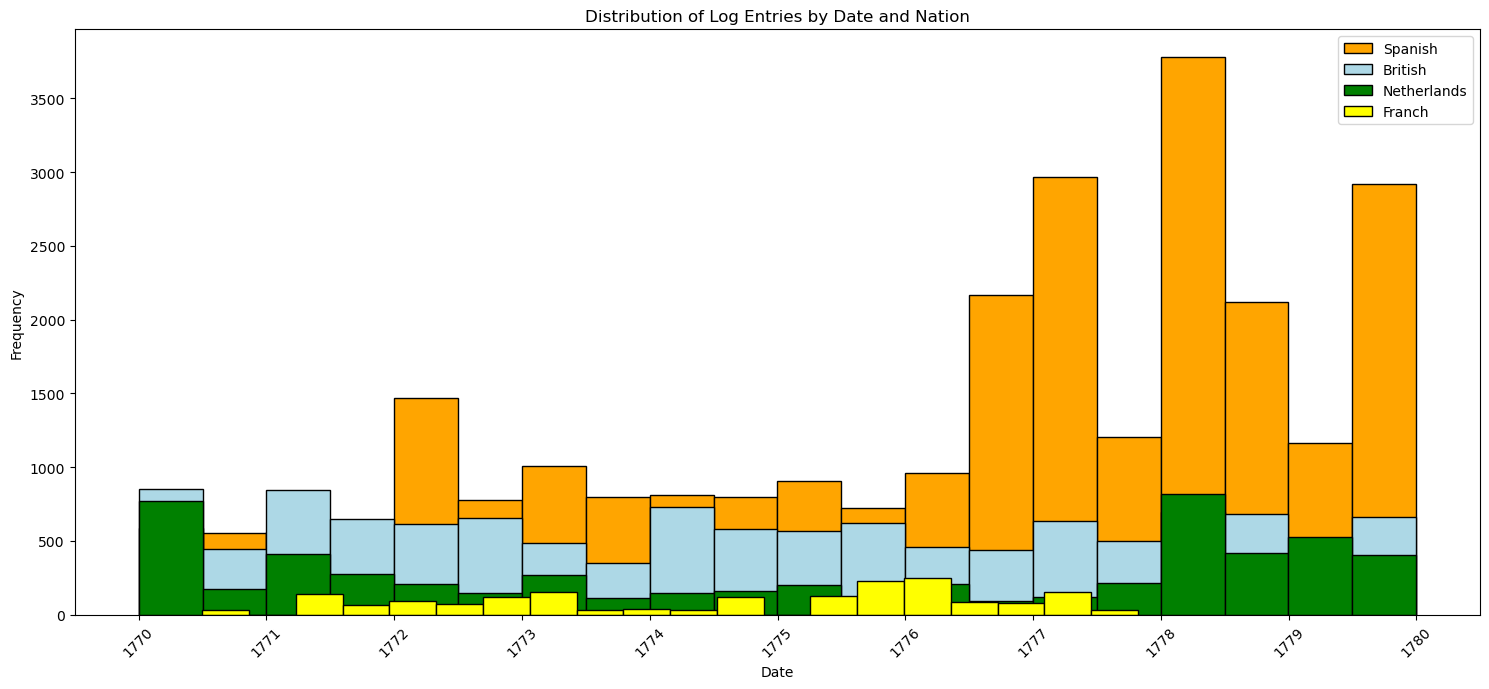

In [9]:


# Filter the data to include only rows with valid 'Date' and 'Nationality' values
filtered_data = df_cleaned_empty.dropna(subset=['Date', 'Nationality'])

# Convert 'Date' column to datetime format
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'], errors='coerce')

# Drop rows where Date could not be converted to datetime
filtered_data = filtered_data.dropna(subset=['Date'])




# Creating overlaying histograms for Spanish and British nationalities

# Filtering data for each nationality
spanish_data = filtered_data[filtered_data['Nationality'] == 'Spanish']
british_data = filtered_data[filtered_data['Nationality'] == 'British']
french_data = filtered_data[filtered_data['Nationality'] == 'French']
nederland_data = filtered_data[filtered_data['Nationality'] == 'Dutch']



# Plotting
plt.figure(figsize=(15, 7))

plt.hist(spanish_data['Date'], bins=20, alpha=1, label='Spanish', color='orange', edgecolor='black')
plt.hist(british_data['Date'], bins=20, alpha=1, label='British', color='lightblue', edgecolor='black')
plt.hist(nederland_data['Date'], bins=20, alpha=1, label='Netherlands', color='green', edgecolor='black')
plt.hist(french_data['Date'], bins=20, alpha=1, label='Franch', color='yellow', edgecolor='black')


plt.title('Distribution of Log Entries by Date and Nation')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/2413598497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spanish_data['Month'] = spanish_data['Date'].dt.month
/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/2413598497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  british_data['Month'] = british_data['Date'].dt.month
/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/2413598497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

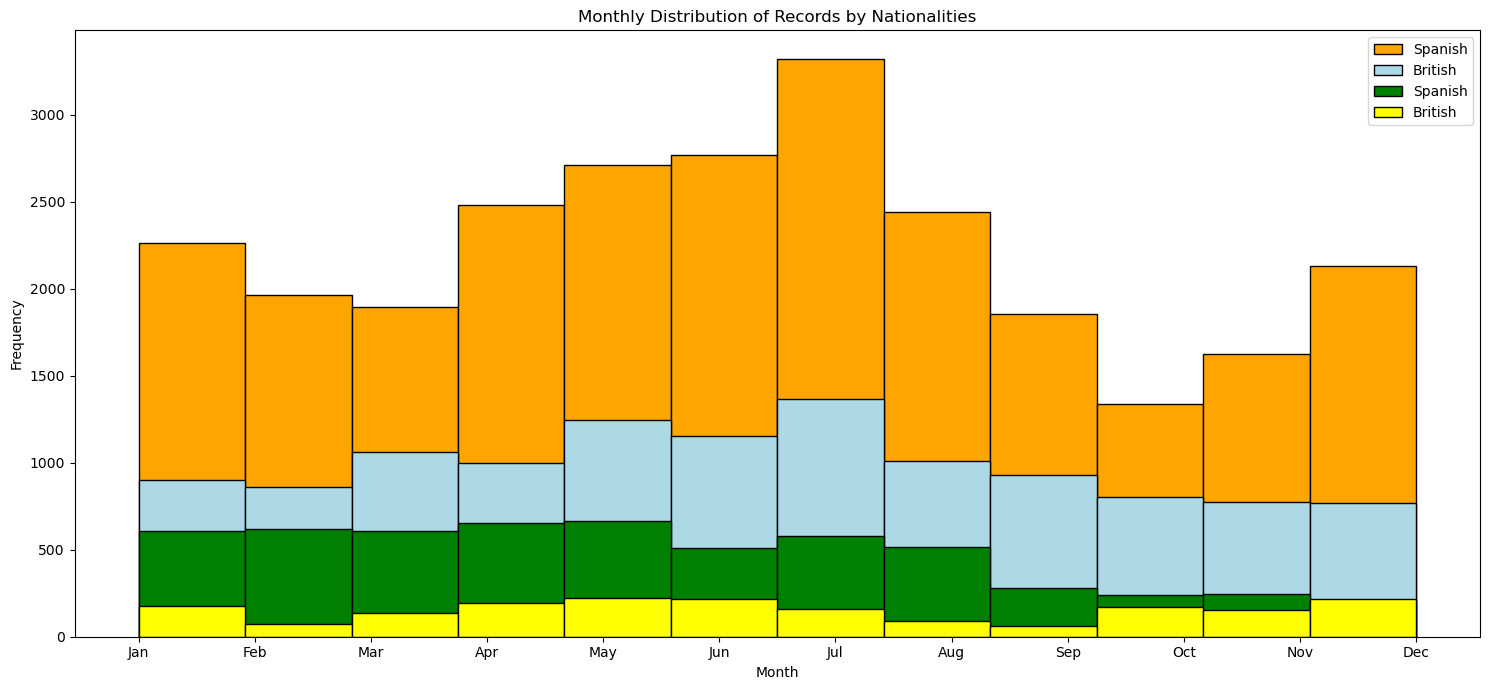

In [10]:
# Extracting month from the 'Date' column
spanish_data['Month'] = spanish_data['Date'].dt.month
british_data['Month'] = british_data['Date'].dt.month
nederland_data['Month'] = nederland_data['Date'].dt.month
french_data['Month'] = french_data['Date'].dt.month

# Plotting histograms for each month
plt.figure(figsize=(15, 7))

plt.hist(spanish_data['Month'], bins=12, alpha=1, label='Spanish', color='orange', edgecolor='black')
plt.hist(british_data['Month'], bins=12, alpha=1, label='British', color='lightblue', edgecolor='black')
plt.hist(nederland_data['Month'], bins=12, alpha=1, label='Spanish', color='green', edgecolor='black')
plt.hist(french_data['Month'], bins=12, alpha=1, label='British', color='yellow', edgecolor='black')


plt.title('Monthly Distribution of Records by Nationalities')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()


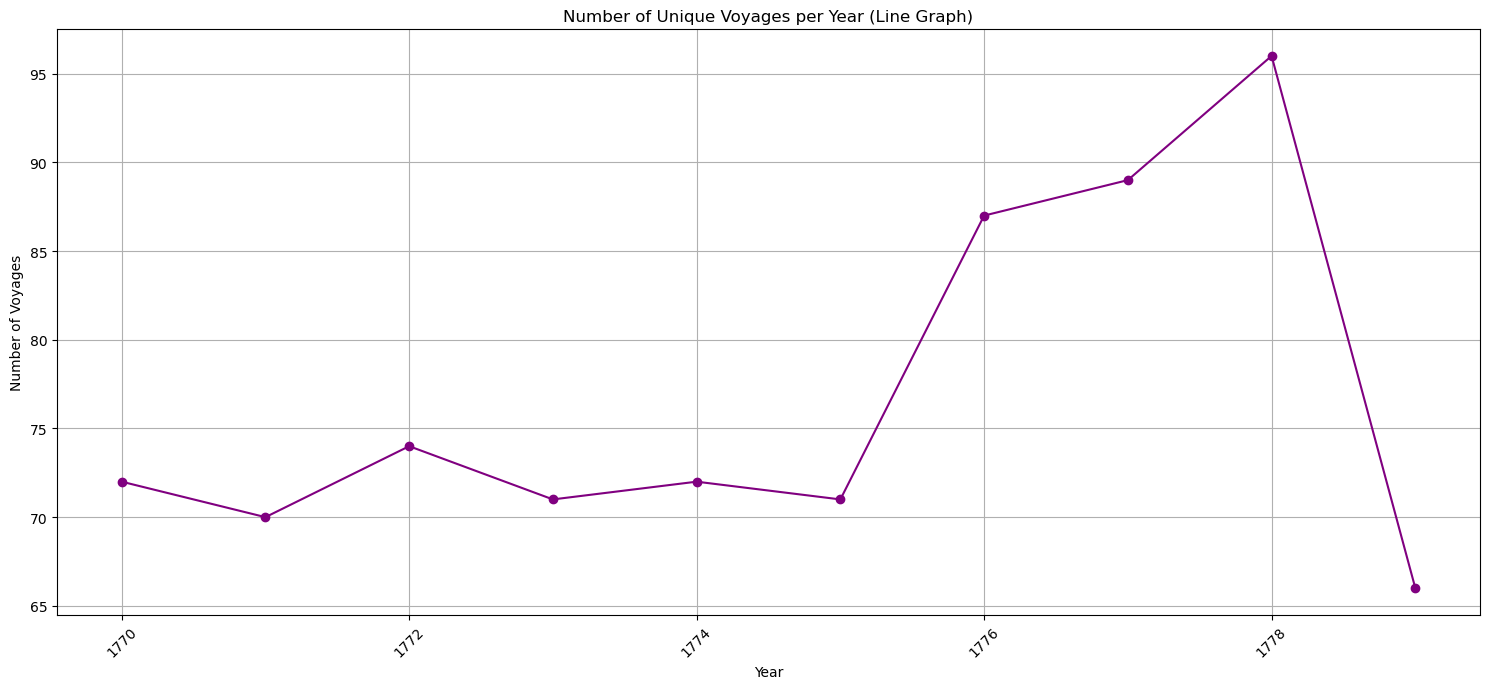

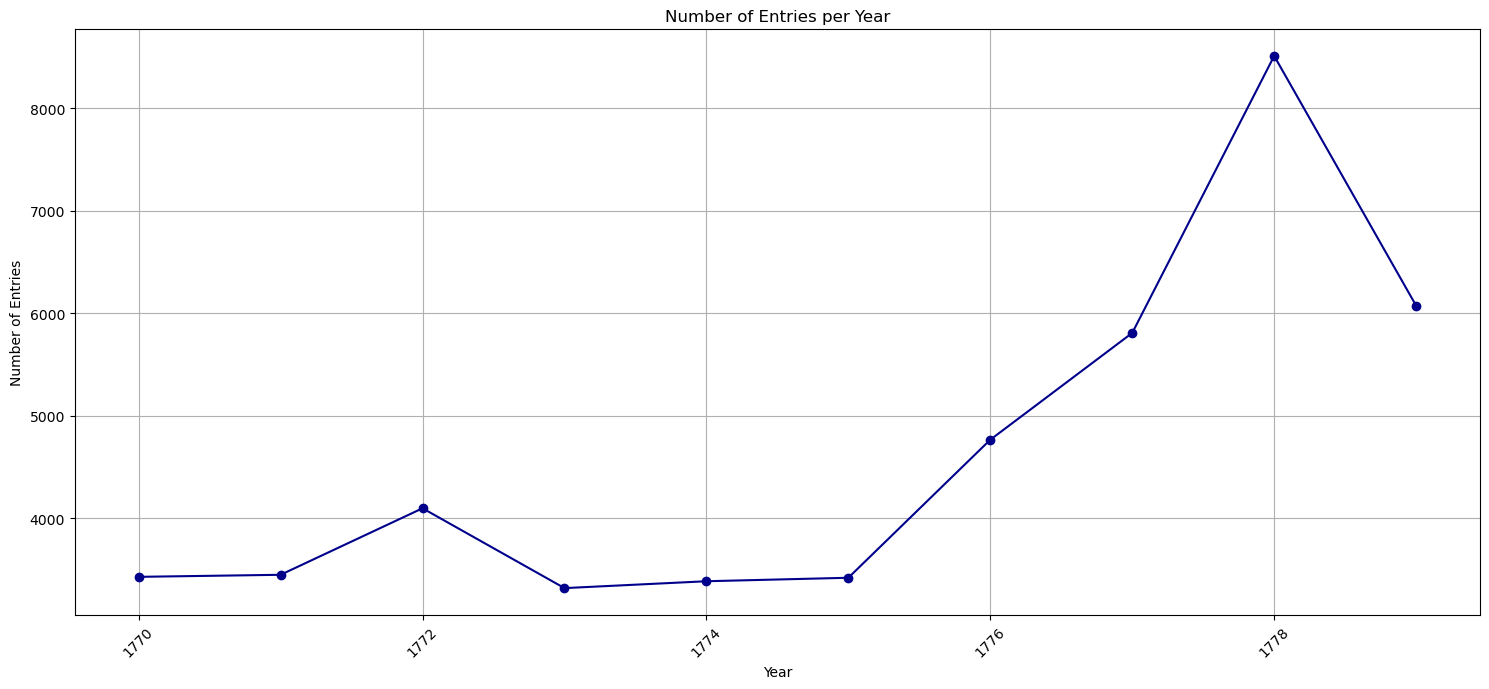

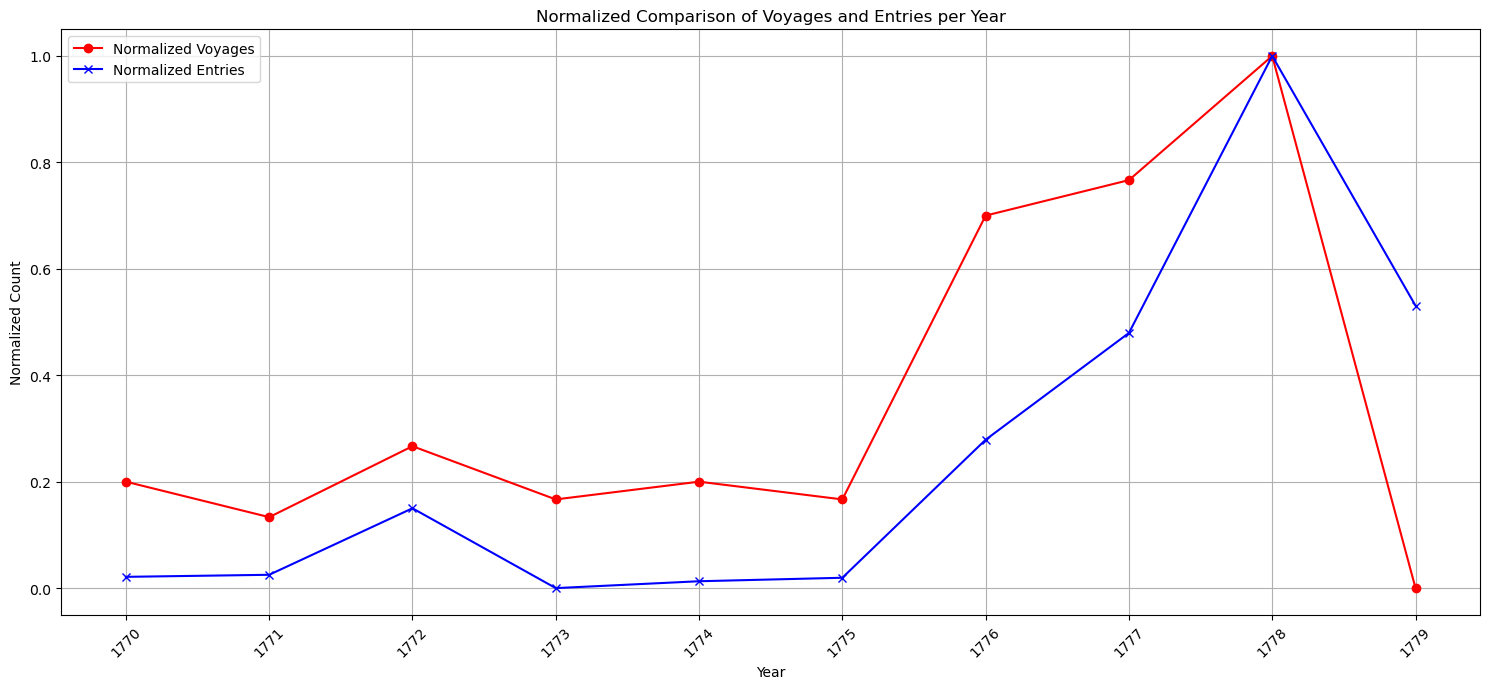

In [11]:
# Extracting the year from the 'Date' column
filtered_data['Year'] = filtered_data['Date'].dt.year

# Grouping by year and counting unique 'VoyageIni' values
voyages_per_year = filtered_data.groupby('Year')['VoyageIni'].nunique()



# Plotting the number of voyages per year as a line graph
plt.figure(figsize=(15, 7))
voyages_per_year.plot(kind='line', color='purple', marker='o')
plt.title('Number of Unique Voyages per Year (Line Graph)')
plt.xlabel('Year')
plt.ylabel('Number of Voyages')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grouping by year and counting the number of entries
entries_per_year = filtered_data.groupby('Year').size()

# Plotting the number of entries per year as a line graph
plt.figure(figsize=(15, 7))
entries_per_year.plot(kind='line', color='darkblue', marker='o')
plt.title('Number of Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.preprocessing import MinMaxScaler

# Normalizing both the number of voyages and the number of entries
scaler = MinMaxScaler()

# Reshaping data for normalization
voyages_array = voyages_per_year.values.reshape(-1, 1)
entries_array = entries_per_year.values.reshape(-1, 1)

# Applying normalization
normalized_voyages = scaler.fit_transform(voyages_array)
normalized_entries = scaler.fit_transform(entries_array)

# Creating a DataFrame for easier plotting
normalized_data = pd.DataFrame({
    'Year': voyages_per_year.index,
    'Normalized Voyages': normalized_voyages.flatten(),
    'Normalized Entries': normalized_entries.flatten()
})

years_to_display = list(range(1770, 1780))

# Plotting the normalized data
plt.figure(figsize=(15, 7))
plt.plot(normalized_data['Year'], normalized_data['Normalized Voyages'], label='Normalized Voyages', marker='o', color='red')
plt.plot(normalized_data['Year'], normalized_data['Normalized Entries'], label='Normalized Entries', marker='x', color='blue')
plt.title('Normalized Comparison of Voyages and Entries per Year')
plt.xlabel('Year')
plt.ylabel('Normalized Count')
plt.legend()
plt.xticks(years_to_display)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [112]:
# Assuming you have a DataFrame called df
unique_country = df_cleaned_empty['InstLand'].unique()

print("Number of unique values in 'InstLand':", unique_country)

Number of unique values in 'InstLand': ['Spain' 'United Kingdom' 'France' 'Nederland']


In [113]:
dataframes_dict = {}

for country in unique_country:
    dataframes_dict[country.strip()] = df_cleaned_empty[df_cleaned_empty['InstLand'] == country]
    
# Create seperate dataframes
Spain = dataframes_dict['Spain']
print('Spain:',Spain.shape)

UnitedKingdom = dataframes_dict['United Kingdom']
print('United Kingdom:',UnitedKingdom.shape)

France = dataframes_dict['France']
print('France:',France.shape)

Nederland = dataframes_dict['Nederland']
print('Dutch:',Nederland.shape)

Spain: (26785, 142)
United Kingdom: (11863, 142)
France: (1707, 142)
Dutch: (5882, 142)


###  Netherland Voyages

In [14]:
# Creating a new column 'Date' in the 'France' dataframe by concatenating the 'Day', 'Month', and 'Year' columns
# First, let's check if these columns exist in the dataframe
if {'Day', 'Month', 'Year'}.issubset(Nederland.columns):
    # The columns exist, so we proceed to create the 'Date' column
    # We convert each column to string type to be able to concatenate them and then combine with a dash "-"
    Nederland['Date'] = Nederland['Year'].astype(str) + "-" + Nederland['Month'].astype(str) + "-" + Nederland['Day'].astype(str)
    # Showing the dataframe to confirm the new 'Date' column
    result = Nederland[['Day', 'Month', 'Year', 'Date']].head()  # Displaying the first few rows to verify
else:
    result = "One or more of the 'Day', 'Month', or 'Year' columns do not exist in the 'Nederland' dataframe."

result

/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/2892889271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nederland['Date'] = Nederland['Year'].astype(str) + "-" + Nederland['Month'].astype(str) + "-" + Nederland['Day'].astype(str)


Day  Month  Year        Date
79162   30     12  1777  1777-12-30
79163   31     12  1777  1777-12-31
79188    1      1  1778    1778-1-1
79189    2      1  1778    1778-1-2
79190    3      1  1778    1778-1-3

In [108]:
# To find the unique 'VoyageFrom' and 'VoyageTo' pairings for each 'VoyageIni',
# we will first check if there are multiple pairings for any 'VoyageIni'.
# If there are multiple pairings, we will list them.

# Check if the columns 'VoyageIni', 'VoyageFrom', and 'VoyageTo' are in the dataframe
if {'VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName'}.issubset(Nederland.columns):
    # Create a DataFrame to hold the unique pairs
    Nederland_unique_pairs_df = Nederland.drop_duplicates(subset=['VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName'])

    # Now, we will filter out only those 'VoyageIni' that have a single 'VoyageFrom' and 'VoyageTo' pairing
    Nederland_unique_voyage_pairs = Nederland_unique_pairs_df.groupby('VoyageIni').filter(lambda x: len(x) == 1)

    # Display the unique 'VoyageFrom' and 'VoyageTo' pairings for each 'VoyageIni'
    Nederland_unique_pairings = Nederland_unique_voyage_pairs[['VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName']].dropna()
else:
    Nederland_unique_pairings = "The columns 'VoyageIni', 'VoyageFrom', or 'VoyageTo' do not exist in the dataset."

Nederland_unique_pairings



VoyageIni    VoyageFrom       VoyageTo                  ShipName
79162   17771230.0         Texel  St. Eustacius  Princes Royal Frederique
79753   17780214.0       Funchal   St Eustatius            Princes Louisa
79754   17770904.0     Gibraltar       Lissabon            Princes Louisa
79812   17780127.0      Lissabon        Funchal            Princes Louisa
79818   17780401.0  St Eustatius        Curacao            Princes Louisa
...            ...           ...            ...                       ...
232578  17730928.0        Guinee     Paramaribo            Vliegende Faam
232580  17740122.0    Paramaribo     St Maarten            Vliegende Faam
232587  17720930.0    Middelburg         Guinee            Vliegende Faam
232928  17710409.0        Guinea       Suriname            Vliegende Faam
233317  17740324.0    St Maarten     Middelburg            Vliegende Faam

[90 rows x 4 columns]

In [16]:

if 'Date' in Nederland.columns:
    # Convert 'Date' column to datetime format
    Nederland['Date'] = pd.to_datetime(Nederland['Date'], errors='coerce')
    
    # Group by 'VoyageIni' and find the smallest (min) and largest (max) dates
    Nederland_date_aggregations = Nederland.groupby('VoyageIni')['Date'].agg(MinDate='min', MaxDate='max')
    
    # Join the min and max date columns to the unique_pairings_with_ship_name dataframe
    Nederland_unique_pairings = Nederland_unique_pairings.join(Nederland_date_aggregations, on='VoyageIni')
else:
    Nederland_unique_pairings = "The 'Date' column does not exist or is not in the right format."

Nederland_unique_pairings


/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/4105196086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nederland['Date'] = pd.to_datetime(Nederland['Date'], errors='coerce')


VoyageIni    VoyageFrom       VoyageTo                  ShipName  \
79162   17771230.0         Texel  St. Eustacius  Princes Royal Frederique   
79753   17780214.0       Funchal   St Eustatius            Princes Louisa   
79754   17770904.0     Gibraltar       Lissabon            Princes Louisa   
79812   17780127.0      Lissabon        Funchal            Princes Louisa   
79818   17780401.0  St Eustatius        Curacao            Princes Louisa   
...            ...           ...            ...                       ...   
232578  17730928.0        Guinee     Paramaribo            Vliegende Faam   
232580  17740122.0    Paramaribo     St Maarten            Vliegende Faam   
232587  17720930.0    Middelburg         Guinee            Vliegende Faam   
232928  17710409.0        Guinea       Suriname            Vliegende Faam   
233317  17740324.0    St Maarten     Middelburg            Vliegende Faam   

          MinDate    MaxDate  
79162  1777-12-30 1778-02-24  
79753  1778-02-14 1778-03-09  
79754  1777-09-04 1777-10-19  
79812  1778-01-27 1778-02-11  
79818  1778-04-01 1778-04-06  
...           ...        ...  
232578 1773-09-28 1773-11-21  
232580 1774-01-22 1774-01-31  
232587 1772-09-30 1772-12-23  
232928 1771-04-09 1771-06-11  
233317 1774-03-24 1774-06-01  

[90 rows x 6 columns]

In [17]:
# To find the duration, we will subtract the 'min' date from the 'max' date for each 'VoyageIni'

# First, ensure the 'min' and 'max' columns are in the datetime format
Nederland_unique_pairings['MinDate'] = pd.to_datetime(Nederland_unique_pairings['MinDate'], errors='coerce')
Nederland_unique_pairings['MaxDate'] = pd.to_datetime(Nederland_unique_pairings['MaxDate'], errors='coerce')

# Calculating the duration as the difference between 'max' and 'min' dates
Nederland_unique_pairings['Duration'] = Nederland_unique_pairings['MaxDate'] - Nederland_unique_pairings['MinDate']

# Show the dataframe with the new 'Duration' column
Nederland_unique_pairings[['VoyageIni', 'VoyageFrom', 'VoyageTo', 'ShipName', 'MinDate', 'MaxDate', 'Duration']]

VoyageIni    VoyageFrom       VoyageTo                  ShipName  \
79162   17771230.0         Texel  St. Eustacius  Princes Royal Frederique   
79753   17780214.0       Funchal   St Eustatius            Princes Louisa   
79754   17770904.0     Gibraltar       Lissabon            Princes Louisa   
79812   17780127.0      Lissabon        Funchal            Princes Louisa   
79818   17780401.0  St Eustatius        Curacao            Princes Louisa   
...            ...           ...            ...                       ...   
232578  17730928.0        Guinee     Paramaribo            Vliegende Faam   
232580  17740122.0    Paramaribo     St Maarten            Vliegende Faam   
232587  17720930.0    Middelburg         Guinee            Vliegende Faam   
232928  17710409.0        Guinea       Suriname            Vliegende Faam   
233317  17740324.0    St Maarten     Middelburg            Vliegende Faam   

          MinDate    MaxDate Duration  
79162  1777-12-30 1778-02-24  56 days  
79753  1778-02-14 1778-03-09  23 days  
79754  1777-09-04 1777-10-19  45 days  
79812  1778-01-27 1778-02-11  15 days  
79818  1778-04-01 1778-04-06   5 days  
...           ...        ...      ...  
232578 1773-09-28 1773-11-21  54 days  
232580 1774-01-22 1774-01-31   9 days  
232587 1772-09-30 1772-12-23  84 days  
232928 1771-04-09 1771-06-11  63 days  
233317 1774-03-24 1774-06-01  69 days  

[90 rows x 7 columns]

In [18]:
Nederland_unique_pairings['HomeCountry'] = 'Netherlands'

In [19]:
# Sort the dataframe first by 'ShipName' and then by 'min' date in ascending order to see the voyages in sequence
Nederland_sorted_ship_voyages = Nederland_unique_pairings.sort_values(by=['ShipName', 'MinDate'])

# Display the sorted dataframe to confirm the sequence of voyages for each ship
Nederland_sorted_ship_voyages.reset_index()[['VoyageIni', 'ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate']]

Nederland_sorted_ship_voyages['FormattedMin'] = Nederland_sorted_ship_voyages['MinDate'].dt.strftime('%B %d, %Y')
Nederland_sorted_ship_voyages['FormattedMax'] = Nederland_sorted_ship_voyages['MaxDate'].dt.strftime('%B %d, %Y')
Nederland_sorted_ship_voyages

VoyageIni      VoyageFrom        VoyageTo   ShipName    MinDate  \
187767  17700407.0       Amsterdam     Spitsbergen     Agatha 1770-04-07   
187768  17700810.0     Spitsbergen       Amsterdam     Agatha 1770-08-10   
94286   17741109.0         Batavia           Texel   Alkemade 1774-11-14   
91174   17770102.0       Rotterdam         Madeira     Allarm 1777-01-02   
91233   17770310.0         Madeira           Texel     Allarm 1777-03-10   
...            ...             ...             ...        ...        ...   
231656  17710112.0       Nederland  Gulf of Guinea  Zanggodin 1771-01-12   
231780  17710824.0  Gulf of Guinea        Suriname  Zanggodin 1771-08-24   
231785  17720125.0        Suriname       Nederland  Zanggodin 1772-01-25   
103626  17790107.0  Hellevoetsluis      Paramaribo     Zephyr 1779-01-07   
103675  17790630.0   Rio Demmerary  Hellevoetsluis     Zephyr 1779-06-30   

          MaxDate Duration  HomeCountry       FormattedMin        FormattedMax  
187767 1770-08-09 124 days  Netherlands     April 07, 1770     August 09, 1770  
187768 1770-09-01  22 days  Netherlands    August 10, 1770  September 01, 1770  
94286  1775-06-23 221 days  Netherlands  November 14, 1774       June 23, 1775  
91174  1777-01-29  27 days  Netherlands   January 02, 1777    January 29, 1777  
91233  1777-03-29  19 days  Netherlands     March 10, 1777      March 29, 1777  
...           ...      ...          ...                ...                 ...  
231656 1771-02-18  37 days  Netherlands   January 12, 1771   February 18, 1771  
231780 1771-11-01  69 days  Netherlands    August 24, 1771   November 01, 1771  
231785 1772-04-08  74 days  Netherlands   January 25, 1772      April 08, 1772  
103626 1779-02-21  45 days  Netherlands   January 07, 1779   February 21, 1779  
103675 1779-09-10  72 days  Netherlands      June 30, 1779  September 10, 1779  

[90 rows x 10 columns]

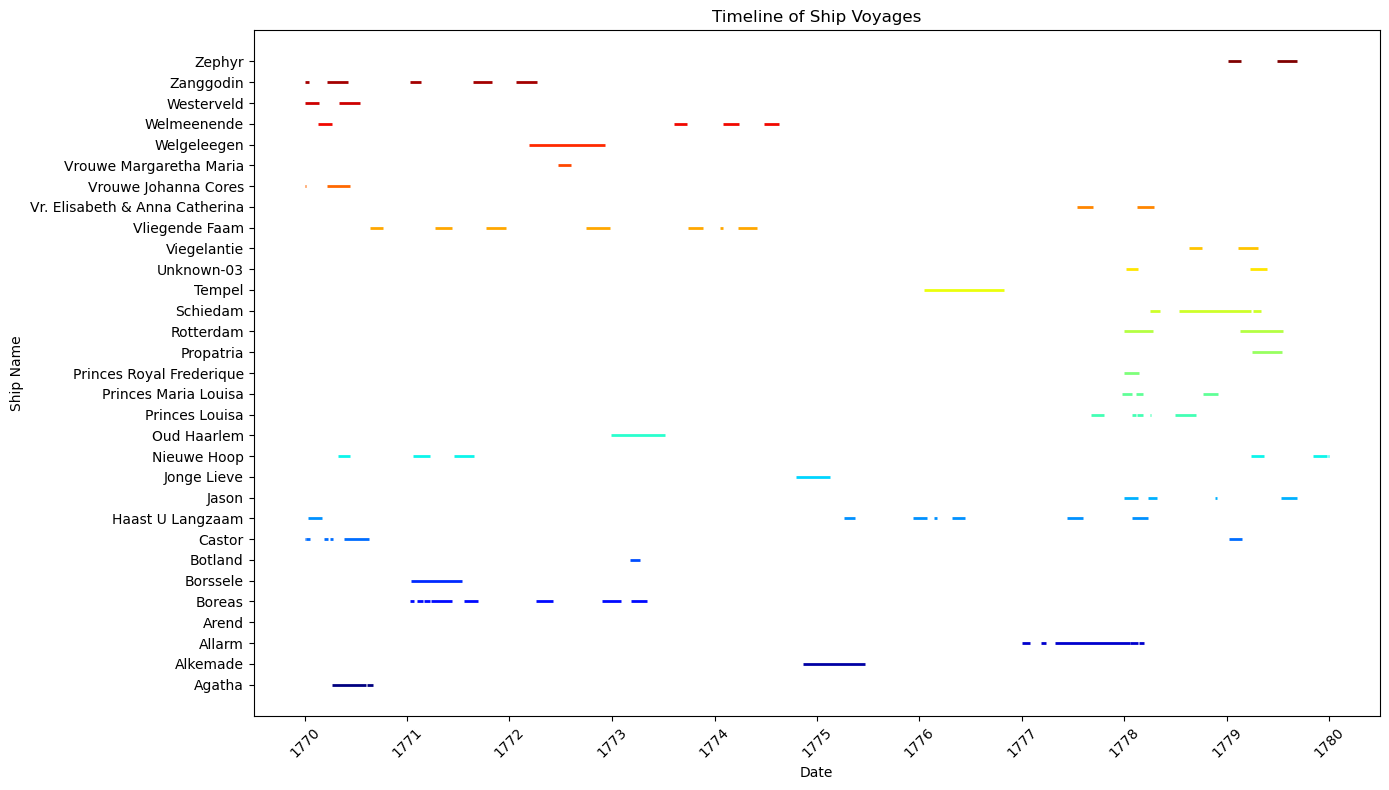

In [20]:

# Preparing the data for visualization
# We'll create a list of tuples with (ShipName, min_date, max_date) for each voyage
voyage_data = list(
    Nederland_sorted_ship_voyages[['ShipName', 'MinDate', 'MaxDate']].itertuples(index=False, name=None)
)

# Setting up the plot
plt.figure(figsize=(14, 8))
ax = plt.subplot()

# Each ship will have a unique color
colors = plt.cm.jet(np.linspace(0, 1, len(Nederland_sorted_ship_voyages['ShipName'].unique())))

# Creating a color dictionary for ships
color_dict = dict(zip(Nederland_sorted_ship_voyages['ShipName'].unique(), colors))

# Plotting each voyage as a line from min_date to max_date for the ship
for ship, group in Nederland_sorted_ship_voyages.groupby('ShipName'):
    for _, row in group.iterrows():
        plt.hlines(y=ship, xmin=row['MinDate'], xmax=row['MaxDate'], colors=color_dict[ship], lw=2)

# Formatting the dates on the x-axis to make them more readable
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Labels and title
plt.xlabel('Date')
plt.ylabel('Ship Name')
plt.title('Timeline of Ship Voyages')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [21]:
# Ensure the dataframe is sorted by 'ShipName' and start date
sorted_ship_voyages = Nederland_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Shift the 'VoyageTo' column within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageTo'].shift(-1)

# Compare the shifted 'VoyageTo' with the 'VoyageFrom' of the next voyage
sorted_ship_voyages['SameStartAsLastEnd'] = (
    sorted_ship_voyages['NextVoyageFrom'] == sorted_ship_voyages['VoyageFrom']
)

# Filter the dataframe to show only the rows where the start of a voyage matches the end of the previous voyage
same_start_end_voyages = sorted_ship_voyages[sorted_ship_voyages['SameStartAsLastEnd']]

# This will give you the rows where a ship starts a new voyage from where the last one ended
same_start_end_voyages[['ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate', 'NextVoyageFrom']]

ShipName      VoyageFrom            VoyageTo  \
187767                          Agatha       Amsterdam         Spitsbergen   
107604                       Rotterdam  Hellevoetsluis            Suriname   
163652                        Schiedam        Schiedam         Spitsbergen   
163648                        Schiedam     Spitsbergen            Schiedam   
125815  Vr. Elisabeth & Anna Catherina       Amsterdam            Suriname   
135816                      Westerveld         Batavia  Kaap de Goede Hoop   
103626                          Zephyr  Hellevoetsluis          Paramaribo   

          MinDate    MaxDate  NextVoyageFrom  
187767 1770-04-07 1770-08-09       Amsterdam  
107604 1778-01-01 1778-04-12  Hellevoetsluis  
163652 1778-04-02 1778-05-08        Schiedam  
163648 1778-07-14 1779-03-29     Spitsbergen  
125815 1777-07-17 1777-09-13       Amsterdam  
135816 1770-01-01 1770-02-20         Batavia  
103626 1779-01-07 1779-02-21  Hellevoetsluis

In [22]:
# Ensure the dataframe is sorted by 'ShipName' and start date
sorted_ship_voyages = Nederland_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Shift the 'VoyageTo' column within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageTo'].shift(-1)

# Compare the shifted 'VoyageTo' with the 'VoyageFrom' of the next voyage
sorted_ship_voyages['SameStartAsLastEnd'] = (
    sorted_ship_voyages['NextVoyageFrom'] == sorted_ship_voyages['VoyageFrom']
)

# Filter the dataframe to show only the rows where the start of a voyage matches the end of the previous voyage
same_start_end_voyages = sorted_ship_voyages[sorted_ship_voyages['SameStartAsLastEnd']]

# This will give you the rows where a ship starts a new voyage from where the last one ended
same_start_end_voyages[['ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate', 'NextVoyageFrom']]



ShipName      VoyageFrom            VoyageTo  \
187767                          Agatha       Amsterdam         Spitsbergen   
107604                       Rotterdam  Hellevoetsluis            Suriname   
163652                        Schiedam        Schiedam         Spitsbergen   
163648                        Schiedam     Spitsbergen            Schiedam   
125815  Vr. Elisabeth & Anna Catherina       Amsterdam            Suriname   
135816                      Westerveld         Batavia  Kaap de Goede Hoop   
103626                          Zephyr  Hellevoetsluis          Paramaribo   

          MinDate    MaxDate  NextVoyageFrom  
187767 1770-04-07 1770-08-09       Amsterdam  
107604 1778-01-01 1778-04-12  Hellevoetsluis  
163652 1778-04-02 1778-05-08        Schiedam  
163648 1778-07-14 1779-03-29     Spitsbergen  
125815 1777-07-17 1777-09-13       Amsterdam  
135816 1770-01-01 1770-02-20         Batavia  
103626 1779-01-07 1779-02-21  Hellevoetsluis

In [23]:
# To check if a ship's departure location is different from its last known arrival location,
# we'll need to compare the 'VoyageTo' of the last voyage with the 'VoyageFrom' of the next voyage.

# First, we sort the data by 'ShipName' and 'min' date again to ensure it's in order
sorted_ship_voyages = Nederland_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Now we create a new DataFrame which shifts the 'VoyageTo' column up by one within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageFrom'].shift(-1)

# We then check for rows where 'VoyageTo' doesn't match 'NextVoyageFrom' for the same 'ShipName'
discrepancies = sorted_ship_voyages[sorted_ship_voyages['VoyageTo'] != sorted_ship_voyages['NextVoyageFrom']]

# We're interested in cases where both 'VoyageTo' and 'NextVoyageFrom' are not NaN,
# meaning the ship has a recorded departure after the arrival
discrepancies = discrepancies.dropna(subset=['VoyageTo', 'NextVoyageFrom'])

# Show the discrepancies
discrepancies[['ShipName', 'VoyageTo', 'NextVoyageFrom','MinDate', 'MaxDate','Duration']].reset_index(drop=True)


ShipName            VoyageTo       NextVoyageFrom    MinDate  \
0             Boreas  St George d'Elmina  St George d'Elminar 1771-03-26   
1             Boreas            Suriname          West Indies 1771-07-23   
2             Boreas           Nederland            Amsterdam 1772-04-03   
3   Haast U Langzaam           Bramspunt            Rammekens 1770-01-14   
4   Haast U Langzaam          Middelburg            Rammekens 1776-04-27   
5   Haast U Langzaam         West Africa               Elmina 1777-06-10   
6        Nieuwe Hoop       Kaap Masurado               Elmina 1779-03-29   
7        Viegelantie             Guinnee  Guinnee (Kaap Axim) 1778-08-18   
8     Vliegende Faam           Rammekens           Middelburg 1771-10-08   
9        Welmeenende          Paramaribo            Nederland 1770-02-16   
10            Zephyr          Paramaribo        Rio Demmerary 1779-01-07   

      MaxDate Duration  
0  1771-06-11  77 days  
1  1771-09-12  51 days  
2  1772-06-04  62 days  
3  1770-03-02  47 days  
4  1776-06-11  45 days  
5  1777-08-07  58 days  
6  1779-05-14  46 days  
7  1778-10-06  49 days  
8  1771-12-20  73 days  
9  1770-04-08  51 days  
10 1779-02-21  45 days

In [24]:
# Assuming 'df' is your DataFrame with the ship voyage information
unique_voyage_from = Nederland_sorted_ship_voyages['VoyageFrom'].unique()
unique_voyage_to = Nederland_sorted_ship_voyages['VoyageTo'].unique()

# Combine and find unique locations
all_unique_places = pd.unique(np.concatenate((unique_voyage_from, unique_voyage_to)))

# Convert to a list
unique_places_list = all_unique_places.tolist()

# Now you have a list of all unique places
pd.DataFrame(unique_places_list)
unique_places_list

['Amsterdam',
 'Spitsbergen',
 'Batavia',
 'Rotterdam',
 'Madeira',
 'Texel',
 'Lissabon',
 'Hellevoetsluis',
 'Funchal',
 'Porto Praija',
 'Rio Sester',
 "St George d'Elminar",
 'West Indies',
 'Suriname',
 'Vlissingen',
 'Kaap de Goede Hoop',
 "St George d'Elmina",
 'Kaap Noord',
 'Fort Amsterdam',
 'St. Eustatius',
 'Curacao',
 'Malimba',
 'Rammekens',
 'West Africa',
 'St Eustatius',
 'Elmina',
 'St Christoffel',
 'St Eustacius',
 'Middelburg',
 'West Afrika',
 'Braamspunt',
 'Gibraltar',
 'Dordrecht',
 'Schiedam',
 'Urk',
 'Rammekes',
 'Guinnee (Kaap Axim)',
 'Guinea',
 'Guinee',
 'Paramaribo',
 'St Maarten',
 'Axim',
 'Gulf of Guinea',
 'Nederland',
 'Rio Demmerary',
 'Nieuwediep',
 'Columbo',
 'Bramspunt',
 'Kaap Masurado',
 'Ceylon',
 'Christiaan Zand',
 'St. Eustacius',
 'Bengal',
 'Guinnee',
 'Decima']

In [25]:
locations_list_df = pd.read_excel("Netherlands_Locations_List.xlsx")
Updated_Nederland_sorted_ship_voyages = Nederland_sorted_ship_voyages

In [26]:
# Create a mapping from the 'Location' to 'NewLocation'
location_mapping = locations_list_df.set_index('Location')['NewLocation'].to_dict()

# Replace the 'VoyageFrom' and 'VoyageTo' values in discrepancies_df with 'NewLocation' values
Updated_Nederland_sorted_ship_voyages['VoyageFrom'] = Updated_Nederland_sorted_ship_voyages['VoyageFrom'].map(location_mapping).fillna(Updated_Nederland_sorted_ship_voyages['VoyageFrom'])
Updated_Nederland_sorted_ship_voyages['VoyageTo'] = Updated_Nederland_sorted_ship_voyages['VoyageTo'].map(location_mapping).fillna(Updated_Nederland_sorted_ship_voyages['VoyageTo'])

# Display the first few rows to verify the changes
Updated_Nederland_sorted_ship_voyages


VoyageIni                  VoyageFrom                    VoyageTo  \
187767  17700407.0       Amsterdam Netherlands                    Svalbard   
187768  17700810.0                    Svalbard       Amsterdam Netherlands   
94286   17741109.0           Jakarta Indonesia           Texel Netherlands   
91174   17770102.0       Rotterdam Netherlands            Madeira Portugal   
91233   17770310.0            Madeira Portugal           Texel Netherlands   
...            ...                         ...                         ...   
231656  17710112.0       Amsterdam Netherlands                Ghana Africa   
231780  17710824.0                Ghana Africa         Braamspunt Suriname   
231785  17720125.0         Braamspunt Suriname       Amsterdam Netherlands   
103626  17790107.0  Hellevoetsluis Netherlands         Braamspunt Suriname   
103675  17790630.0         Braamspunt Suriname  Hellevoetsluis Netherlands   

         ShipName    MinDate    MaxDate Duration  HomeCountry  \
187767     Agatha 1770-04-07 1770-08-09 124 days  Netherlands   
187768     Agatha 1770-08-10 1770-09-01  22 days  Netherlands   
94286    Alkemade 1774-11-14 1775-06-23 221 days  Netherlands   
91174      Allarm 1777-01-02 1777-01-29  27 days  Netherlands   
91233      Allarm 1777-03-10 1777-03-29  19 days  Netherlands   
...           ...        ...        ...      ...          ...   
231656  Zanggodin 1771-01-12 1771-02-18  37 days  Netherlands   
231780  Zanggodin 1771-08-24 1771-11-01  69 days  Netherlands   
231785  Zanggodin 1772-01-25 1772-04-08  74 days  Netherlands   
103626     Zephyr 1779-01-07 1779-02-21  45 days  Netherlands   
103675     Zephyr 1779-06-30 1779-09-10  72 days  Netherlands   

             FormattedMin        FormattedMax  
187767     April 07, 1770     August 09, 1770  
187768    August 10, 1770  September 01, 1770  
94286   November 14, 1774       June 23, 1775  
91174    January 02, 1777    January 29, 1777  
91233      March 10, 1777      March 29, 1777  
...                   ...                 ...  
231656   January 12, 1771   February 18, 1771  
231780    August 24, 1771   November 01, 1771  
231785   January 25, 1772      April 08, 1772  
103626   January 07, 1779   February 21, 1779  
103675      June 30, 1779  September 10, 1779  

[90 rows x 10 columns]

In [27]:

# Create a mapping from the 'Location' to 'NewLocation'
location_mapping = locations_list_df.set_index('Location')['NewLocation'].to_dict()

# Replace the 'VoyageFrom' and 'VoyageTo' values in discrepancies_df with 'NewLocation' values
Updated_Nederland_sorted_ship_voyages['VoyageFrom'] = Updated_Nederland_sorted_ship_voyages['VoyageFrom'].map(location_mapping).fillna(Updated_Nederland_sorted_ship_voyages['VoyageFrom'])
Updated_Nederland_sorted_ship_voyages['VoyageTo'] = Updated_Nederland_sorted_ship_voyages['VoyageTo'].map(location_mapping).fillna(Updated_Nederland_sorted_ship_voyages['VoyageTo'])


Cleaned_Netherlands = Nederland_sorted_ship_voyages


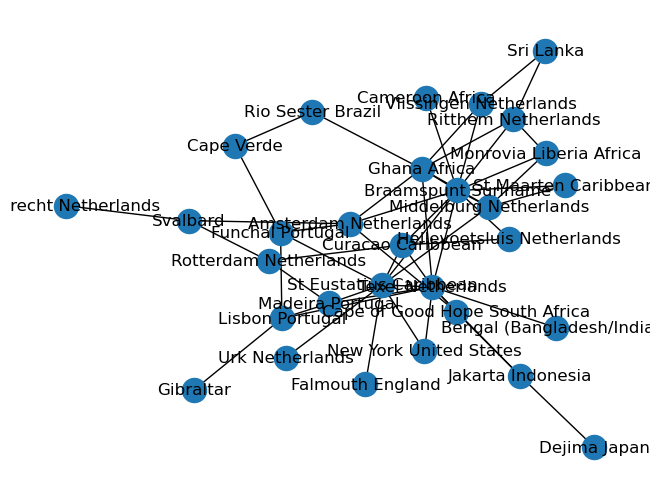

Netherland_Voyages.html


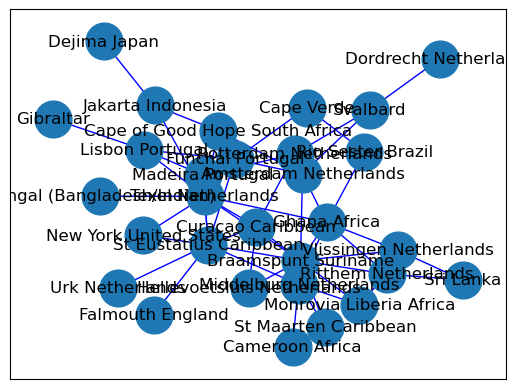

Netherland_Voyages.html


In [28]:
G = nx.from_pandas_edgelist(Updated_Nederland_sorted_ship_voyages, 'VoyageFrom', 'VoyageTo')

nx.draw(G, with_labels=True)
plt.show()

net = Network(notebook=True)
net.from_nx(G)
net.show('Netherland_Voyages.html')

pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='blue')
nx.draw_networkx_labels(G, pos)
plt.show()


for node in G.nodes:
    net.add_node(node, title=node)

for edge in G.edges:
    net.add_edge(edge[0], edge[1])

net.show('Netherland_Voyages.html')

###  France Voyages

In [29]:
# Creating a new column 'Date' in the 'France' dataframe by concatenating the 'Day', 'Month', and 'Year' columns
# First, let's check if these columns exist in the dataframe
if {'Day', 'Month', 'Year'}.issubset(France.columns):
    # The columns exist, so we proceed to create the 'Date' column
    # We convert each column to string type to be able to concatenate them and then combine with a dash "-"
    France['Date'] = France['Year'].astype(str) + "-" + France['Month'].astype(str) + "-" + France['Day'].astype(str)
    # Showing the dataframe to confirm the new 'Date' column
    result = France[['Day', 'Month', 'Year', 'Date']].head()  # Displaying the first few rows to verify
else:
    result = "One or more of the 'Day', 'Month', or 'Year' columns do not exist in the 'France' dataframe."

result

/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/2861059910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  France['Date'] = France['Year'].astype(str) + "-" + France['Month'].astype(str) + "-" + France['Day'].astype(str)


Day  Month  Year       Date
61794    7      8  1776   1776-8-7
61795    8      8  1776   1776-8-8
61796    9      8  1776   1776-8-9
61797   10      8  1776  1776-8-10
61798   11      8  1776  1776-8-11

In [30]:
# To find the unique 'VoyageFrom' and 'VoyageTo' pairings for each 'VoyageIni',
# we will first check if there are multiple pairings for any 'VoyageIni'.
# If there are multiple pairings, we will list them.

# Check if the columns 'VoyageIni', 'VoyageFrom', and 'VoyageTo' are in the dataframe
if {'VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName'}.issubset(France.columns):
    # Create a DataFrame to hold the unique pairs
    France_unique_pairs_df = France.drop_duplicates(subset=['VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName'])

    # Now, we will filter out only those 'VoyageIni' that have a single 'VoyageFrom' and 'VoyageTo' pairing
    France_unique_voyage_pairs = France_unique_pairs_df.groupby('VoyageIni').filter(lambda x: len(x) == 1)

    # Display the unique 'VoyageFrom' and 'VoyageTo' pairings for each 'VoyageIni'
    France_unique_pairings = France_unique_voyage_pairs[['VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName']].dropna()
else:
    France_unique_pairings = "The columns 'VoyageIni', 'VoyageFrom', or 'VoyageTo' do not exist in the dataset."

France_unique_pairings



VoyageIni   VoyageFrom  \
61868   17750605.0        Brest   
62040   17710504.0        Brest   
62072   17710620.0        Brest   
62116   17710807.0        Cadix   
62120   17710810.0      Malagua   
62140   17710923.0        Cadix   
64471   17751121.0        Brest   
64491   17760401.0   Martinique   
65098   17751001.0   Port Louis   
65109   17760310.0   Guadeloupe   
65847   17751107.0        Brest   
65936   17760421.0          Cap   
66067   17751123.0  St. Nazaire   
66069   17760930.0  St Domingue   
66380   17770301.0       Caribe   
66515   17761030.0    Rochefort   
66861   17721221.0   Isle d'Aix   
66977   17730603.0   Fort Royal   
67074   17721225.0        Brest   
67113   17730428.0          Cap   
67151   17740311.0        Brest   
67181   17740720.0  St Domingue   
67314   17770331.0        Havre   
67675   17741014.0        Brest   
67707   17750612.0   Martinique   
67826   17731119.0        Brest   
67864   17740916.0  St Domingue   
67923   17721210.0        Brest   
67964   17730324.0  St Domingue   
266701  17700702.0        Brest   
267807  17710420.0  Isle de Rhé   
267873  17711209.0  Isle de Rhé   
267934  17770409.0     Honfleur   
267988  17771004.0     Honfleur   

                                                 VoyageTo  \
61868                                          Fort Royal   
62040         Dominique, cadix, Malagua et retour a Brest   
62072                                               Cadix   
62116                                             Malagua   
62120         Dominique, cadix, Malagua et retour a Brest   
62140                                               Brest   
64471                                          Martinique   
64491                                               Brest   
65098                                          Martinique   
65109                                               Brest   
65847                                         St Domingue   
65936                                               Brest   
66067                                         St Domingue   
66069                                         St. Nazaire   
66380                                           Rochefort   
66515                                          Martinique   
66861                                          Fort Royal   
66977                                          Isle d'Aix   
67074                                                 Cap   
67113                                               Brest   
67151                                         St Domingue   
67181                                               Brest   
67314                                          Guadeloupe   
67675                                          Martinique   
67707                                           Rochefort   
67826                                         St Domingue   
67864                                               Brest   
67923                                         St Domingue   
67964                                               Brest   
266701  Martinique-Guadeloupe-Dominique-Sainte Lucie e...   
267807             Isles Michelon et retour a la Rochelle   
267873             Isles Michelon et retour a la Rochelle   
267934       Grand banc, terre Neuve et retour a Honfleur   
267988       Grand banc, terre Neuve et retour a Honfleur   

                       ShipName  
61868                Amphitrite  
62040            La Belle Poule  
62072            La Belle Poule  
62116            La Belle Poule  
62120            La Belle Poule  
62140            La Belle Poule  
64471            La Tourterelle  
64491            La Tourterelle  
65098                 Le Oiseau  
65109                 Le Oiseau  
65847            La Dedaigneuse  
65936            La Dedaigneuse  
66067               La Elourdie  
66069               La Elourdie  
66380               La Ménagére  
66515               La Ménagére  
66861             La Terpsicore  
66977             La Terpsicore  
6

In [31]:
# To include the smallest and largest dates associated with each 'VoyageIni',
# we will first ensure that the 'Date' column is in a proper date format.
# Then we will group the data by 'VoyageIni' and aggregate to find the min and max dates.

# Check if the 'Date' column is in the right format and if not, convert it to datetime
if 'Date' in France.columns:
    # Convert 'Date' column to datetime format
    France['Date'] = pd.to_datetime(France['Date'], errors='coerce')
    
    # Group by 'VoyageIni' and find the smallest (min) and largest (max) dates
    France_date_aggregations = France.groupby('VoyageIni')['Date'].agg(MinDate='min', MaxDate='max')
    
    # Join the min and max date columns to the unique_pairings_with_ship_name dataframe
    France_unique_pairings = France_unique_pairings.join(France_date_aggregations, on='VoyageIni')
else:
    France_unique_pairings = "The 'Date' column does not exist or is not in the right format."

France_unique_pairings


/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/1331504398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  France['Date'] = pd.to_datetime(France['Date'], errors='coerce')


VoyageIni   VoyageFrom  \
61868   17750605.0        Brest   
62040   17710504.0        Brest   
62072   17710620.0        Brest   
62116   17710807.0        Cadix   
62120   17710810.0      Malagua   
62140   17710923.0        Cadix   
64471   17751121.0        Brest   
64491   17760401.0   Martinique   
65098   17751001.0   Port Louis   
65109   17760310.0   Guadeloupe   
65847   17751107.0        Brest   
65936   17760421.0          Cap   
66067   17751123.0  St. Nazaire   
66069   17760930.0  St Domingue   
66380   17770301.0       Caribe   
66515   17761030.0    Rochefort   
66861   17721221.0   Isle d'Aix   
66977   17730603.0   Fort Royal   
67074   17721225.0        Brest   
67113   17730428.0          Cap   
67151   17740311.0        Brest   
67181   17740720.0  St Domingue   
67314   17770331.0        Havre   
67675   17741014.0        Brest   
67707   17750612.0   Martinique   
67826   17731119.0        Brest   
67864   17740916.0  St Domingue   
67923   17721210.0        Brest   
67964   17730324.0  St Domingue   
266701  17700702.0        Brest   
267807  17710420.0  Isle de Rhé   
267873  17711209.0  Isle de Rhé   
267934  17770409.0     Honfleur   
267988  17771004.0     Honfleur   

                                                 VoyageTo  \
61868                                          Fort Royal   
62040         Dominique, cadix, Malagua et retour a Brest   
62072                                               Cadix   
62116                                             Malagua   
62120         Dominique, cadix, Malagua et retour a Brest   
62140                                               Brest   
64471                                          Martinique   
64491                                               Brest   
65098                                          Martinique   
65109                                               Brest   
65847                                         St Domingue   
65936                                               Brest   
66067                                         St Domingue   
66069                                         St. Nazaire   
66380                                           Rochefort   
66515                                          Martinique   
66861                                          Fort Royal   
66977                                          Isle d'Aix   
67074                                                 Cap   
67113                                               Brest   
67151                                         St Domingue   
67181                                               Brest   
67314                                          Guadeloupe   
67675                                          Martinique   
67707                                           Rochefort   
67826                                         St Domingue   
67864                                               Brest   
67923                                         St Domingue   
67964                                               Brest   
266701  Martinique-Guadeloupe-Dominique-Sainte Lucie e...   
267807             Isles Michelon et retour a la Rochelle   
267873             Isles Michelon et retour a la Rochelle   
267934       Grand banc, terre Neuve et retour a Honfleur   
267988       Grand banc, terre Neuve et retour a Honfleur   

                       ShipName    MinDate    MaxDate  
61868                Amphitrite 1775-06-05 1775-07-06  
62040            La Belle Poule 1771-05-04 1771-06-15  
62072            La Belle Poule 1771-06-20 1771-07-25  
62116            La Belle Poule 1771-08-07 1771-08-10  
62120            La Belle Poule 1771-09-15 1771-09-20  
62140            La Belle Poule 1771-09-23 1771-10-10  
64471            La Tourterelle 1775-11-21 1775-12-28  
64491            La Tourterelle 1776-04-01 1776-05-03  
65098                 Le Oiseau 1775-10-01 1775-11-19  
65109                 Le Oiseau 1776-03-10 1776-04-14  
65847            La Dedaigneuse

In [32]:
# To find the duration, we will subtract the 'min' date from the 'max' date for each 'VoyageIni'

# First, ensure the 'min' and 'max' columns are in the datetime format
France_unique_pairings['MinDate'] = pd.to_datetime(France_unique_pairings['MinDate'], errors='coerce')
France_unique_pairings['MaxDate'] = pd.to_datetime(France_unique_pairings['MaxDate'], errors='coerce')

# Calculating the duration as the difference between 'max' and 'min' dates
France_unique_pairings['Duration'] = France_unique_pairings['MaxDate'] - France_unique_pairings['MinDate']

# Show the dataframe with the new 'Duration' column
France_unique_pairings[['VoyageIni', 'VoyageFrom', 'VoyageTo', 'ShipName', 'MinDate', 'MaxDate', 'Duration']]

VoyageIni   VoyageFrom  \
61868   17750605.0        Brest   
62040   17710504.0        Brest   
62072   17710620.0        Brest   
62116   17710807.0        Cadix   
62120   17710810.0      Malagua   
62140   17710923.0        Cadix   
64471   17751121.0        Brest   
64491   17760401.0   Martinique   
65098   17751001.0   Port Louis   
65109   17760310.0   Guadeloupe   
65847   17751107.0        Brest   
65936   17760421.0          Cap   
66067   17751123.0  St. Nazaire   
66069   17760930.0  St Domingue   
66380   17770301.0       Caribe   
66515   17761030.0    Rochefort   
66861   17721221.0   Isle d'Aix   
66977   17730603.0   Fort Royal   
67074   17721225.0        Brest   
67113   17730428.0          Cap   
67151   17740311.0        Brest   
67181   17740720.0  St Domingue   
67314   17770331.0        Havre   
67675   17741014.0        Brest   
67707   17750612.0   Martinique   
67826   17731119.0        Brest   
67864   17740916.0  St Domingue   
67923   17721210.0        Brest   
67964   17730324.0  St Domingue   
266701  17700702.0        Brest   
267807  17710420.0  Isle de Rhé   
267873  17711209.0  Isle de Rhé   
267934  17770409.0     Honfleur   
267988  17771004.0     Honfleur   

                                                 VoyageTo  \
61868                                          Fort Royal   
62040         Dominique, cadix, Malagua et retour a Brest   
62072                                               Cadix   
62116                                             Malagua   
62120         Dominique, cadix, Malagua et retour a Brest   
62140                                               Brest   
64471                                          Martinique   
64491                                               Brest   
65098                                          Martinique   
65109                                               Brest   
65847                                         St Domingue   
65936                                               Brest   
66067                                         St Domingue   
66069                                         St. Nazaire   
66380                                           Rochefort   
66515                                          Martinique   
66861                                          Fort Royal   
66977                                          Isle d'Aix   
67074                                                 Cap   
67113                                               Brest   
67151                                         St Domingue   
67181                                               Brest   
67314                                          Guadeloupe   
67675                                          Martinique   
67707                                           Rochefort   
67826                                         St Domingue   
67864                                               Brest   
67923                                         St Domingue   
67964                                               Brest   
266701  Martinique-Guadeloupe-Dominique-Sainte Lucie e...   
267807             Isles Michelon et retour a la Rochelle   
267873             Isles Michelon et retour a la Rochelle   
267934       Grand banc, terre Neuve et retour a Honfleur   
267988       Grand banc, terre Neuve et retour a Honfleur   

                       ShipName    MinDate    MaxDate Duration  
61868                Amphitrite 1775-06-05 1775-07-06  31 days  
62040            La Belle Poule 1771-05-04 1771-06-15  42 days  
62072            La Belle Poule 1771-06-20 1771-07-25  35 days  
62116            La Belle Poule 1771-08-07 1771-08-10   3 days  
62120            La Belle Poule 1771-09-15 1771-09-20   5 days  
62140            La Belle Poule 1771-09-23 1771-10-10  17 days  
64471            La Tourterelle 1775-11-21 1775-12-28  37 days  
64491            La Tourterelle 1776-04-01 1776-05-03  32 days  
65098                 Le Oiseau 1775-10-01 1775-11-19  49 days

In [33]:
France_unique_pairings['HomeCountry'] = 'France'

In [34]:
# Sort the dataframe first by 'ShipName' and then by 'min' date in ascending order to see the voyages in sequence
France_sorted_ship_voyages = France_unique_pairings.sort_values(by=['ShipName', 'MinDate'])

# Display the sorted dataframe to confirm the sequence of voyages for each ship
France_sorted_ship_voyages.reset_index()[['VoyageIni', 'ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate']]

France_sorted_ship_voyages['FormattedMin'] = France_sorted_ship_voyages['MinDate'].dt.strftime('%B %d, %Y')
France_sorted_ship_voyages['FormattedMax'] = France_sorted_ship_voyages['MaxDate'].dt.strftime('%B %d, %Y')
France_sorted_ship_voyages

VoyageIni   VoyageFrom  \
61868   17750605.0        Brest   
67074   17721225.0        Brest   
67113   17730428.0          Cap   
267934  17770409.0     Honfleur   
267988  17771004.0     Honfleur   
62040   17710504.0        Brest   
62072   17710620.0        Brest   
62116   17710807.0        Cadix   
62120   17710810.0      Malagua   
62140   17710923.0        Cadix   
65847   17751107.0        Brest   
65936   17760421.0          Cap   
66067   17751123.0  St. Nazaire   
66069   17760930.0  St Domingue   
66515   17761030.0    Rochefort   
66380   17770301.0       Caribe   
266701  17700702.0        Brest   
66861   17721221.0   Isle d'Aix   
66977   17730603.0   Fort Royal   
64471   17751121.0        Brest   
64491   17760401.0   Martinique   
67151   17740311.0        Brest   
67181   17740720.0  St Domingue   
67314   17770331.0        Havre   
65098   17751001.0   Port Louis   
65109   17760310.0   Guadeloupe   
67675   17741014.0        Brest   
67707   17750612.0   Martinique   
67826   17731119.0        Brest   
67864   17740916.0  St Domingue   
67923   17721210.0        Brest   
67964   17730324.0  St Domingue   
267807  17710420.0  Isle de Rhé   
267873  17711209.0  Isle de Rhé   

                                                 VoyageTo  \
61868                                          Fort Royal   
67074                                                 Cap   
67113                                               Brest   
267934       Grand banc, terre Neuve et retour a Honfleur   
267988       Grand banc, terre Neuve et retour a Honfleur   
62040         Dominique, cadix, Malagua et retour a Brest   
62072                                               Cadix   
62116                                             Malagua   
62120         Dominique, cadix, Malagua et retour a Brest   
62140                                               Brest   
65847                                         St Domingue   
65936                                               Brest   
66067                                         St Domingue   
66069                                         St. Nazaire   
66515                                          Martinique   
66380                                           Rochefort   
266701  Martinique-Guadeloupe-Dominique-Sainte Lucie e...   
66861                                          Fort Royal   
66977                                          Isle d'Aix   
64471                                          Martinique   
64491                                               Brest   
67151                                         St Domingue   
67181                                               Brest   
67314                                          Guadeloupe   
65098                                          Martinique   
65109                                               Brest   
67675                                          Martinique   
67707                                           Rochefort   
67826                                         St Domingue   
67864                                               Brest   
67923                                         St Domingue   
67964                                               Brest   
267807             Isles Michelon et retour a la Rochelle   
267873             Isles Michelon et retour a la Rochelle   

                       ShipName    MinDate    MaxDate Duration HomeCountry  \
61868                Amphitrite 1775-06-05 1775-07-06  31 days      France   
67074             L'actionnaire 1772-12-25 1773-01-22  28 days      France   
67113             L'actionnaire 1773-04-28 1773-06-05  38 days      France   
267934     L'aimable Marie Anne 1777-04-09 1777-06-22  74 days      France   
267988     L'aimable Marie Anne 1777-10-04 1777-10-27  23 days      France   
62040            La Belle Poule 1771-05-04 1771-06-15  42 days      France   
62072            La Belle Poule 1771-06-20 1771-07-25  35 days      France   
62116            La Bel

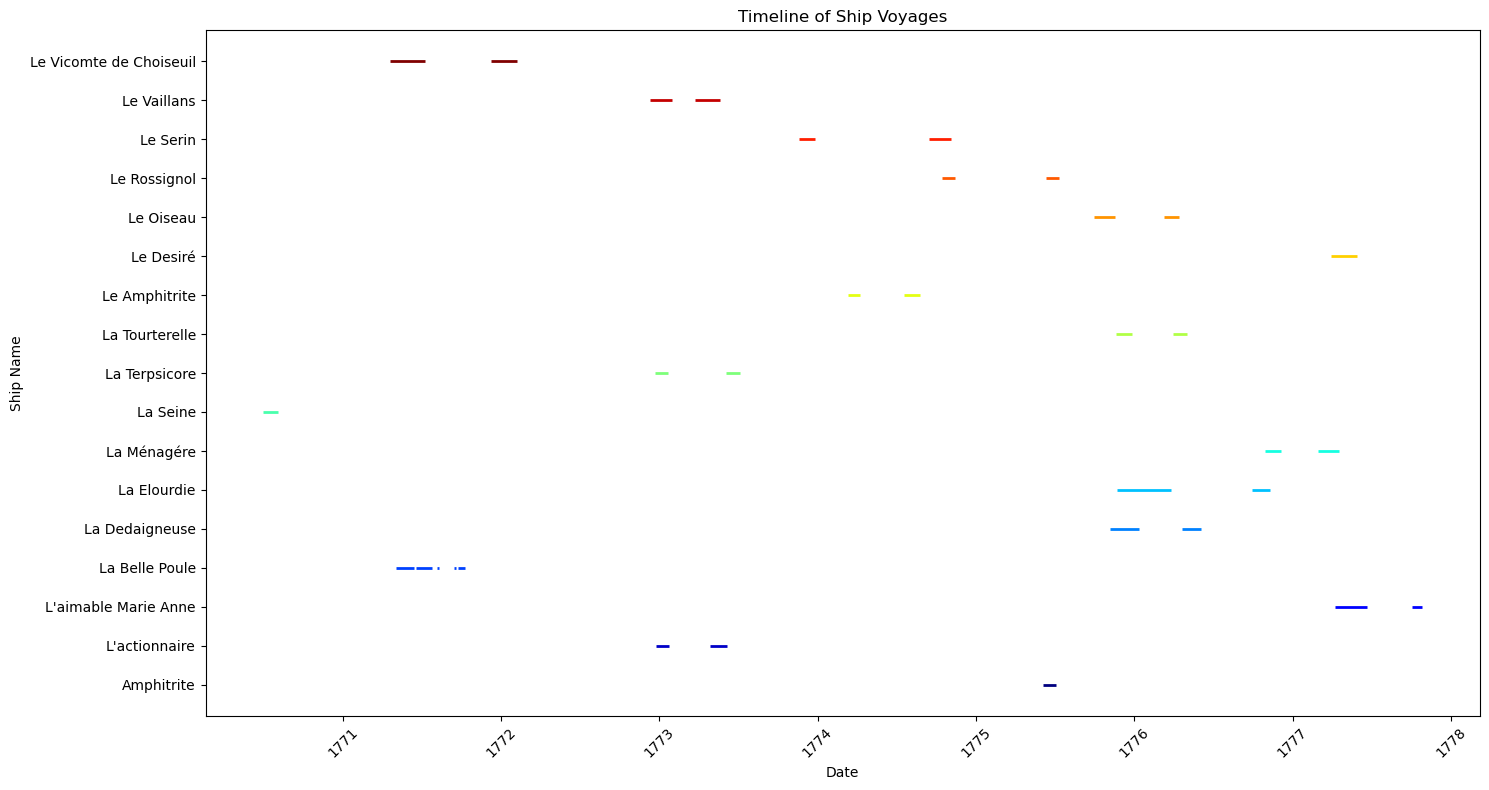

In [35]:
# Preparing the data for visualization
# We'll create a list of tuples with (ShipName, min_date, max_date) for each voyage
voyage_data = list(
    France_sorted_ship_voyages[['ShipName', 'MinDate', 'MaxDate']].itertuples(index=False, name=None)
)

# Setting up the plot
plt.figure(figsize=(15, 8))
ax = plt.subplot()

# Each ship will have a unique color
colors = plt.cm.jet(np.linspace(0, 1, len(France_sorted_ship_voyages['ShipName'].unique())))

# Creating a color dictionary for ships
color_dict = dict(zip(France_sorted_ship_voyages['ShipName'].unique(), colors))

# Plotting each voyage as a line from min_date to max_date for the ship
for ship, group in France_sorted_ship_voyages.groupby('ShipName'):
    for _, row in group.iterrows():
        plt.hlines(y=ship, xmin=row['MinDate'], xmax=row['MaxDate'], colors=color_dict[ship], lw=2)

# Formatting the dates on the x-axis to make them more readable
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Labels and title
plt.xlabel('Date')
plt.ylabel('Ship Name')
plt.title('Timeline of Ship Voyages')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [36]:
# Ensure the dataframe is sorted by 'ShipName' and start date
sorted_ship_voyages = France_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Shift the 'VoyageTo' column within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageTo'].shift(-1)

# Compare the shifted 'VoyageTo' with the 'VoyageFrom' of the next voyage
sorted_ship_voyages['SameStartAsLastEnd'] = (
    sorted_ship_voyages['NextVoyageFrom'] == sorted_ship_voyages['VoyageFrom']
)

# Filter the dataframe to show only the rows where the start of a voyage matches the end of the previous voyage
same_start_end_voyages = sorted_ship_voyages[sorted_ship_voyages['SameStartAsLastEnd']]

# This will give you the rows where a ship starts a new voyage from where the last one ended
same_start_end_voyages[['ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate', 'NextVoyageFrom']]

ShipName   VoyageFrom     VoyageTo    MinDate    MaxDate  \
67074   L'actionnaire        Brest          Cap 1772-12-25 1773-01-22   
65847  La Dedaigneuse        Brest  St Domingue 1775-11-07 1776-01-13   
66067     La Elourdie  St. Nazaire  St Domingue 1775-11-23 1776-03-27   
66515     La Ménagére    Rochefort   Martinique 1776-10-30 1776-12-05   
66861   La Terpsicore   Isle d'Aix   Fort Royal 1772-12-21 1773-01-21   
64471  La Tourterelle        Brest   Martinique 1775-11-21 1775-12-28   
67151   Le Amphitrite        Brest  St Domingue 1774-03-11 1774-04-09   
67826        Le Serin        Brest  St Domingue 1773-11-19 1773-12-26   
67923     Le Vaillans        Brest  St Domingue 1772-12-10 1773-01-29   

      NextVoyageFrom  
67074          Brest  
65847          Brest  
66067    St. Nazaire  
66515      Rochefort  
66861     Isle d'Aix  
64471          Brest  
67151          Brest  
67826          Brest  
67923          Brest

In [37]:
# Ensure the dataframe is sorted by 'ShipName' and start date
sorted_ship_voyages = France_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Shift the 'VoyageTo' column within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageTo'].shift(-1)

# Compare the shifted 'VoyageTo' with the 'VoyageFrom' of the next voyage
sorted_ship_voyages['SameStartAsLastEnd'] = (
    sorted_ship_voyages['NextVoyageFrom'] == sorted_ship_voyages['VoyageFrom']
)

# Filter the dataframe to show only the rows where the start of a voyage matches the end of the previous voyage
same_start_end_voyages = sorted_ship_voyages[sorted_ship_voyages['SameStartAsLastEnd']]

# This will give you the rows where a ship starts a new voyage from where the last one ended
same_start_end_voyages[['ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate', 'NextVoyageFrom']]



ShipName   VoyageFrom     VoyageTo    MinDate    MaxDate  \
67074   L'actionnaire        Brest          Cap 1772-12-25 1773-01-22   
65847  La Dedaigneuse        Brest  St Domingue 1775-11-07 1776-01-13   
66067     La Elourdie  St. Nazaire  St Domingue 1775-11-23 1776-03-27   
66515     La Ménagére    Rochefort   Martinique 1776-10-30 1776-12-05   
66861   La Terpsicore   Isle d'Aix   Fort Royal 1772-12-21 1773-01-21   
64471  La Tourterelle        Brest   Martinique 1775-11-21 1775-12-28   
67151   Le Amphitrite        Brest  St Domingue 1774-03-11 1774-04-09   
67826        Le Serin        Brest  St Domingue 1773-11-19 1773-12-26   
67923     Le Vaillans        Brest  St Domingue 1772-12-10 1773-01-29   

      NextVoyageFrom  
67074          Brest  
65847          Brest  
66067    St. Nazaire  
66515      Rochefort  
66861     Isle d'Aix  
64471          Brest  
67151          Brest  
67826          Brest  
67923          Brest

In [38]:
# To check if a ship's departure location is different from its last known arrival location,
# we'll need to compare the 'VoyageTo' of the last voyage with the 'VoyageFrom' of the next voyage.

# First, we sort the data by 'ShipName' and 'min' date again to ensure it's in order
sorted_ship_voyages = France_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Now we create a new DataFrame which shifts the 'VoyageTo' column up by one within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageFrom'].shift(-1)

# We then check for rows where 'VoyageTo' doesn't match 'NextVoyageFrom' for the same 'ShipName'
discrepancies = sorted_ship_voyages[sorted_ship_voyages['VoyageTo'] != sorted_ship_voyages['NextVoyageFrom']]

# We're interested in cases where both 'VoyageTo' and 'NextVoyageFrom' are not NaN,
# meaning the ship has a recorded departure after the arrival
discrepancies = discrepancies.dropna(subset=['VoyageTo', 'NextVoyageFrom'])

# Show the discrepancies
discrepancies[['ShipName', 'VoyageTo', 'NextVoyageFrom', 'MinDate', 'MaxDate','Duration']].reset_index(drop=True)


ShipName                                      VoyageTo  \
0     L'aimable Marie Anne  Grand banc, terre Neuve et retour a Honfleur   
1           La Belle Poule   Dominique, cadix, Malagua et retour a Brest   
2           La Belle Poule   Dominique, cadix, Malagua et retour a Brest   
3           La Dedaigneuse                                   St Domingue   
4              La Ménagére                                    Martinique   
5                Le Oiseau                                    Martinique   
6  Le Vicomte de Choiseuil        Isles Michelon et retour a la Rochelle   

  NextVoyageFrom    MinDate    MaxDate Duration  
0       Honfleur 1777-04-09 1777-06-22  74 days  
1          Brest 1771-05-04 1771-06-15  42 days  
2          Cadix 1771-09-15 1771-09-20   5 days  
3            Cap 1775-11-07 1776-01-13  67 days  
4         Caribe 1776-10-30 1776-12-05  36 days  
5     Guadeloupe 1775-10-01 1775-11-19  49 days  
6    Isle de Rhé 1771-04-20 1771-07-10  81 days

In [39]:
# Assuming 'df' is your DataFrame with the ship voyage information
unique_voyage_from = France_sorted_ship_voyages['VoyageFrom'].unique()
unique_voyage_to = France_sorted_ship_voyages['VoyageTo'].unique()

# Combine and find unique locations
all_unique_places = pd.unique(np.concatenate((unique_voyage_from, unique_voyage_to)))

# Convert to a list
unique_places_list = all_unique_places.tolist()

# Now you have a list of all unique places
pd.DataFrame(unique_places_list)
unique_places_list

['Brest',
 'Cap',
 'Honfleur',
 'Cadix',
 'Malagua',
 'St. Nazaire',
 'St Domingue',
 'Rochefort',
 'Caribe',
 "Isle d'Aix",
 'Fort Royal',
 'Martinique',
 'Havre',
 'Port Louis',
 'Guadeloupe',
 'Isle de Rhé',
 'Grand banc, terre Neuve et retour a Honfleur',
 'Dominique, cadix, Malagua et retour a Brest',
 'Martinique-Guadeloupe-Dominique-Sainte Lucie et re',
 'Isles Michelon et retour a la Rochelle']

In [40]:
France_sorted_ship_voyages

# Filtering the DataFrame for rows with the specified 'VoyageTo' value
specific_voyages = France_sorted_ship_voyages[France_sorted_ship_voyages['VoyageTo'] == "Martinique-Guadeloupe-Dominique-Sainte Lucie et re"]

new_rows = []
for index, row in specific_voyages.iterrows():
    base_voyage_ini = str(row['VoyageIni'])
    for i in range(1, 5):
        new_row = row.copy()
        new_row['VoyageIni'] = f"{base_voyage_ini}.{i}"
        if i == 1:
            new_row['VoyageFrom'], new_row['VoyageTo'] = "Martinique", "Guadeloupe"
        elif i == 2:
            new_row['VoyageFrom'], new_row['VoyageTo'] = "Guadeloupe", "Dominica Caribbean"
        elif i == 3:
            new_row['VoyageFrom'], new_row['VoyageTo'] = "Dominica Caribbean", "St Lucia Caribbean"
        elif i == 4:
            new_row['VoyageFrom'], new_row['VoyageTo'] = "St Lucia Caribbean", "Brest"
        new_rows.append(new_row)
        
        
# Filtering the DataFrame for rows with the specified 'VoyageTo' value
specific_voyages_NH = France_sorted_ship_voyages[France_sorted_ship_voyages['VoyageTo'] == "Grand banc, terre Neuve et retour a Honfleur"]

new_rows_NH = []
for index, row in specific_voyages_NH.iterrows():
    base_voyage_ini = str(row['VoyageIni'])
    for i in range(1, 2):
        new_row_NH = row.copy()
        new_row_NH['VoyageIni'] = f"{base_voyage_ini}.{i}"
        if i == 1:
            new_row_NH['VoyageFrom'], new_row_NH['VoyageTo'] = "Grand Bank Newfoundland", "Honfleur France"
        new_rows_NH.append(new_row_NH)
        
        

# Adding new rows to the DataFrame
new_rows_df = pd.DataFrame(new_rows)
France_sorted_ship_voyages = pd.concat([France_sorted_ship_voyages, new_rows_df], ignore_index=True)

# Adding new rows to the DataFrame
new_rows_df_NH = pd.DataFrame(new_rows_NH)
France_sorted_ship_voyages = pd.concat([France_sorted_ship_voyages, new_rows_df_NH], ignore_index=True)


# Convert 'VoyageIni' to string for the entire DataFrame
France_sorted_ship_voyages['VoyageIni'] = France_sorted_ship_voyages['VoyageIni'].astype(str)


France_sorted_ship_voyages


VoyageIni               VoyageFrom  \
0     17750605.0                    Brest   
1     17721225.0                    Brest   
2     17730428.0                      Cap   
3     17770409.0                 Honfleur   
4     17771004.0                 Honfleur   
5     17710504.0                    Brest   
6     17710620.0                    Brest   
7     17710807.0                    Cadix   
8     17710810.0                  Malagua   
9     17710923.0                    Cadix   
10    17751107.0                    Brest   
11    17760421.0                      Cap   
12    17751123.0              St. Nazaire   
13    17760930.0              St Domingue   
14    17761030.0                Rochefort   
15    17770301.0                   Caribe   
16    17700702.0                    Brest   
17    17721221.0               Isle d'Aix   
18    17730603.0               Fort Royal   
19    17751121.0                    Brest   
20    17760401.0               Martinique   
21    17740311.0                    Brest   
22    17740720.0              St Domingue   
23    17770331.0                    Havre   
24    17751001.0               Port Louis   
25    17760310.0               Guadeloupe   
26    17741014.0                    Brest   
27    17750612.0               Martinique   
28    17731119.0                    Brest   
29    17740916.0              St Domingue   
30    17721210.0                    Brest   
31    17730324.0              St Domingue   
32    17710420.0              Isle de Rhé   
33    17711209.0              Isle de Rhé   
34  17700702.0.1               Martinique   
35  17700702.0.2               Guadeloupe   
36  17700702.0.3       Dominica Caribbean   
37  17700702.0.4       St Lucia Caribbean   
38  17770409.0.1  Grand Bank Newfoundland   
39  17771004.0.1  Grand Bank Newfoundland   

                                             VoyageTo  \
0                                          Fort Royal   
1                                                 Cap   
2                                               Brest   
3        Grand banc, terre Neuve et retour a Honfleur   
4        Grand banc, terre Neuve et retour a Honfleur   
5         Dominique, cadix, Malagua et retour a Brest   
6                                               Cadix   
7                                             Malagua   
8         Dominique, cadix, Malagua et retour a Brest   
9                                               Brest   
10                                        St Domingue   
11                                              Brest   
12                                        St Domingue   
13                                        St. Nazaire   
14                                         Martinique   
15                                          Rochefort   
16  Martinique-Guadeloupe-Dominique-Sainte Lucie e...   
17                                         Fort Royal   
18                                         Isle d'Aix   
19                                         Martinique   
20                                              Brest   
21                                        St Domingue   
22                                              Brest   
23                                         Guadeloupe   
24                                         Martinique   
25                                              Brest   
26                                         Martinique   
27                                          Rochefort   
28                                        St Domingue   
29                                              Brest   
30                                        St Domingue   
31                                              Brest   
32             Isles Michelon et retour a la Rochelle   
33             Isles Michelon et retour a la Rochelle   
34                                         Guadeloupe   
35                                 Dominica Caribbean   
36                                 St Lucia Caribbea

In [41]:


# Filtering the DataFrame for rows with the specified 'VoyageTo' value
specific_voyages_DCMB = France_sorted_ship_voyages[France_sorted_ship_voyages['VoyageTo'] == "Dominique, cadix, Malagua et retour a Brest"]

new_rows_DCMB = []
for index, row in specific_voyages_DCMB.iterrows():
    base_voyage_ini = str(row['VoyageIni'])
    for i in range(1, 4):
        new_row_DCMB = row.copy()
        new_row_DCMB['VoyageIni'] = f"{base_voyage_ini}.{i}"
        if i == 1:
            new_row_DCMB['VoyageFrom'], new_row_DCMB['VoyageTo'] = "Dominica Caribbean", "Cadiz Spain"
        elif i == 2:
            new_row_DCMB['VoyageFrom'], new_row_DCMB['VoyageTo'] = "Cadiz Spain", "Malaga Spain"
        elif i == 3:
            new_row_DCMB['VoyageFrom'], new_row_DCMB['VoyageTo'] = "Malaga Spain", "Brest France"
        new_rows_DCMB.append(new_row_DCMB)   

# Adding new rows to the DataFrame
new_rows_df_DCMB = pd.DataFrame(new_rows_DCMB)
France_sorted_ship_voyages = pd.concat([France_sorted_ship_voyages, new_rows_df_DCMB], ignore_index=True)

# Showing a sample of the newly added rows
France_sorted_ship_voyages[France_sorted_ship_voyages['VoyageIni'].str.contains('\.', na=False)]


VoyageIni               VoyageFrom  \
0     17750605.0                    Brest   
1     17721225.0                    Brest   
2     17730428.0                      Cap   
3     17770409.0                 Honfleur   
4     17771004.0                 Honfleur   
5     17710504.0                    Brest   
6     17710620.0                    Brest   
7     17710807.0                    Cadix   
8     17710810.0                  Malagua   
9     17710923.0                    Cadix   
10    17751107.0                    Brest   
11    17760421.0                      Cap   
12    17751123.0              St. Nazaire   
13    17760930.0              St Domingue   
14    17761030.0                Rochefort   
15    17770301.0                   Caribe   
16    17700702.0                    Brest   
17    17721221.0               Isle d'Aix   
18    17730603.0               Fort Royal   
19    17751121.0                    Brest   
20    17760401.0               Martinique   
21    17740311.0                    Brest   
22    17740720.0              St Domingue   
23    17770331.0                    Havre   
24    17751001.0               Port Louis   
25    17760310.0               Guadeloupe   
26    17741014.0                    Brest   
27    17750612.0               Martinique   
28    17731119.0                    Brest   
29    17740916.0              St Domingue   
30    17721210.0                    Brest   
31    17730324.0              St Domingue   
32    17710420.0              Isle de Rhé   
33    17711209.0              Isle de Rhé   
34  17700702.0.1               Martinique   
35  17700702.0.2               Guadeloupe   
36  17700702.0.3       Dominica Caribbean   
37  17700702.0.4       St Lucia Caribbean   
38  17770409.0.1  Grand Bank Newfoundland   
39  17771004.0.1  Grand Bank Newfoundland   
40  17710504.0.1       Dominica Caribbean   
41  17710504.0.2              Cadiz Spain   
42  17710504.0.3             Malaga Spain   
43  17710810.0.1       Dominica Caribbean   
44  17710810.0.2              Cadiz Spain   
45  17710810.0.3             Malaga Spain   

                                             VoyageTo  \
0                                          Fort Royal   
1                                                 Cap   
2                                               Brest   
3        Grand banc, terre Neuve et retour a Honfleur   
4        Grand banc, terre Neuve et retour a Honfleur   
5         Dominique, cadix, Malagua et retour a Brest   
6                                               Cadix   
7                                             Malagua   
8         Dominique, cadix, Malagua et retour a Brest   
9                                               Brest   
10                                        St Domingue   
11                                              Brest   
12                                        St Domingue   
13                                        St. Nazaire   
14                                         Martinique   
15                                          Rochefort   
16  Martinique-Guadeloupe-Dominique-Sainte Lucie e...   
17                                         Fort Royal   
18                                         Isle d'Aix   
19                                         Martinique   
20                                              Brest   
21                                        St Domingue   
22                                              Brest   
23                                         Guadeloupe   
24                                         Martinique   
25                                              Brest   
26                                         Martinique   
27                                          Rochefort   
28                                        St Domingue   
29                                              Brest   
30                                        St Domingue   
31                                              Brest   
32        

In [42]:

# Filtering the DataFrame for rows with the specified 'VoyageTo' value
specific_voyages_MR = France_sorted_ship_voyages[France_sorted_ship_voyages['VoyageTo'] == "Isles Michelon et retour a la Rochelle"]

new_rows_MR = []
for index, row in specific_voyages_MR.iterrows():
    base_voyage_ini = str(row['VoyageIni'])
    for i in range(1, 2):
        new_row_MR = row.copy()
        new_row_MR['VoyageIni'] = f"{base_voyage_ini}.{i}"
        if i == 1:
            new_row_MR['VoyageFrom'], new_row_MR['VoyageTo'] = "Miquelon Newfondland", "La Rochelle France"
        new_rows_MR.append(new_row_MR)   

# Adding new rows to the DataFrame
new_rows_df_MR = pd.DataFrame(new_rows_MR)
France_sorted_ship_voyages_expanded = pd.concat([France_sorted_ship_voyages, new_rows_df_MR], ignore_index=True)

# Showing a sample of the newly added rows
France_sorted_ship_voyages_expanded[France_sorted_ship_voyages_expanded['VoyageIni'].str.contains('\.', na=False)]

VoyageIni               VoyageFrom  \
0     17750605.0                    Brest   
1     17721225.0                    Brest   
2     17730428.0                      Cap   
3     17770409.0                 Honfleur   
4     17771004.0                 Honfleur   
5     17710504.0                    Brest   
6     17710620.0                    Brest   
7     17710807.0                    Cadix   
8     17710810.0                  Malagua   
9     17710923.0                    Cadix   
10    17751107.0                    Brest   
11    17760421.0                      Cap   
12    17751123.0              St. Nazaire   
13    17760930.0              St Domingue   
14    17761030.0                Rochefort   
15    17770301.0                   Caribe   
16    17700702.0                    Brest   
17    17721221.0               Isle d'Aix   
18    17730603.0               Fort Royal   
19    17751121.0                    Brest   
20    17760401.0               Martinique   
21    17740311.0                    Brest   
22    17740720.0              St Domingue   
23    17770331.0                    Havre   
24    17751001.0               Port Louis   
25    17760310.0               Guadeloupe   
26    17741014.0                    Brest   
27    17750612.0               Martinique   
28    17731119.0                    Brest   
29    17740916.0              St Domingue   
30    17721210.0                    Brest   
31    17730324.0              St Domingue   
32    17710420.0              Isle de Rhé   
33    17711209.0              Isle de Rhé   
34  17700702.0.1               Martinique   
35  17700702.0.2               Guadeloupe   
36  17700702.0.3       Dominica Caribbean   
37  17700702.0.4       St Lucia Caribbean   
38  17770409.0.1  Grand Bank Newfoundland   
39  17771004.0.1  Grand Bank Newfoundland   
40  17710504.0.1       Dominica Caribbean   
41  17710504.0.2              Cadiz Spain   
42  17710504.0.3             Malaga Spain   
43  17710810.0.1       Dominica Caribbean   
44  17710810.0.2              Cadiz Spain   
45  17710810.0.3             Malaga Spain   
46  17710420.0.1     Miquelon Newfondland   
47  17711209.0.1     Miquelon Newfondland   

                                             VoyageTo  \
0                                          Fort Royal   
1                                                 Cap   
2                                               Brest   
3        Grand banc, terre Neuve et retour a Honfleur   
4        Grand banc, terre Neuve et retour a Honfleur   
5         Dominique, cadix, Malagua et retour a Brest   
6                                               Cadix   
7                                             Malagua   
8         Dominique, cadix, Malagua et retour a Brest   
9                                               Brest   
10                                        St Domingue   
11                                              Brest   
12                                        St Domingue   
13                                        St. Nazaire   
14                                         Martinique   
15                                          Rochefort   
16  Martinique-Guadeloupe-Dominique-Sainte Lucie e...   
17                                         Fort Royal   
18                                         Isle d'Aix   
19                                         Martinique   
20                                              Brest   
21                                        St Domingue   
22                                              Brest   
23                                         Guadeloupe   
24                                         Martinique   
25                                              Brest   
26                                         Martinique   
27                                          Rochefort   
28                                        St Domingue   
29                                              Brest   
30                                

In [43]:
locations_list_df = pd.read_excel("French_Loctions.xlsx")
Updated_France_sorted_ship_voyages = France_sorted_ship_voyages

In [44]:
# Create a mapping from the 'Location' to 'NewLocation'
location_mapping = locations_list_df.set_index('Location')['NewLocation'].to_dict()

# Replace the 'VoyageFrom' and 'VoyageTo' values in discrepancies_df with 'NewLocation' values
Updated_France_sorted_ship_voyages['VoyageFrom'] = Updated_France_sorted_ship_voyages['VoyageFrom'].map(location_mapping).fillna(Updated_France_sorted_ship_voyages['VoyageFrom'])
Updated_France_sorted_ship_voyages['VoyageTo'] = Updated_France_sorted_ship_voyages['VoyageTo'].map(location_mapping).fillna(Updated_France_sorted_ship_voyages['VoyageTo'])

# Display the first few rows to verify the changes
Updated_France_sorted_ship_voyages


VoyageIni                   VoyageFrom                     VoyageTo  \
0     17750605.0                 Brest France         Martinique Caribbean   
1     17721225.0                 Brest France  Cap-Haitien Haiti Caribbean   
2     17730428.0  Cap-Haitien Haiti Caribbean                 Brest France   
3     17770409.0              Honfleur France      Grand Bank Newfoundland   
4     17771004.0              Honfleur France      Grand Bank Newfoundland   
5     17710504.0                 Brest France  Cap-Haitien Haiti Caribbean   
6     17710620.0                 Brest France                  Cadiz Spain   
7     17710807.0                  Cadiz Spain                 Malaga Spain   
8     17710810.0                 Malaga Spain  Cap-Haitien Haiti Caribbean   
9     17710923.0                  Cadiz Spain                 Brest France   
10    17751107.0                 Brest France           Dominica Caribbean   
11    17760421.0  Cap-Haitien Haiti Caribbean                 Brest France   
12    17751123.0         Saint-Nazaire France           Dominica Caribbean   
13    17760930.0           Dominica Caribbean         Saint-Nazaire France   
14    17761030.0           La Rochelle France         Martinique Caribbean   
15    17770301.0             Turks and Caicos           La Rochelle France   
16    17700702.0                 Brest France         Martinique Caribbean   
17    17721221.0           Isle of Aix France         Martinique Caribbean   
18    17730603.0         Martinique Caribbean           Isle of Aix France   
19    17751121.0                 Brest France         Martinique Caribbean   
20    17760401.0         Martinique Caribbean                 Brest France   
21    17740311.0                 Brest France           Dominica Caribbean   
22    17740720.0           Dominica Caribbean                 Brest France   
23    17770331.0                 Havre France         Guadeloupe Caribbean   
24    17751001.0       Mauritius Indian Ocean         Martinique Caribbean   
25    17760310.0         Guadeloupe Caribbean                 Brest France   
26    17741014.0                 Brest France         Martinique Caribbean   
27    17750612.0         Martinique Caribbean           La Rochelle France   
28    17731119.0                 Brest France           Dominica Caribbean   
29    17740916.0           Dominica Caribbean                 Brest France   
30    17721210.0                 Brest France           Dominica Caribbean   
31    17730324.0           Dominica Caribbean                 Brest France   
32    17710420.0           La Rochelle France  Miquelon Newfondland Canada   
33    17711209.0           La Rochelle France  Miquelon Newfondland Canada   
34  17700702.0.1         Martinique Caribbean         Guadeloupe Caribbean   
35  17700702.0.2         Guadeloupe Caribbean           Dominica Caribbean   
36  17700702.0.3           Dominica Caribbean           St Lucia Caribbean   
37  17700702.0.4           St Lucia Caribbean                 Brest France   
38  17770409.0.1      Grand Bank Newfoundland              Honfleur France   
39  17771004.0.1      Grand Bank Newfoundland              Honfleur France   
40  17710504.0.1           Dominica Caribbean                  Cadiz Spain   
41  17710504.0.2                  Cadiz Spain                 Malaga Spain   
42  17710504.0.3                 Malaga Spain                 Brest France   
43  17710810.0.1           Dominica Caribbean                  Cadiz Spain   
44  17710810.0.2                  Cadiz Spain                 Malaga Spain   
45  17710810.0.3                 Malaga Spain                 Brest France   

                   ShipName    MinDate    MaxDate Duration HomeCountry  \
0                Amphitrite 1775-06-05 1775-07-06  31 days      France   
1             L'actionnaire 1772-12-25 1773-01-22  28 days      France   
2             L'actionnaire 1773-04-28 1773-06-05  38 days      France   
3      L'aimable Marie Anne 1777-04-09 1777-

In [45]:
Updated_France_sorted_ship_voyages

VoyageIni                   VoyageFrom                     VoyageTo  \
0     17750605.0                 Brest France         Martinique Caribbean   
1     17721225.0                 Brest France  Cap-Haitien Haiti Caribbean   
2     17730428.0  Cap-Haitien Haiti Caribbean                 Brest France   
3     17770409.0              Honfleur France      Grand Bank Newfoundland   
4     17771004.0              Honfleur France      Grand Bank Newfoundland   
5     17710504.0                 Brest France  Cap-Haitien Haiti Caribbean   
6     17710620.0                 Brest France                  Cadiz Spain   
7     17710807.0                  Cadiz Spain                 Malaga Spain   
8     17710810.0                 Malaga Spain  Cap-Haitien Haiti Caribbean   
9     17710923.0                  Cadiz Spain                 Brest France   
10    17751107.0                 Brest France           Dominica Caribbean   
11    17760421.0  Cap-Haitien Haiti Caribbean                 Brest France   
12    17751123.0         Saint-Nazaire France           Dominica Caribbean   
13    17760930.0           Dominica Caribbean         Saint-Nazaire France   
14    17761030.0           La Rochelle France         Martinique Caribbean   
15    17770301.0             Turks and Caicos           La Rochelle France   
16    17700702.0                 Brest France         Martinique Caribbean   
17    17721221.0           Isle of Aix France         Martinique Caribbean   
18    17730603.0         Martinique Caribbean           Isle of Aix France   
19    17751121.0                 Brest France         Martinique Caribbean   
20    17760401.0         Martinique Caribbean                 Brest France   
21    17740311.0                 Brest France           Dominica Caribbean   
22    17740720.0           Dominica Caribbean                 Brest France   
23    17770331.0                 Havre France         Guadeloupe Caribbean   
24    17751001.0       Mauritius Indian Ocean         Martinique Caribbean   
25    17760310.0         Guadeloupe Caribbean                 Brest France   
26    17741014.0                 Brest France         Martinique Caribbean   
27    17750612.0         Martinique Caribbean           La Rochelle France   
28    17731119.0                 Brest France           Dominica Caribbean   
29    17740916.0           Dominica Caribbean                 Brest France   
30    17721210.0                 Brest France           Dominica Caribbean   
31    17730324.0           Dominica Caribbean                 Brest France   
32    17710420.0           La Rochelle France  Miquelon Newfondland Canada   
33    17711209.0           La Rochelle France  Miquelon Newfondland Canada   
34  17700702.0.1         Martinique Caribbean         Guadeloupe Caribbean   
35  17700702.0.2         Guadeloupe Caribbean           Dominica Caribbean   
36  17700702.0.3           Dominica Caribbean           St Lucia Caribbean   
37  17700702.0.4           St Lucia Caribbean                 Brest France   
38  17770409.0.1      Grand Bank Newfoundland              Honfleur France   
39  17771004.0.1      Grand Bank Newfoundland              Honfleur France   
40  17710504.0.1           Dominica Caribbean                  Cadiz Spain   
41  17710504.0.2                  Cadiz Spain                 Malaga Spain   
42  17710504.0.3                 Malaga Spain                 Brest France   
43  17710810.0.1           Dominica Caribbean                  Cadiz Spain   
44  17710810.0.2                  Cadiz Spain                 Malaga Spain   
45  17710810.0.3                 Malaga Spain                 Brest France   

                   ShipName    MinDate    MaxDate Duration HomeCountry  \
0                Amphitrite 1775-06-05 1775-07-06  31 days      France   
1             L'actionnaire 1772-12-25 1773-01-22  28 days      France   
2             L'actionnaire 1773-04-28 1773-06-05  38 days      France   
3      L'aimable Marie Anne 1777-04-09 1777-

In [46]:

# Create a mapping from the 'Location' to 'NewLocation'
location_mapping = locations_list_df.set_index('Location')['NewLocation'].to_dict()

# Replace the 'VoyageFrom' and 'VoyageTo' values in discrepancies_df with 'NewLocation' values
Updated_France_sorted_ship_voyages['VoyageFrom'] = Updated_France_sorted_ship_voyages['VoyageFrom'].map(location_mapping).fillna(Updated_France_sorted_ship_voyages['VoyageFrom'])
Updated_France_sorted_ship_voyages['VoyageTo'] = Updated_France_sorted_ship_voyages['VoyageTo'].map(location_mapping).fillna(Updated_France_sorted_ship_voyages['VoyageTo'])



Cleaned_France = Updated_France_sorted_ship_voyages

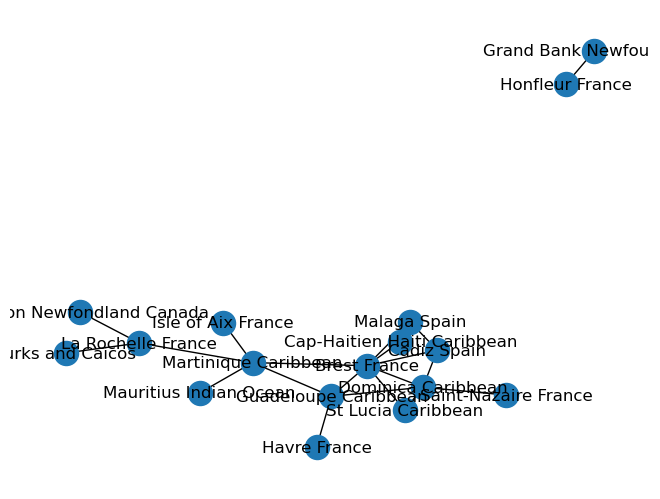

Frence_voyages.html


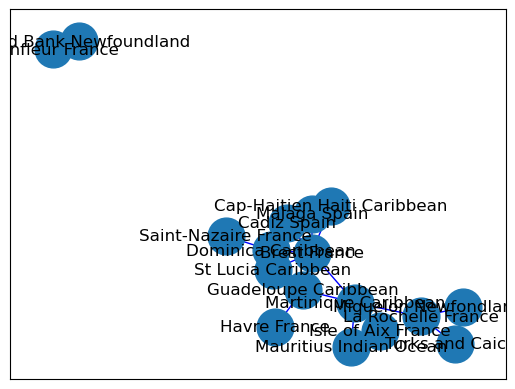

France_voyages.html


In [47]:
G = nx.from_pandas_edgelist(Updated_France_sorted_ship_voyages, 'VoyageFrom', 'VoyageTo')

nx.draw(G, with_labels=True)
plt.show()

net = Network(notebook=True)
net.from_nx(G)
net.show('Frence_voyages.html')

pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='blue')
nx.draw_networkx_labels(G, pos)
plt.show()


for node in G.nodes:
    net.add_node(node, title=node)

for edge in G.edges:
    net.add_edge(edge[0], edge[1])

net.show('France_voyages.html')

###  UnitedKingdom Voyages

In [48]:
# Creating a new column 'Date' in the 'France' dataframe by concatenating the 'Day', 'Month', and 'Year' columns
# First, let's check if these columns exist in the dataframe
if {'Day', 'Month', 'Year'}.issubset(UnitedKingdom.columns):
    # The columns exist, so we proceed to create the 'Date' column
    # We convert each column to string type to be able to concatenate them and then combine with a dash "-"
    UnitedKingdom['Date'] = UnitedKingdom['Year'].astype(str) + "-" + UnitedKingdom['Month'].astype(str) + "-" + UnitedKingdom['Day'].astype(str)
    # Showing the dataframe to confirm the new 'Date' column
    result = UnitedKingdom[['Day', 'Month', 'Year', 'Date']].head()  # Displaying the first few rows to verify
else:
    result = "One or more of the 'Day', 'Month', or 'Year' columns do not exist in the 'UnitedKingdom' dataframe."

result

/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/383447097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UnitedKingdom['Date'] = UnitedKingdom['Year'].astype(str) + "-" + UnitedKingdom['Month'].astype(str) + "-" + UnitedKingdom['Day'].astype(str)


Day  Month  Year       Date
6957    9      2  1771   1771-2-9
6958   10      2  1771  1771-2-10
6959   11      2  1771  1771-2-11
6960   12      2  1771  1771-2-12
6961   13      2  1771  1771-2-13

In [49]:
# To find the unique 'VoyageFrom' and 'VoyageTo' pairings for each 'VoyageIni',
# we will first check if there are multiple pairings for any 'VoyageIni'.
# If there are multiple pairings, we will list them.

# Check if the columns 'VoyageIni', 'VoyageFrom', and 'VoyageTo' are in the dataframe
if {'VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName'}.issubset(UnitedKingdom.columns):
    # Create a DataFrame to hold the unique pairs
    UnitedKingdom_unique_pairs_df = UnitedKingdom.drop_duplicates(subset=['VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName'])

    # Now, we will filter out only those 'VoyageIni' that have a single 'VoyageFrom' and 'VoyageTo' pairing
    UnitedKingdom_unique_voyage_pairs = UnitedKingdom_unique_pairs_df.groupby('VoyageIni').filter(lambda x: len(x) == 1)

    # Display the unique 'VoyageFrom' and 'VoyageTo' pairings for each 'VoyageIni'
    UnitedKingdom_unique_pairings = UnitedKingdom_unique_voyage_pairs[['VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName']].dropna()
else:
    UnitedKingdom_unique_pairings = "The columns 'VoyageIni', 'VoyageFrom', or 'VoyageTo' do not exist in the dataset."

UnitedKingdom_unique_pairings



VoyageIni   VoyageFrom    VoyageTo ShipName
6957    17710209.0     Spithead     St Jago  Swallow
6970    17710313.0      St Jago   St Helena  Swallow
7011    17710506.0    St Helena      Madras  Swallow
7094    17730224.0        Surat      Muscat  Swallow
7114    17730711.0  Mapulipatam   Cuddalore  Swallow
...            ...          ...         ...      ...
264629  17720929.0      Jamaica    Spithead   Ferret
264654  17730204.0     Spithead  Santa Cruz   Ferret
264665  17730219.0   Santa Cruz     Jamaica   Ferret
264683  17730330.0     Guernsey   Monserrat  Seaford
264712  17750226.0       Caicos          UK  Seaford

[290 rows x 4 columns]

In [50]:

if 'Date' in UnitedKingdom.columns:
    # Convert 'Date' column to datetime format
    UnitedKingdom['Date'] = pd.to_datetime(UnitedKingdom['Date'], errors='coerce')
    
    # Group by 'VoyageIni' and find the smallest (min) and largest (max) dates
    UnitedKingdom_date_aggregations = UnitedKingdom.groupby('VoyageIni')['Date'].agg(MinDate='min', MaxDate='max')
    
    # Join the min and max date columns to the unique_pairings_with_ship_name dataframe
    UnitedKingdom_unique_pairings = UnitedKingdom_unique_pairings.join(UnitedKingdom_date_aggregations, on='VoyageIni')
else:
    UnitedKingdom_unique_pairings = "The 'Date' column does not exist or is not in the right format."

UnitedKingdom_unique_pairings


/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/827960636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UnitedKingdom['Date'] = pd.to_datetime(UnitedKingdom['Date'], errors='coerce')


VoyageIni   VoyageFrom    VoyageTo ShipName    MinDate    MaxDate
6957    17710209.0     Spithead     St Jago  Swallow 1771-02-09 1771-02-21
6970    17710313.0      St Jago   St Helena  Swallow 1771-03-13 1771-04-29
7011    17710506.0    St Helena      Madras  Swallow 1771-05-06 1771-06-30
7094    17730224.0        Surat      Muscat  Swallow 1773-02-24 1773-03-15
7114    17730711.0  Mapulipatam   Cuddalore  Swallow 1773-07-11 1773-07-20
...            ...          ...         ...      ...        ...        ...
264629  17720929.0      Jamaica    Spithead   Ferret 1772-09-29 1772-11-04
264654  17730204.0     Spithead  Santa Cruz   Ferret 1773-02-04 1773-02-14
264665  17730219.0   Santa Cruz     Jamaica   Ferret 1773-02-19 1773-03-08
264683  17730330.0     Guernsey   Monserrat  Seaford 1773-03-30 1773-05-04
264712  17750226.0       Caicos          UK  Seaford 1775-02-26 1775-03-28

[290 rows x 6 columns]

In [51]:
# To find the duration, we will subtract the 'min' date from the 'max' date for each 'VoyageIni'

# First, ensure the 'min' and 'max' columns are in the datetime format
UnitedKingdom_unique_pairings['MinDate'] = pd.to_datetime(UnitedKingdom_unique_pairings['MinDate'], errors='coerce')
UnitedKingdom_unique_pairings['MaxDate'] = pd.to_datetime(UnitedKingdom_unique_pairings['MaxDate'], errors='coerce')

# Calculating the duration as the difference between 'max' and 'min' dates
UnitedKingdom_unique_pairings['Duration'] = UnitedKingdom_unique_pairings['MaxDate'] - UnitedKingdom_unique_pairings['MinDate']

# Show the dataframe with the new 'Duration' column
UnitedKingdom_unique_pairings[['VoyageIni', 'VoyageFrom', 'VoyageTo', 'ShipName', 'MinDate', 'MaxDate', 'Duration']]

VoyageIni   VoyageFrom    VoyageTo ShipName    MinDate    MaxDate  \
6957    17710209.0     Spithead     St Jago  Swallow 1771-02-09 1771-02-21   
6970    17710313.0      St Jago   St Helena  Swallow 1771-03-13 1771-04-29   
7011    17710506.0    St Helena      Madras  Swallow 1771-05-06 1771-06-30   
7094    17730224.0        Surat      Muscat  Swallow 1773-02-24 1773-03-15   
7114    17730711.0  Mapulipatam   Cuddalore  Swallow 1773-07-11 1773-07-20   
...            ...          ...         ...      ...        ...        ...   
264629  17720929.0      Jamaica    Spithead   Ferret 1772-09-29 1772-11-04   
264654  17730204.0     Spithead  Santa Cruz   Ferret 1773-02-04 1773-02-14   
264665  17730219.0   Santa Cruz     Jamaica   Ferret 1773-02-19 1773-03-08   
264683  17730330.0     Guernsey   Monserrat  Seaford 1773-03-30 1773-05-04   
264712  17750226.0       Caicos          UK  Seaford 1775-02-26 1775-03-28   

       Duration  
6957    12 days  
6970    47 days  
7011    55 days  
7094    19 days  
7114     9 days  
...         ...  
264629  36 days  
264654  10 days  
264665  17 days  
264683  35 days  
264712  30 days  

[290 rows x 7 columns]

In [52]:
UnitedKingdom_unique_pairings['HomeCountry'] = 'UnitedKingdom'

In [53]:
# Sort the dataframe first by 'ShipName' and then by 'min' date in ascending order to see the voyages in sequence
UnitedKingdom_sorted_ship_voyages = UnitedKingdom_unique_pairings.sort_values(by=['ShipName', 'MinDate'])

# Display the sorted dataframe to confirm the sequence of voyages for each ship
UnitedKingdom_sorted_ship_voyages.reset_index()[['VoyageIni', 'ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate']]

UnitedKingdom_sorted_ship_voyages['FormattedMin'] = UnitedKingdom_sorted_ship_voyages['MinDate'].dt.strftime('%B %d, %Y')
UnitedKingdom_sorted_ship_voyages['FormattedMax'] = UnitedKingdom_sorted_ship_voyages['MaxDate'].dt.strftime('%B %d, %Y')
UnitedKingdom_sorted_ship_voyages

VoyageIni              VoyageFrom                  VoyageTo  \
214549  17761114.0                New York                  Plymouth   
214529  17770406.0                  Jersey               Nova Scotia   
214527  17770707.0                St Johns  cruising off Grand Banks   
214528  17770907.0  St Johns, Newfoundland                  Spithead   
245135  17720504.0                  Lisbon                  Spithead   
...            ...                     ...                       ...   
186001  17710306.0                  Bengal                  Woolwich   
186156  17721225.0                   Downs                    Madras   
185582  17780224.0               Java Head                 St Helena   
253066  17770506.0              Motherbank        Bombay via Johanna   
253234  17780513.0                  Bombay                 St Helena   

         ShipName    MinDate    MaxDate Duration    HomeCountry  \
214549     Active 1776-11-14 1776-12-13  29 days  UnitedKingdom   
214529     Active 1777-04-06 1777-05-22  46 days  UnitedKingdom   
214527     Active 1777-07-07 1777-08-24  48 days  UnitedKingdom   
214528     Active 1777-09-07 1777-10-24  47 days  UnitedKingdom   
245135      Alarm 1772-05-04 1772-05-08   4 days  UnitedKingdom   
...           ...        ...        ...      ...            ...   
186001  Worcester 1771-03-06 1771-08-19 166 days  UnitedKingdom   
186156  Worcester 1772-12-25 1774-04-09 470 days  UnitedKingdom   
185582  Worcester 1778-02-24 1778-05-18  83 days  UnitedKingdom   
253066       York 1777-05-06 1777-10-31 178 days  UnitedKingdom   
253234       York 1778-05-13 1778-08-25 104 days  UnitedKingdom   

              FormattedMin       FormattedMax  
214549   November 14, 1776  December 13, 1776  
214529      April 06, 1777       May 22, 1777  
214527       July 07, 1777    August 24, 1777  
214528  September 07, 1777   October 24, 1777  
245135        May 04, 1772       May 08, 1772  
...                    ...                ...  
186001      March 06, 1771    August 19, 1771  
186156   December 25, 1772     April 09, 1774  
185582   February 24, 1778       May 18, 1778  
253066        May 06, 1777   October 31, 1777  
253234        May 13, 1778    August 25, 1778  

[290 rows x 10 columns]

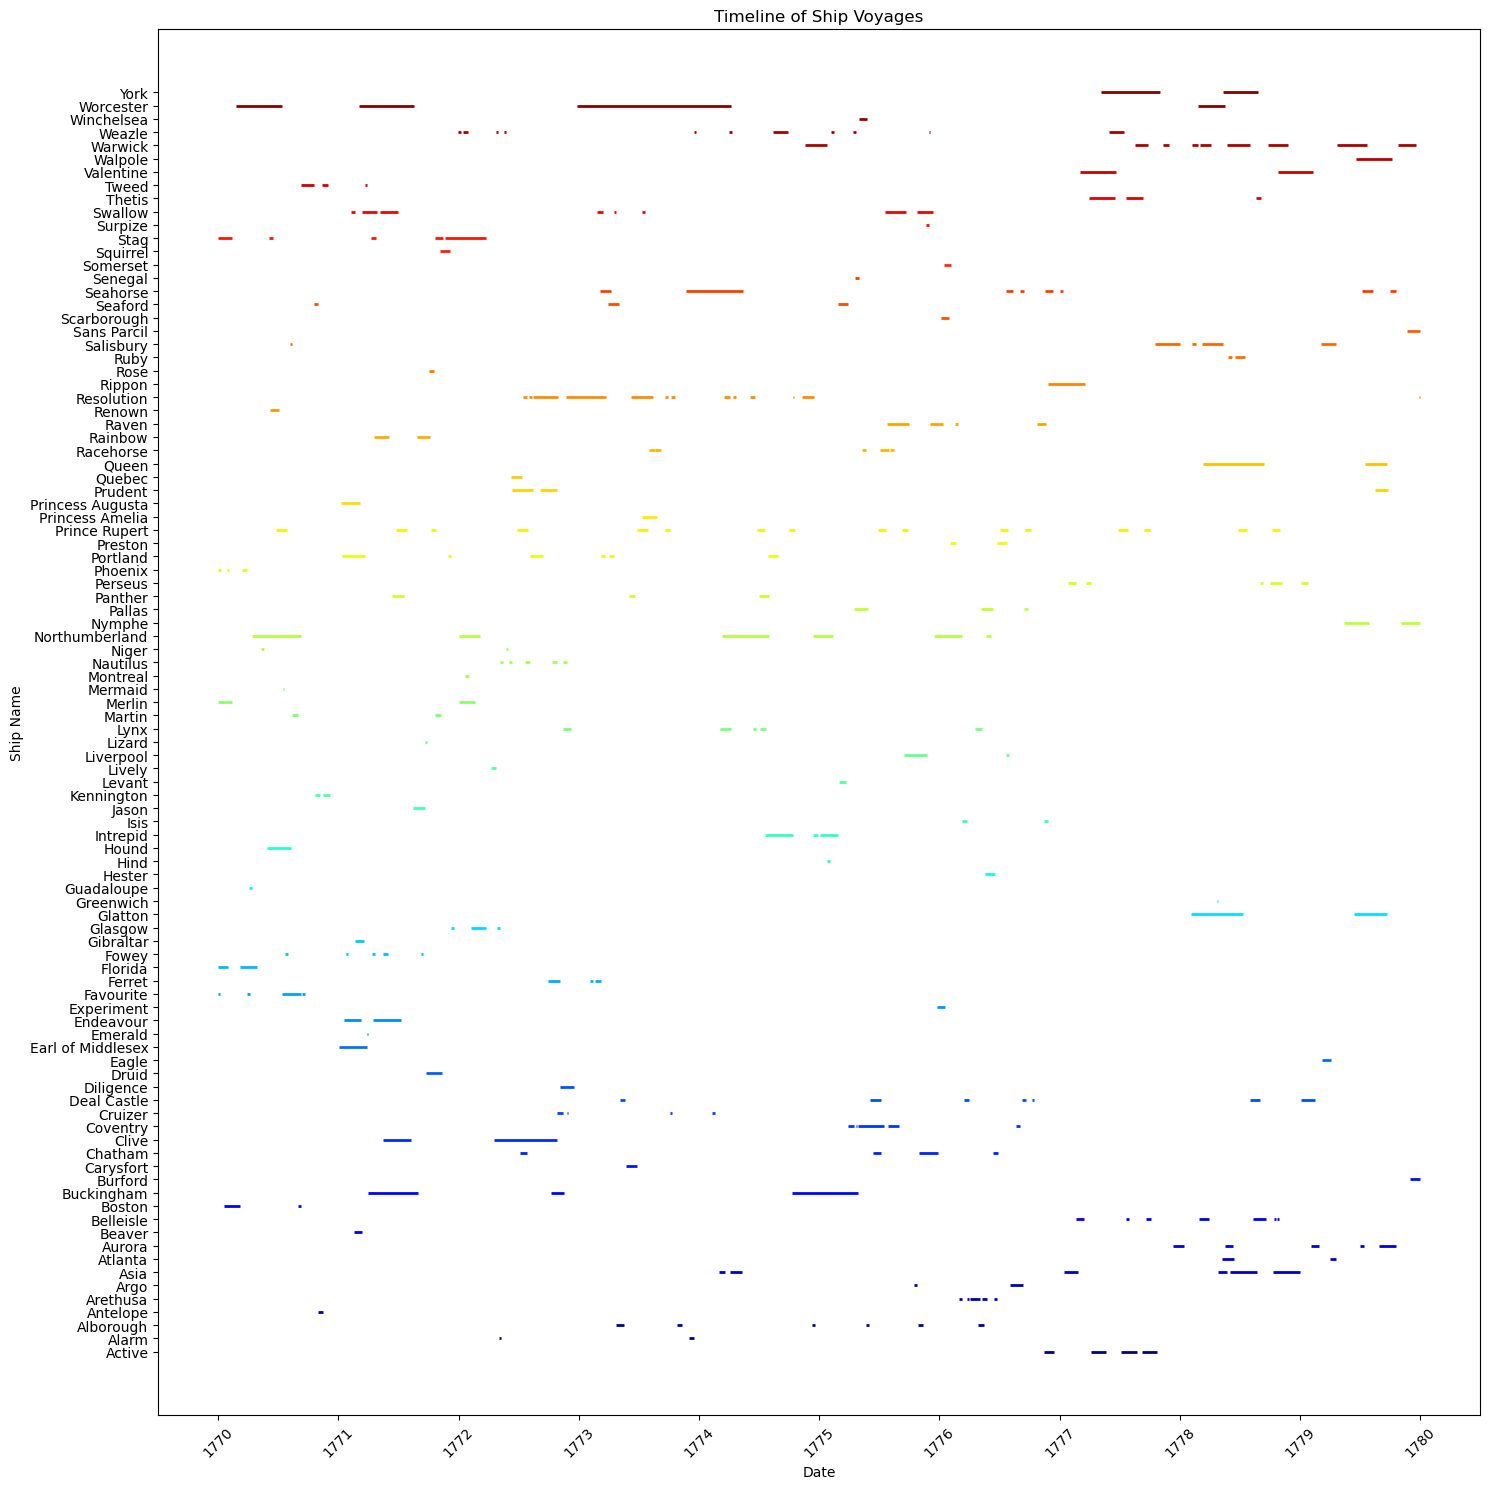

In [54]:
# Preparing the data for visualization
# We'll create a list of tuples with (ShipName, min_date, max_date) for each voyage
voyage_data = list(
    UnitedKingdom_sorted_ship_voyages[['ShipName', 'MinDate', 'MaxDate']].itertuples(index=False, name=None)
)

# Setting up the plot
plt.figure(figsize=(15, 15))
ax = plt.subplot()

# Each ship will have a unique color
colors = plt.cm.jet(np.linspace(0, 1, len(UnitedKingdom_sorted_ship_voyages['ShipName'].unique())))

# Creating a color dictionary for ships
color_dict = dict(zip(UnitedKingdom_sorted_ship_voyages['ShipName'].unique(), colors))

# Plotting each voyage as a line from min_date to max_date for the ship
for ship, group in UnitedKingdom_sorted_ship_voyages.groupby('ShipName'):
    for _, row in group.iterrows():
        plt.hlines(y=ship, xmin=row['MinDate'], xmax=row['MaxDate'], colors=color_dict[ship], lw=2)

# Formatting the dates on the x-axis to make them more readable
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Labels and title
plt.xlabel('Date')
plt.ylabel('Ship Name')
plt.title('Timeline of Ship Voyages')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [55]:
# Ensure the dataframe is sorted by 'ShipName' and start date
sorted_ship_voyages = UnitedKingdom_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Shift the 'VoyageTo' column within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageTo'].shift(-1)

# Compare the shifted 'VoyageTo' with the 'VoyageFrom' of the next voyage
sorted_ship_voyages['SameStartAsLastEnd'] = (
    sorted_ship_voyages['NextVoyageFrom'] == sorted_ship_voyages['VoyageFrom']
)

# Filter the dataframe to show only the rows where the start of a voyage matches the end of the previous voyage
same_start_end_voyages = sorted_ship_voyages[sorted_ship_voyages['SameStartAsLastEnd']]

# This will give you the rows where a ship starts a new voyage from where the last one ended
same_start_end_voyages[['ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate', 'NextVoyageFrom']]

ShipName VoyageFrom      VoyageTo    MinDate    MaxDate  \
189852           Asia   Plymouth     Teneriffe 1774-03-03 1774-03-21   
245307           Lynx   Spithead       Antigua 1772-11-13 1772-12-07   
243439          Niger   Spithead     Gibraltar 1770-05-12 1770-05-21   
244504       Portland   Spithead       Madeira 1771-12-01 1771-12-09   
19987   Prince Rupert  Gravesend         Moose 1771-06-26 1771-07-27   
20138   Prince Rupert  Gravesend     Churchill 1773-06-27 1773-07-31   
20019   Prince Rupert  Gravesend         Moose 1774-06-27 1774-07-21   
29318   Prince Rupert  Churchill        London 1775-09-08 1775-09-28   
29537   Prince Rupert  Gravesend     Churchill 1776-07-04 1776-07-28   
29562   Prince Rupert  Gravesend  York Factory 1777-06-26 1777-07-26   
29593   Prince Rupert  Gravesend         Moose 1778-06-26 1778-07-23   
32788        Seahorse    Malacca         Macao 1776-09-01 1776-09-15   
29868        Seahorse  Gravesend     Churchill 1779-07-07 1779-08-11   
250461         Thetis   Plymouth     St Helena 1777-04-01 1777-06-19   
244924         Weazle    St Jago         Goree 1775-02-06 1775-02-14   

       NextVoyageFrom  
189852       Plymouth  
245307       Spithead  
243439       Spithead  
244504       Spithead  
19987       Gravesend  
20138       Gravesend  
20019       Gravesend  
29318       Churchill  
29537       Gravesend  
29562       Gravesend  
29593       Gravesend  
32788         Malacca  
29868       Gravesend  
250461       Plymouth  
244924        St Jago

In [56]:
# Ensure the dataframe is sorted by 'ShipName' and start date
sorted_ship_voyages = UnitedKingdom_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Shift the 'VoyageTo' column within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageTo'].shift(-1)

# Compare the shifted 'VoyageTo' with the 'VoyageFrom' of the next voyage
sorted_ship_voyages['SameStartAsLastEnd'] = (
    sorted_ship_voyages['NextVoyageFrom'] == sorted_ship_voyages['VoyageFrom']
)

# Filter the dataframe to show only the rows where the start of a voyage matches the end of the previous voyage
same_start_end_voyages = sorted_ship_voyages[sorted_ship_voyages['SameStartAsLastEnd']]

# This will give you the rows where a ship starts a new voyage from where the last one ended
same_start_end_voyages[['ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate', 'NextVoyageFrom']]



ShipName VoyageFrom      VoyageTo    MinDate    MaxDate  \
189852           Asia   Plymouth     Teneriffe 1774-03-03 1774-03-21   
245307           Lynx   Spithead       Antigua 1772-11-13 1772-12-07   
243439          Niger   Spithead     Gibraltar 1770-05-12 1770-05-21   
244504       Portland   Spithead       Madeira 1771-12-01 1771-12-09   
19987   Prince Rupert  Gravesend         Moose 1771-06-26 1771-07-27   
20138   Prince Rupert  Gravesend     Churchill 1773-06-27 1773-07-31   
20019   Prince Rupert  Gravesend         Moose 1774-06-27 1774-07-21   
29318   Prince Rupert  Churchill        London 1775-09-08 1775-09-28   
29537   Prince Rupert  Gravesend     Churchill 1776-07-04 1776-07-28   
29562   Prince Rupert  Gravesend  York Factory 1777-06-26 1777-07-26   
29593   Prince Rupert  Gravesend         Moose 1778-06-26 1778-07-23   
32788        Seahorse    Malacca         Macao 1776-09-01 1776-09-15   
29868        Seahorse  Gravesend     Churchill 1779-07-07 1779-08-11   
250461         Thetis   Plymouth     St Helena 1777-04-01 1777-06-19   
244924         Weazle    St Jago         Goree 1775-02-06 1775-02-14   

       NextVoyageFrom  
189852       Plymouth  
245307       Spithead  
243439       Spithead  
244504       Spithead  
19987       Gravesend  
20138       Gravesend  
20019       Gravesend  
29318       Churchill  
29537       Gravesend  
29562       Gravesend  
29593       Gravesend  
32788         Malacca  
29868       Gravesend  
250461       Plymouth  
244924        St Jago

In [57]:
# To check if a ship's departure location is different from its last known arrival location,
# we'll need to compare the 'VoyageTo' of the last voyage with the 'VoyageFrom' of the next voyage.

# First, we sort the data by 'ShipName' and 'min' date again to ensure it's in order
sorted_ship_voyages = UnitedKingdom_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Now we create a new DataFrame which shifts the 'VoyageTo' column up by one within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageFrom'].shift(-1)

# We then check for rows where 'VoyageTo' doesn't match 'NextVoyageFrom' for the same 'ShipName'
discrepancies = sorted_ship_voyages[sorted_ship_voyages['VoyageTo'] != sorted_ship_voyages['NextVoyageFrom']]

# We're interested in cases where both 'VoyageTo' and 'NextVoyageFrom' are not NaN,
# meaning the ship has a recorded departure after the arrival
discrepancies = discrepancies.dropna(subset=['VoyageTo', 'NextVoyageFrom'])

# Show the discrepancies
discrepancies[['ShipName', 'VoyageTo', 'NextVoyageFrom', 'MinDate', 'MaxDate','Duration']].reset_index(drop=True)


ShipName                  VoyageTo          NextVoyageFrom    MinDate  \
0       Active                  Plymouth                  Jersey 1776-11-14   
1       Active               Nova Scotia                St Johns 1777-04-06   
2       Active  cruising off Grand Banks  St Johns, Newfoundland 1777-07-07   
3        Alarm                  Spithead                  Lisbon 1772-05-04   
4    Alborough              Newfoundland  St Johns, Newfoundland 1773-04-23   
..         ...                       ...                     ...        ...   
99      Weazle                    Gambia    St Thomas (Sao Tome) 1775-12-01   
100  Worcester                    Bombay                  Bengal 1770-02-24   
101  Worcester                  Woolwich                   Downs 1771-03-06   
102  Worcester                    Madras               Java Head 1772-12-25   
103       York        Bombay via Johanna                  Bombay 1777-05-06   

       MaxDate Duration  
0   1776-12-13  29 days  
1   1777-05-22  46 days  
2   1777-08-24  48 days  
3   1772-05-08   4 days  
4   1773-05-19  26 days  
..         ...      ...  
99  1775-12-05   4 days  
100 1770-07-14 140 days  
101 1771-08-19 166 days  
102 1774-04-09 470 days  
103 1777-10-31 178 days  

[104 rows x 6 columns]

In [58]:
# Assuming 'df' is your DataFrame with the ship voyage information
unique_voyage_from = UnitedKingdom_sorted_ship_voyages['VoyageFrom'].unique()
unique_voyage_to = UnitedKingdom_sorted_ship_voyages['VoyageTo'].unique()

# Combine and find unique locations
all_unique_places = pd.unique(np.concatenate((unique_voyage_from, unique_voyage_to)))

# Convert to a list
unique_places_list = all_unique_places.tolist()

# Now you have a list of all unique places
pd.DataFrame(unique_places_list)
unique_places_list

['New York',
 'Jersey',
 'St Johns',
 'St Johns, Newfoundland',
 'Lisbon',
 'Plymouth',
 'Cadiz',
 "St John's Harbour Newfoundland",
 'Torbay',
 'Madeira',
 'Porta Praya',
 'Ascension',
 'St Helena',
 'Basse Terre',
 'Teneriffe',
 'Newport Rhode Island',
 'Spithead',
 'Simons Bay',
 'Pensicola Florida',
 'Yarmouth',
 'English Bay, Antigua',
 'Barbados (Cruising)',
 'Antigua',
 'Barbados',
 'Halifax',
 'Porto Praya',
 'Hampton Road',
 'Portsmouth',
 'Madras',
 'Table Bay',
 'Jamaica',
 'England',
 'Calcutta',
 'Funchall Road',
 'St Augustins Bay, Madagascar',
 'Gulf of Aden',
 'Tenerife',
 'Charles Town',
 'Rhode Island',
 'Crany Island',
 'Guernsey',
 'Port Royal, Jamaica',
 'Java Head',
 'Java',
 'Cape of Good Hope',
 'Fayal',
 'Port Egmont',
 'Santa Cruz',
 'Port Egmont, Falkland Islands',
 'Charlestown',
 'Hampton Road Virginia',
 'Boston',
 'Nantusket',
 'Portsmouth ',
 'Bali',
 'Start',
 'Cape Lopez',
 'St Thomas',
 'The Nore',
 'Quebec',
 'Monserrat',
 'Gibraltar',
 'Charleston',

In [59]:
locations_list_df = pd.read_excel("UnitedKingdom_Locations.xlsx")
Updated_UnitedKingdom_sorted_ship_voyages = UnitedKingdom_sorted_ship_voyages

In [60]:
# Create a mapping from the 'Location' to 'NewLocation'
location_mapping = locations_list_df.set_index('Location')['NewLocation'].to_dict()

# Replace the 'VoyageFrom' and 'VoyageTo' values in discrepancies_df with 'NewLocation' values
Updated_UnitedKingdom_sorted_ship_voyages['VoyageFrom'] = Updated_UnitedKingdom_sorted_ship_voyages['VoyageFrom'].map(location_mapping).fillna(Updated_UnitedKingdom_sorted_ship_voyages['VoyageFrom'])
Updated_UnitedKingdom_sorted_ship_voyages['VoyageTo'] = Updated_UnitedKingdom_sorted_ship_voyages['VoyageTo'].map(location_mapping).fillna(Updated_UnitedKingdom_sorted_ship_voyages['VoyageTo'])

# Display the first few rows to verify the changes
Cleaned_UnitedKingdom = Updated_UnitedKingdom_sorted_ship_voyages


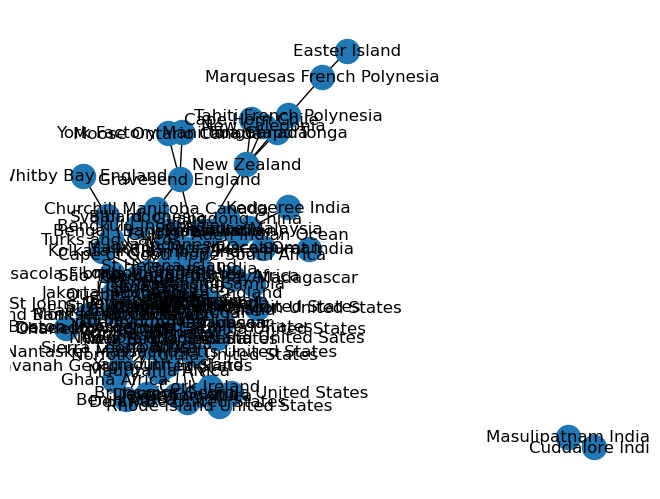

voyages.html


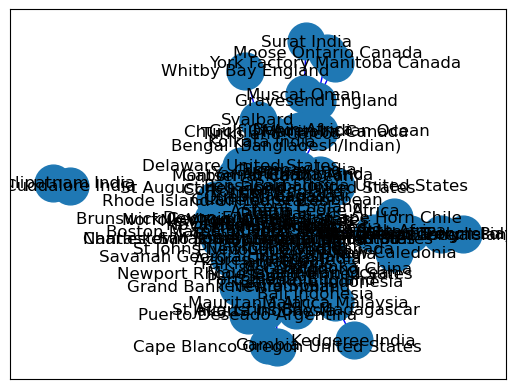

voyages.html


In [61]:
G = nx.from_pandas_edgelist(Updated_UnitedKingdom_sorted_ship_voyages, 'VoyageFrom', 'VoyageTo')

nx.draw(G, with_labels=True)
plt.show()

net = Network(notebook=True)
net.from_nx(G)
net.show('voyages.html')

pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='blue')
nx.draw_networkx_labels(G, pos)
plt.show()


for node in G.nodes:
    net.add_node(node, title=node)

for edge in G.edges:
    net.add_edge(edge[0], edge[1])

net.show('voyages.html')


In [62]:



Updated_UnitedKingdom_sorted_ship_voyages

VoyageIni                    VoyageFrom                 VoyageTo  \
214549  17761114.0        New York United States         Plymouth England   
214529  17770406.0                        Jersey       Nova Scotia Canada   
214527  17770707.0  St Johns Newfoundland Canada  Grand Bank Newfoundland   
214528  17770907.0  St Johns Newfoundland Canada      Portsmouth  England   
245135  17720504.0               Lisbon Portugal      Portsmouth  England   
...            ...                           ...                      ...   
186001  17710306.0    Bengal (Bangladesh/Indian)           London England   
186156  17721225.0                  Kent England            Chennai India   
185582  17780224.0                Java Indonesia         St Helena Island   
253066  17770506.0           Portsmouth  England             Bombay India   
253234  17780513.0                  Bombay India         St Helena Island   

         ShipName    MinDate    MaxDate Duration    HomeCountry  \
214549     Active 1776-11-14 1776-12-13  29 days  UnitedKingdom   
214529     Active 1777-04-06 1777-05-22  46 days  UnitedKingdom   
214527     Active 1777-07-07 1777-08-24  48 days  UnitedKingdom   
214528     Active 1777-09-07 1777-10-24  47 days  UnitedKingdom   
245135      Alarm 1772-05-04 1772-05-08   4 days  UnitedKingdom   
...           ...        ...        ...      ...            ...   
186001  Worcester 1771-03-06 1771-08-19 166 days  UnitedKingdom   
186156  Worcester 1772-12-25 1774-04-09 470 days  UnitedKingdom   
185582  Worcester 1778-02-24 1778-05-18  83 days  UnitedKingdom   
253066       York 1777-05-06 1777-10-31 178 days  UnitedKingdom   
253234       York 1778-05-13 1778-08-25 104 days  UnitedKingdom   

              FormattedMin       FormattedMax  
214549   November 14, 1776  December 13, 1776  
214529      April 06, 1777       May 22, 1777  
214527       July 07, 1777    August 24, 1777  
214528  September 07, 1777   October 24, 1777  
245135        May 04, 1772       May 08, 1772  
...                    ...                ...  
186001      March 06, 1771    August 19, 1771  
186156   December 25, 1772     April 09, 1774  
185582   February 24, 1778       May 18, 1778  
253066        May 06, 1777   October 31, 1777  
253234        May 13, 1778    August 25, 1778  

[290 rows x 10 columns]

###  Spain Voyages

In [63]:
# Creating a new column 'Date' in the 'France' dataframe by concatenating the 'Day', 'Month', and 'Year' columns
# First, let's check if these columns exist in the dataframe
if {'Day', 'Month', 'Year'}.issubset(Spain.columns):
    # The columns exist, so we proceed to create the 'Date' column
    # We convert each column to string type to be able to concatenate them and then combine with a dash "-"
    Spain['Date'] = Spain['Year'].astype(str) + "-" + Spain['Month'].astype(str) + "-" + Spain['Day'].astype(str)
    # Showing the dataframe to confirm the new 'Date' column
    result = Spain[['Day', 'Month', 'Year', 'Date']].head()  # Displaying the first few rows to verify
else:
    result = "One or more of the 'Day', 'Month', or 'Year' columns do not exist in the 'Spain' dataframe."

result

/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/2218242228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spain['Date'] = Spain['Year'].astype(str) + "-" + Spain['Month'].astype(str) + "-" + Spain['Day'].astype(str)


Day  Month  Year       Date
12   13      3  1774  1774-3-13
13   14      3  1774  1774-3-14
14   15      3  1774  1774-3-15
15   16      3  1774  1774-3-16
16   17      3  1774  1774-3-17

In [64]:
# To find the unique 'VoyageFrom' and 'VoyageTo' pairings for each 'VoyageIni',
# we will first check if there are multiple pairings for any 'VoyageIni'.
# If there are multiple pairings, we will list them.

# Check if the columns 'VoyageIni', 'VoyageFrom', and 'VoyageTo' are in the dataframe
if {'VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName'}.issubset(Spain.columns):
    # Create a DataFrame to hold the unique pairs
    Spain_unique_pairs_df = Spain.drop_duplicates(subset=['VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName'])

    # Now, we will filter out only those 'VoyageIni' that have a single 'VoyageFrom' and 'VoyageTo' pairing
    Spain_unique_voyage_pairs = Spain_unique_pairs_df.groupby('VoyageIni').filter(lambda x: len(x) == 1)

    # Display the unique 'VoyageFrom' and 'VoyageTo' pairings for each 'VoyageIni'
    Spain_unique_pairings = Spain_unique_voyage_pairs[['VoyageIni', 'VoyageFrom', 'VoyageTo','ShipName']].dropna()
else:
    Spain_unique_pairings = "The columns 'VoyageIni', 'VoyageFrom', or 'VoyageTo' do not exist in the dataset."

Spain_unique_pairings



VoyageIni      VoyageFrom                  VoyageTo        ShipName
12      17740201.0       EL FERROL           RIO DE LA PLATA  SANTA PERPETUA
70      17741020.0      MONTEVIDEO  DE LA SOLEDAD (MALVINAS)  SANTA PERPETUA
131     17761105.0      MONTEVIDEO            SANTA CATALINA  SANTA PERPETUA
1192    17770602.0       LA CORUÑA                 LA HABANA       EL QUIROS
1195    17780615.0       LA HABANA                 LA CORUÑA       EL QUIROS
...            ...             ...                       ...             ...
277732  17770521.0      MONTEVIDEO                SACRAMENTO           MARTE
277844  17701010.0       EL CALLAO            ISLA DE PASCUA   SANTA ROSALÍA
277886  17701121.0  ISLA DE PASCUA                    CHILOÉ   SANTA ROSALÍA
277905  17780802.0  SANTA CATALINA                     CÁDIZ   SANTA ROSALÍA
278438  17790928.0       LA CORUÑA                 LA HABANA       EL AGUILA

[251 rows x 4 columns]

In [65]:
if 'Date' in Spain.columns:
    # Convert 'Date' column to datetime format
    Spain['Date'] = pd.to_datetime(Spain['Date'], errors='coerce')
    
    # Group by 'VoyageIni' and find the smallest (min) and largest (max) dates, then rename columns
    Spain_date_aggregations = Spain.groupby('VoyageIni')['Date'].agg(MinDate='min', MaxDate='max')
    
    # Join the MinDate and MaxDate columns to the Spain_unique_pairings dataframe
    Spain_unique_pairings = Spain_unique_pairings.join(Spain_date_aggregations, on='VoyageIni')
else:
    Spain_unique_pairings = "The 'Date' column does not exist or is not in the right format."


    
Spain_unique_pairings


/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/1929480079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spain['Date'] = pd.to_datetime(Spain['Date'], errors='coerce')


VoyageIni      VoyageFrom                  VoyageTo        ShipName  \
12      17740201.0       EL FERROL           RIO DE LA PLATA  SANTA PERPETUA   
70      17741020.0      MONTEVIDEO  DE LA SOLEDAD (MALVINAS)  SANTA PERPETUA   
131     17761105.0      MONTEVIDEO            SANTA CATALINA  SANTA PERPETUA   
1192    17770602.0       LA CORUÑA                 LA HABANA       EL QUIROS   
1195    17780615.0       LA HABANA                 LA CORUÑA       EL QUIROS   
...            ...             ...                       ...             ...   
277732  17770521.0      MONTEVIDEO                SACRAMENTO           MARTE   
277844  17701010.0       EL CALLAO            ISLA DE PASCUA   SANTA ROSALÍA   
277886  17701121.0  ISLA DE PASCUA                    CHILOÉ   SANTA ROSALÍA   
277905  17780802.0  SANTA CATALINA                     CÁDIZ   SANTA ROSALÍA   
278438  17790928.0       LA CORUÑA                 LA HABANA       EL AGUILA   

          MinDate    MaxDate  
12     1774-02-01 1774-04-16  
70     1774-10-20 1774-11-04  
131    1776-11-05 1777-01-12  
1192   1777-06-03 1777-07-12  
1195   1778-06-15 1778-07-27  
...           ...        ...  
277732 1777-05-21 1777-05-22  
277844 1770-10-10 1770-11-20  
277886 1770-11-21 1770-12-18  
277905 1778-08-02 1778-10-21  
278438 1779-09-29 1779-12-31  

[251 rows x 6 columns]

In [66]:
# To find the duration, we will subtract the 'min' date from the 'max' date for each 'VoyageIni'

# First, ensure the 'min' and 'max' columns are in the datetime format
Spain_unique_pairings['MinDate'] = pd.to_datetime(Spain_unique_pairings['MinDate'], errors='coerce')
Spain_unique_pairings['MaxDate'] = pd.to_datetime(Spain_unique_pairings['MaxDate'], errors='coerce')

# Calculating the duration as the difference between 'max' and 'min' dates
Spain_unique_pairings['Duration'] = Spain_unique_pairings['MaxDate'] - Spain_unique_pairings['MinDate']

# Show the dataframe with the new 'Duration' column
Spain_unique_pairings[['VoyageIni', 'VoyageFrom', 'VoyageTo', 'ShipName', 'MinDate', 'MaxDate', 'Duration']]

VoyageIni      VoyageFrom                  VoyageTo        ShipName  \
12      17740201.0       EL FERROL           RIO DE LA PLATA  SANTA PERPETUA   
70      17741020.0      MONTEVIDEO  DE LA SOLEDAD (MALVINAS)  SANTA PERPETUA   
131     17761105.0      MONTEVIDEO            SANTA CATALINA  SANTA PERPETUA   
1192    17770602.0       LA CORUÑA                 LA HABANA       EL QUIROS   
1195    17780615.0       LA HABANA                 LA CORUÑA       EL QUIROS   
...            ...             ...                       ...             ...   
277732  17770521.0      MONTEVIDEO                SACRAMENTO           MARTE   
277844  17701010.0       EL CALLAO            ISLA DE PASCUA   SANTA ROSALÍA   
277886  17701121.0  ISLA DE PASCUA                    CHILOÉ   SANTA ROSALÍA   
277905  17780802.0  SANTA CATALINA                     CÁDIZ   SANTA ROSALÍA   
278438  17790928.0       LA CORUÑA                 LA HABANA       EL AGUILA   

          MinDate    MaxDate Duration  
12     1774-02-01 1774-04-16  74 days  
70     1774-10-20 1774-11-04  15 days  
131    1776-11-05 1777-01-12  68 days  
1192   1777-06-03 1777-07-12  39 days  
1195   1778-06-15 1778-07-27  42 days  
...           ...        ...      ...  
277732 1777-05-21 1777-05-22   1 days  
277844 1770-10-10 1770-11-20  41 days  
277886 1770-11-21 1770-12-18  27 days  
277905 1778-08-02 1778-10-21  80 days  
278438 1779-09-29 1779-12-31  93 days  

[251 rows x 7 columns]

In [67]:
Spain_unique_pairings['HomeCountry'] = 'Spain'

In [68]:
# Sort the dataframe first by 'ShipName' and then by 'min' date in ascending order to see the voyages in sequence
Spain_sorted_ship_voyages = Spain_unique_pairings.sort_values(by=['ShipName', 'MinDate'])

# Display the sorted dataframe to confirm the sequence of voyages for each ship
Spain_sorted_ship_voyages.reset_index()[['VoyageIni', 'ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate']]

Spain_sorted_ship_voyages['FormattedMin'] = Spain_sorted_ship_voyages['MinDate'].dt.strftime('%B %d, %Y')
Spain_sorted_ship_voyages['FormattedMax'] = Spain_sorted_ship_voyages['MaxDate'].dt.strftime('%B %d, %Y')
Spain_sorted_ship_voyages

VoyageIni  VoyageFrom    VoyageTo      ShipName    MinDate  \
238095  17770506.0  MONTEVIDEO       CÁDIZ       ANDALUZ 1777-05-06   
49268   17700114.0   LA HABANA   LA CORUÑA        CORTES 1770-01-14   
49260   17711114.0   LA HABANA   LA CORUÑA        CORTES 1771-11-14   
49173   17720802.0   LA HABANA   LA CORUÑA        CORTES 1772-08-02   
49241   17721203.0   LA CORUÑA   LA HABANA        CORTES 1772-12-04   
...            ...         ...         ...           ...        ...   
175873  17760301.0   La Coruña  Montevideo  San Fernando 1776-03-01   
175948  17760728.0  Montevideo   La Coruña  San Fernando 1776-07-28   
176032  17771220.0   La Coruña  Montevideo  San Fernando 1777-12-20   
52865   17790604.0   La Coruña  Montevideo      Tenerife 1779-06-04   
52954   17791207.0  Montevideo   La Coruña      Tenerife 1779-12-07   

          MaxDate Duration HomeCountry       FormattedMin        FormattedMax  
238095 1777-08-11  97 days       Spain       May 06, 1777     August 11, 1777  
49268  1770-02-16  33 days       Spain   January 14, 1770   February 16, 1770  
49260  1772-02-12  90 days       Spain  November 14, 1771   February 12, 1772  
49173  1772-09-04  33 days       Spain    August 02, 1772  September 04, 1772  
49241  1773-01-10  37 days       Spain  December 04, 1772    January 10, 1773  
...           ...      ...         ...                ...                 ...  
175873 1776-05-14  74 days       Spain     March 01, 1776        May 14, 1776  
175948 1776-10-19  83 days       Spain      July 28, 1776    October 19, 1776  
176032 1778-03-09  79 days       Spain  December 20, 1777      March 09, 1778  
52865  1779-08-31  88 days       Spain      June 04, 1779     August 31, 1779  
52954  1779-12-31  24 days       Spain  December 07, 1779   December 31, 1779  

[251 rows x 10 columns]

In [69]:
Spain_sorted_ship_voyages

filtered_rows = Spain_sorted_ship_voyages[Spain_sorted_ship_voyages['ShipName'] == 'Allarm']
filtered_rows


Spain_sorted_ship_voyages.to_excel("Spain.xlsx")

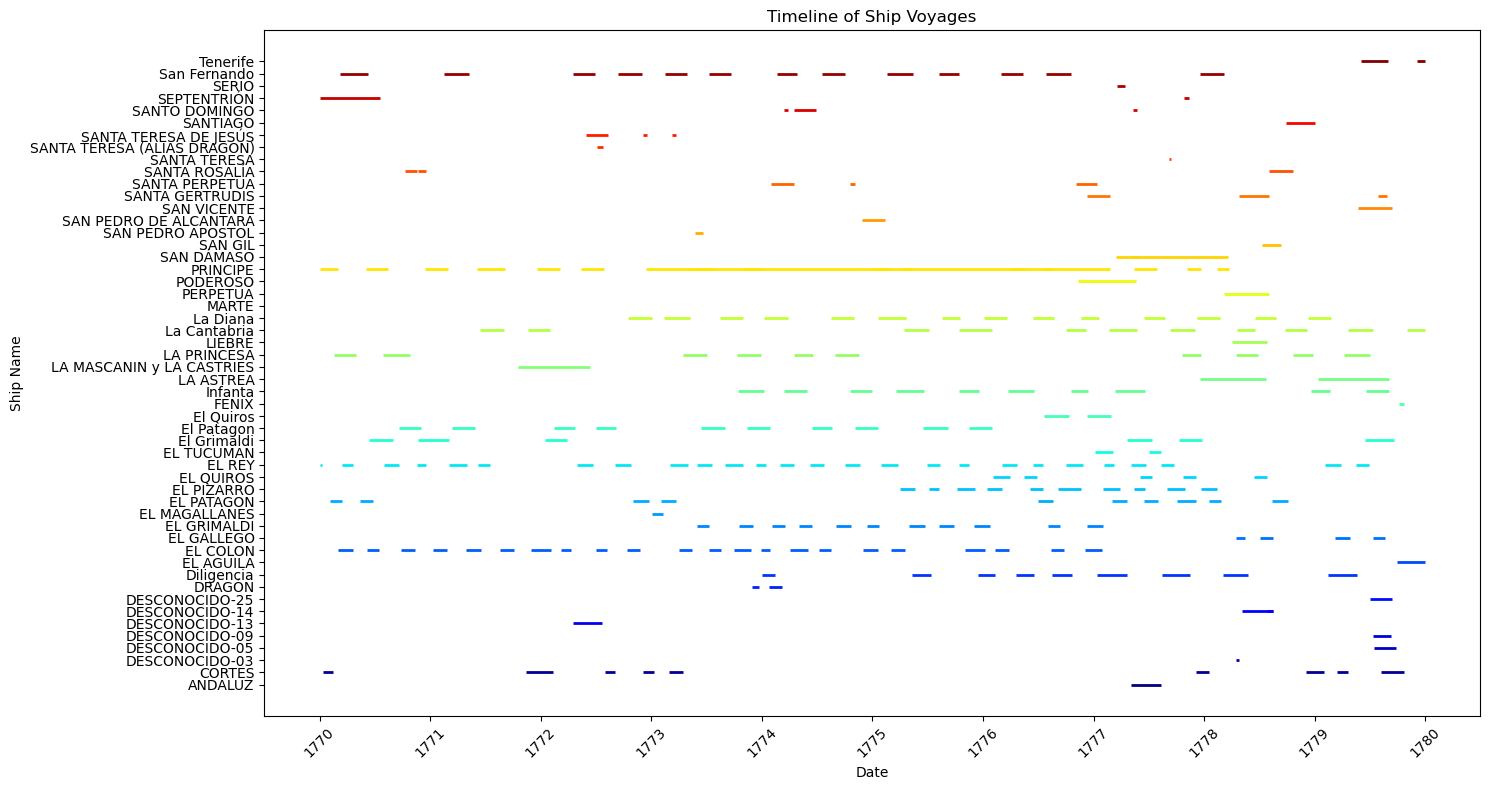

In [70]:
# Preparing the data for visualization
# We'll create a list of tuples with (ShipName, min_date, max_date) for each voyage
voyage_data = list(
    Spain_sorted_ship_voyages[['ShipName', 'MinDate', 'MaxDate']].itertuples(index=False, name=None)
)

# Setting up the plot
plt.figure(figsize=(15, 8))
ax = plt.subplot()

# Each ship will have a unique color
colors = plt.cm.jet(np.linspace(0, 1, len(Spain_sorted_ship_voyages['ShipName'].unique())))

# Creating a color dictionary for ships
color_dict = dict(zip(Spain_sorted_ship_voyages['ShipName'].unique(), colors))

# Plotting each voyage as a line from min_date to max_date for the ship
for ship, group in Spain_sorted_ship_voyages.groupby('ShipName'):
    for _, row in group.iterrows():
        plt.hlines(y=ship, xmin=row['MinDate'], xmax=row['MaxDate'], colors=color_dict[ship], lw=2)

# Formatting the dates on the x-axis to make them more readable
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Labels and title
plt.xlabel('Date')
plt.ylabel('Ship Name')
plt.title('Timeline of Ship Voyages')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [71]:
# Ensure the dataframe is sorted by 'ShipName' and start date
sorted_ship_voyages = Spain_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Shift the 'VoyageTo' column within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageTo'].shift(-1)

# Compare the shifted 'VoyageTo' with the 'VoyageFrom' of the next voyage
sorted_ship_voyages['SameStartAsLastEnd'] = (
    sorted_ship_voyages['NextVoyageFrom'] == sorted_ship_voyages['VoyageFrom']
)

# Filter the dataframe to show only the rows where the start of a voyage matches the end of the previous voyage
same_start_end_voyages = sorted_ship_voyages[sorted_ship_voyages['SameStartAsLastEnd']]

# This will give you the rows where a ship starts a new voyage from where the last one ended
same_start_end_voyages[['ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate', 'NextVoyageFrom']]

ShipName  VoyageFrom    VoyageTo    MinDate    MaxDate  \
49173         CORTES   LA HABANA   LA CORUÑA 1772-08-02 1772-09-04   
49241         CORTES   LA CORUÑA   LA HABANA 1772-12-04 1773-01-10   
49246         CORTES   LA HABANA   LA CORUÑA 1773-03-02 1773-04-15   
49188         CORTES   LA CORUÑA   LA HABANA 1778-12-03 1779-01-31   
49500         CORTES   LA HABANA   LA CORUÑA 1779-03-16 1779-04-23   
...              ...         ...         ...        ...        ...   
175718  San Fernando   La Coruña  Montevideo 1775-02-18 1775-05-14   
175804  San Fernando  Montevideo   La Coruña 1775-08-08 1775-10-15   
175873  San Fernando   La Coruña  Montevideo 1776-03-01 1776-05-14   
175948  San Fernando  Montevideo   La Coruña 1776-07-28 1776-10-19   
52865       Tenerife   La Coruña  Montevideo 1779-06-04 1779-08-31   

       NextVoyageFrom  
49173       LA HABANA  
49241       LA CORUÑA  
49246       LA HABANA  
49188       LA CORUÑA  
49500       LA HABANA  
...               ...  
175718      La Coruña  
175804     Montevideo  
175873      La Coruña  
175948     Montevideo  
52865       La Coruña  

[167 rows x 6 columns]

In [72]:
# Ensure the dataframe is sorted by 'ShipName' and start date
sorted_ship_voyages = Spain_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Shift the 'VoyageTo' column within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageTo'].shift(-1)

# Compare the shifted 'VoyageTo' with the 'VoyageFrom' of the next voyage
sorted_ship_voyages['SameStartAsLastEnd'] = (
    sorted_ship_voyages['NextVoyageFrom'] == sorted_ship_voyages['VoyageFrom']
)

# Filter the dataframe to show only the rows where the start of a voyage matches the end of the previous voyage
same_start_end_voyages = sorted_ship_voyages[sorted_ship_voyages['SameStartAsLastEnd']]

# This will give you the rows where a ship starts a new voyage from where the last one ended
same_start_end_voyages[['ShipName', 'VoyageFrom', 'VoyageTo', 'MinDate', 'MaxDate', 'NextVoyageFrom']]



ShipName  VoyageFrom    VoyageTo    MinDate    MaxDate  \
49173         CORTES   LA HABANA   LA CORUÑA 1772-08-02 1772-09-04   
49241         CORTES   LA CORUÑA   LA HABANA 1772-12-04 1773-01-10   
49246         CORTES   LA HABANA   LA CORUÑA 1773-03-02 1773-04-15   
49188         CORTES   LA CORUÑA   LA HABANA 1778-12-03 1779-01-31   
49500         CORTES   LA HABANA   LA CORUÑA 1779-03-16 1779-04-23   
...              ...         ...         ...        ...        ...   
175718  San Fernando   La Coruña  Montevideo 1775-02-18 1775-05-14   
175804  San Fernando  Montevideo   La Coruña 1775-08-08 1775-10-15   
175873  San Fernando   La Coruña  Montevideo 1776-03-01 1776-05-14   
175948  San Fernando  Montevideo   La Coruña 1776-07-28 1776-10-19   
52865       Tenerife   La Coruña  Montevideo 1779-06-04 1779-08-31   

       NextVoyageFrom  
49173       LA HABANA  
49241       LA CORUÑA  
49246       LA HABANA  
49188       LA CORUÑA  
49500       LA HABANA  
...               ...  
175718      La Coruña  
175804     Montevideo  
175873      La Coruña  
175948     Montevideo  
52865       La Coruña  

[167 rows x 6 columns]

In [73]:
# To check if a ship's departure location is different from its last known arrival location,
# we'll need to compare the 'VoyageTo' of the last voyage with the 'VoyageFrom' of the next voyage.

# First, we sort the data by 'ShipName' and 'min' date again to ensure it's in order
sorted_ship_voyages = Spain_sorted_ship_voyages.sort_values(by=['ShipName', 'MinDate'])

# Now we create a new DataFrame which shifts the 'VoyageTo' column up by one within each group of 'ShipName'
sorted_ship_voyages['NextVoyageFrom'] = sorted_ship_voyages.groupby('ShipName')['VoyageFrom'].shift(-1)

# We then check for rows where 'VoyageTo' doesn't match 'NextVoyageFrom' for the same 'ShipName'
discrepancies = sorted_ship_voyages[sorted_ship_voyages['VoyageTo'] != sorted_ship_voyages['NextVoyageFrom']]

# We're interested in cases where both 'VoyageTo' and 'NextVoyageFrom' are not NaN,
# meaning the ship has a recorded departure after the arrival
discrepancies = discrepancies.dropna(subset=['VoyageTo', 'NextVoyageFrom'])

# Show the discrepancies
discrepancies[['ShipName', 'VoyageTo', 'NextVoyageFrom', 'MinDate', 'MaxDate','Duration']].reset_index(drop=True)


ShipName                                    VoyageTo  \
0            CORTES                                   LA CORUÑA   
1            CORTES                                   LA CORUÑA   
2            CORTES                                   LA HABANA   
3    DESCONOCIDO-14                                       CÁDIZ   
4        Diligencia                                   La Coruña   
5          EL COLON                                   LA CORUÑA   
6        EL GALLEGO                                   LA HABANA   
7       EL GRIMALDI                                   LA HABANA   
8        EL PATAGON                                   LA HABANA   
9        EL PATAGON                                   LA CORUÑA   
10        EL QUIROS                                   LA CORUÑA   
11      El Grimaldi                                   La Coruña   
12          Infanta                                  Montevideo   
13     La Cantabria                                   La Coruña   
14         PRINCIPE                                   La Coruña   
15         PRINCIPE                                   LA HABANA   
16         PRINCIPE                                   LA CORUÑA   
17         PRINCIPE                                   La Coruña   
18       SAN DÁMASO                ISLA SANTA CATALINA (BRASIL)   
19       SAN DÁMASO                ISLA SANTA CATALINA (BRASIL)   
20  SANTA GERTRUDIS                             ESPAÑA (CÁDIZ?)   
21   SANTA PERPETUA                             RIO DE LA PLATA   
22   SANTA PERPETUA                    DE LA SOLEDAD (MALVINAS)   
23    SANTA ROSALÍA                                      CHILOÉ   
24    SANTO DOMINGO                          CARTAGENA (ESPAÑA)   
25      SEPTENTRIÓN  LA CONCEPCIÓN DE CHILE Y EL CALLAO DE LIMA   
26     San Fernando                                  Montevideo   

            NextVoyageFrom    MinDate    MaxDate Duration  
0                LA HABANA 1770-01-14 1770-02-16  33 days  
1                LA HABANA 1771-11-14 1772-02-12  90 days  
2                LA CORUÑA 1777-12-04 1778-01-16  43 days  
3            I. DEL CUERVO 1778-05-05 1778-08-16 103 days  
4               Montevideo 1778-03-05 1778-05-26  82 days  
5                LA HABANA 1776-02-12 1776-03-29  46 days  
6                LA CORUÑA 1778-07-04 1778-08-18  45 days  
7                LA CORUÑA 1775-12-02 1776-01-26  55 days  
8                LA CORUÑA 1776-07-02 1776-08-21  50 days  
9                LA HABANA 1778-01-18 1778-02-27  40 days  
10               LA HABANA 1777-10-24 1777-12-04  41 days  
11              Montevideo 1770-11-22 1771-03-06 104 days  
12               La Coruña 1774-10-18 1774-10-18   0 days  
13              Montevideo 1775-10-16 1776-01-31 107 days  
14               LA CORUÑA 1773-05-07 1773-07-28  82 days  
15               LA CORUÑA 1773-11-01 1774-01-01  61 days  
16              Montevideo 1776-07-13 1776-08-17  35 days  
17               LA CORUÑA 1777-05-14 1777-07-31  78 days  
18              MONTEVIDEO 1777-03-15 1778-03-21 371 days  
19              MONTEVIDEO 1777-05-09 1777-05-09   0 days  
20                   CÁDIZ 1778-04-27 1778-08-04  99 days  
21              MONTEVIDEO 1774-02-01 1774-04-16  74 days  
22              MONTEVIDEO 1774-10-20 1774-11-04  15 days  
23          SANTA CATALINA 1770-11-21 1770-12-18  27 days  
24  ENSENADA DE MONTEVIDEO 1774-04-19 1774-06-30  72 days  
25          STA. CATHALINA 1770-01-01 1770-07-20 200 days  
26               La Coruña 1771-02-17 1771-05-11  83 days

In [74]:
# Assuming 'df' is your DataFrame with the ship voyage information
unique_voyage_from = Spain_sorted_ship_voyages['VoyageFrom'].unique()
unique_voyage_to = Spain_sorted_ship_voyages['VoyageTo'].unique()

# Combine and find unique locations
all_unique_places = pd.unique(np.concatenate((unique_voyage_from, unique_voyage_to)))

# Convert to a list
unique_places_list = all_unique_places.tolist()

# Now you have a list of all unique places
pd.DataFrame(unique_places_list)
unique_places_list

['MONTEVIDEO',
 'LA HABANA',
 'LA CORUÑA',
 'UNKNOWN',
 'I. DEL CUERVO',
 'VERACRUZ',
 'La Coruña',
 'Montevideo',
 'CÁDIZ',
 'MANILA',
 'ISLA DE FRANCIA',
 'FERROL',
 'EL FERROL',
 'EL CALLAO',
 'ISLA DE PASCUA',
 'SANTA CATALINA',
 'ISLA DEL PRINCIPE',
 'ENSENADA DE MONTEVIDEO',
 'STA. CATHALINA',
 'ISLA DEL PRINCIPE (GUINEA)',
 'CADIZ',
 'AZORES',
 'PUERTO DE SANTA MARÍA',
 'PUERTO DE BRESTE',
 'GIBRALTAR',
 'TAHITI',
 'SACRAMENTO',
 'SANTA CATALINA Y DE ALLÍ A ESPAÑA',
 'AMÉRICA MERIDIONAL',
 'ISLA SANTA CATALINA (BRASIL)',
 'SENOUR',
 'CALLAO (LIMA)',
 'BREST',
 'ESPAÑA (CÁDIZ?)',
 'RIO DE LA PLATA',
 'DE LA SOLEDAD (MALVINAS)',
 'CHILOÉ',
 'CARTAGENA (ESPAÑA)',
 'LA CONCEPCIÓN DE CHILE Y EL CALLAO DE LIMA',
 'MONTEVIDEO Y VUELTA',
 'ISLA DE SANTA CATALINA']

In [75]:
# Filtering the DataFrame for rows with the specified 'VoyageTo' value
specific_voyages = Spain_sorted_ship_voyages[Spain_sorted_ship_voyages['VoyageTo'] == "MONTEVIDEO Y VUELTA"]

new_rows = []
for index, row in specific_voyages.iterrows():
    base_voyage_ini = str(row['VoyageIni'])
    for i in range(1, 2):
        new_row = row.copy()
        new_row['VoyageIni'] = f"{base_voyage_ini}.{i}"
        if i == 1:
            new_row['VoyageFrom'], new_row['VoyageTo'] = "Montevideo Uruguay", "St Catalina Brazil"
        new_rows.append(new_row)


# Adding new rows to the DataFrame
new_rows_df = pd.DataFrame(new_rows)
Spain_sorted_ship_voyages = pd.concat([Spain_sorted_ship_voyages, new_rows_df], ignore_index=True)
        
# Convert 'VoyageIni' to string for the entire DataFrame
Spain_sorted_ship_voyages['VoyageIni'] = Spain_sorted_ship_voyages['VoyageIni'].astype(str)


Spain_sorted_ship_voyages


VoyageIni          VoyageFrom            VoyageTo      ShipName  \
0      17770506.0          MONTEVIDEO               CÁDIZ       ANDALUZ   
1      17700114.0           LA HABANA           LA CORUÑA        CORTES   
2      17711114.0           LA HABANA           LA CORUÑA        CORTES   
3      17720802.0           LA HABANA           LA CORUÑA        CORTES   
4      17721203.0           LA CORUÑA           LA HABANA        CORTES   
..            ...                 ...                 ...           ...   
247    17760728.0          Montevideo           La Coruña  San Fernando   
248    17771220.0           La Coruña          Montevideo  San Fernando   
249    17790604.0           La Coruña          Montevideo      Tenerife   
250    17791207.0          Montevideo           La Coruña      Tenerife   
251  17771026.0.1  Montevideo Uruguay  St Catalina Brazil   SEPTENTRIÓN   

       MinDate    MaxDate Duration HomeCountry       FormattedMin  \
0   1777-05-06 1777-08-11  97 days       Spain       May 06, 1777   
1   1770-01-14 1770-02-16  33 days       Spain   January 14, 1770   
2   1771-11-14 1772-02-12  90 days       Spain  November 14, 1771   
3   1772-08-02 1772-09-04  33 days       Spain    August 02, 1772   
4   1772-12-04 1773-01-10  37 days       Spain  December 04, 1772   
..         ...        ...      ...         ...                ...   
247 1776-07-28 1776-10-19  83 days       Spain      July 28, 1776   
248 1777-12-20 1778-03-09  79 days       Spain  December 20, 1777   
249 1779-06-04 1779-08-31  88 days       Spain      June 04, 1779   
250 1779-12-07 1779-12-31  24 days       Spain  December 07, 1779   
251 1777-10-26 1777-11-13  18 days       Spain   October 26, 1777   

           FormattedMax  
0       August 11, 1777  
1     February 16, 1770  
2     February 12, 1772  
3    September 04, 1772  
4      January 10, 1773  
..                  ...  
247    October 19, 1776  
248      March 09, 1778  
249     August 31, 1779  
250   December 31, 1779  
251   November 13, 1777  

[252 rows x 10 columns]

In [76]:
# Filtering the DataFrame for rows with the specified 'VoyageTo' value
specific_voyages_SCS = Spain_sorted_ship_voyages[Spain_sorted_ship_voyages['VoyageTo'] == "SANTA CATALINA Y DE ALLÍ A ESPAÑA"]

new_rows_SCS = []
for index, row in specific_voyages_SCS.iterrows():
    base_voyage_ini = str(row['VoyageIni'])
    for i in range(1, 2):
        new_row_SCS = row.copy()
        new_row_SCS['VoyageIni'] = f"{base_voyage_ini}.{i}"
        if i == 1:
            new_row_SCS['VoyageFrom'], new_row_SCS['VoyageTo'] = "St Catalina Brazil", "Cadiz Spain"
        new_rows_SCS.append(new_row_SCS)


# Adding new rows to the DataFrame
new_rows_df_SCS = pd.DataFrame(new_rows_SCS)
Spain_sorted_ship_voyages = pd.concat([Spain_sorted_ship_voyages, new_rows_df_SCS], ignore_index=True)
        
# Convert 'VoyageIni' to string for the entire DataFrame
Spain_sorted_ship_voyages['VoyageIni'] = Spain_sorted_ship_voyages['VoyageIni'].astype(str)


Spain_sorted_ship_voyages

VoyageIni          VoyageFrom            VoyageTo      ShipName  \
0      17770506.0          MONTEVIDEO               CÁDIZ       ANDALUZ   
1      17700114.0           LA HABANA           LA CORUÑA        CORTES   
2      17711114.0           LA HABANA           LA CORUÑA        CORTES   
3      17720802.0           LA HABANA           LA CORUÑA        CORTES   
4      17721203.0           LA CORUÑA           LA HABANA        CORTES   
..            ...                 ...                 ...           ...   
248    17771220.0           La Coruña          Montevideo  San Fernando   
249    17790604.0           La Coruña          Montevideo      Tenerife   
250    17791207.0          Montevideo           La Coruña      Tenerife   
251  17771026.0.1  Montevideo Uruguay  St Catalina Brazil   SEPTENTRIÓN   
252  17780309.0.1  St Catalina Brazil         Cadiz Spain      PERPETUA   

       MinDate    MaxDate Duration HomeCountry       FormattedMin  \
0   1777-05-06 1777-08-11  97 days       Spain       May 06, 1777   
1   1770-01-14 1770-02-16  33 days       Spain   January 14, 1770   
2   1771-11-14 1772-02-12  90 days       Spain  November 14, 1771   
3   1772-08-02 1772-09-04  33 days       Spain    August 02, 1772   
4   1772-12-04 1773-01-10  37 days       Spain  December 04, 1772   
..         ...        ...      ...         ...                ...   
248 1777-12-20 1778-03-09  79 days       Spain  December 20, 1777   
249 1779-06-04 1779-08-31  88 days       Spain      June 04, 1779   
250 1779-12-07 1779-12-31  24 days       Spain  December 07, 1779   
251 1777-10-26 1777-11-13  18 days       Spain   October 26, 1777   
252 1778-03-09 1778-08-05 149 days       Spain     March 09, 1778   

           FormattedMax  
0       August 11, 1777  
1     February 16, 1770  
2     February 12, 1772  
3    September 04, 1772  
4      January 10, 1773  
..                  ...  
248      March 09, 1778  
249     August 31, 1779  
250   December 31, 1779  
251   November 13, 1777  
252     August 05, 1778  

[253 rows x 10 columns]

In [77]:
# Filtering the DataFrame for rows with the specified 'VoyageTo' value
specific_voyages_CCC = Spain_sorted_ship_voyages[Spain_sorted_ship_voyages['VoyageTo'] == "LA CONCEPCIÓN DE CHILE Y EL CALLAO DE LIMA"]

new_rows_CCC = []
for index, row in specific_voyages_CCC.iterrows():
    base_voyage_ini = str(row['VoyageIni'])
    for i in range(1, 2):
        new_row_CCC = row.copy()
        new_row_CCC['VoyageIni'] = f"{base_voyage_ini}.{i}"
        if i == 1:
            new_row_CCC['VoyageFrom'], new_row_CCC['VoyageTo'] = "Callao Peru", "Concepción Chile"
        new_rows_CCC.append(new_row_CCC)


# Adding new rows to the DataFrame
new_rows_df_CCC = pd.DataFrame(new_rows_CCC)
Spain_sorted_ship_voyages = pd.concat([Spain_sorted_ship_voyages, new_rows_df_CCC], ignore_index=True)
        
# Convert 'VoyageIni' to string for the entire DataFrame
Spain_sorted_ship_voyages['VoyageIni'] = Spain_sorted_ship_voyages['VoyageIni'].astype(str)


Spain_sorted_ship_voyages

VoyageIni          VoyageFrom            VoyageTo     ShipName  \
0      17770506.0          MONTEVIDEO               CÁDIZ      ANDALUZ   
1      17700114.0           LA HABANA           LA CORUÑA       CORTES   
2      17711114.0           LA HABANA           LA CORUÑA       CORTES   
3      17720802.0           LA HABANA           LA CORUÑA       CORTES   
4      17721203.0           LA CORUÑA           LA HABANA       CORTES   
..            ...                 ...                 ...          ...   
249    17790604.0           La Coruña          Montevideo     Tenerife   
250    17791207.0          Montevideo           La Coruña     Tenerife   
251  17771026.0.1  Montevideo Uruguay  St Catalina Brazil  SEPTENTRIÓN   
252  17780309.0.1  St Catalina Brazil         Cadiz Spain     PERPETUA   
253  17691226.0.1         Callao Peru    Concepción Chile  SEPTENTRIÓN   

       MinDate    MaxDate Duration HomeCountry       FormattedMin  \
0   1777-05-06 1777-08-11  97 days       Spain       May 06, 1777   
1   1770-01-14 1770-02-16  33 days       Spain   January 14, 1770   
2   1771-11-14 1772-02-12  90 days       Spain  November 14, 1771   
3   1772-08-02 1772-09-04  33 days       Spain    August 02, 1772   
4   1772-12-04 1773-01-10  37 days       Spain  December 04, 1772   
..         ...        ...      ...         ...                ...   
249 1779-06-04 1779-08-31  88 days       Spain      June 04, 1779   
250 1779-12-07 1779-12-31  24 days       Spain  December 07, 1779   
251 1777-10-26 1777-11-13  18 days       Spain   October 26, 1777   
252 1778-03-09 1778-08-05 149 days       Spain     March 09, 1778   
253 1770-01-01 1770-07-20 200 days       Spain   January 01, 1770   

           FormattedMax  
0       August 11, 1777  
1     February 16, 1770  
2     February 12, 1772  
3    September 04, 1772  
4      January 10, 1773  
..                  ...  
249     August 31, 1779  
250   December 31, 1779  
251   November 13, 1777  
252     August 05, 1778  
253       July 20, 1770  

[254 rows x 10 columns]

In [78]:
locations_list_df = pd.read_excel("Spain_Locations.xlsx")
Updated_Spain_sorted_ship_voyages = Spain_sorted_ship_voyages

In [79]:
# Create a mapping from the 'Location' to 'NewLocation'
location_mapping = locations_list_df.set_index('Location')['NewLocation'].to_dict()

# Replace the 'VoyageFrom' and 'VoyageTo' values in discrepancies_df with 'NewLocation' values
Updated_Spain_sorted_ship_voyages['VoyageFrom'] = Updated_Spain_sorted_ship_voyages['VoyageFrom'].map(location_mapping).fillna(Updated_Spain_sorted_ship_voyages['VoyageFrom'])
Updated_Spain_sorted_ship_voyages['VoyageTo'] = Updated_Spain_sorted_ship_voyages['VoyageTo'].map(location_mapping).fillna(Updated_Spain_sorted_ship_voyages['VoyageTo'])

# Display the first few rows to verify the changes
Updated_Spain_sorted_ship_voyages


VoyageIni          VoyageFrom            VoyageTo     ShipName  \
0      17770506.0  Montevideo Uruguay         Cadiz Spain      ANDALUZ   
1      17700114.0         Havana Cuba      A Coruña Spain       CORTES   
2      17711114.0         Havana Cuba      A Coruña Spain       CORTES   
3      17720802.0         Havana Cuba      A Coruña Spain       CORTES   
4      17721203.0      A Coruña Spain         Havana Cuba       CORTES   
..            ...                 ...                 ...          ...   
249    17790604.0      A Coruña Spain  Montevideo Uruguay     Tenerife   
250    17791207.0  Montevideo Uruguay      A Coruña Spain     Tenerife   
251  17771026.0.1  Montevideo Uruguay  St Catalina Brazil  SEPTENTRIÓN   
252  17780309.0.1  St Catalina Brazil         Cadiz Spain     PERPETUA   
253  17691226.0.1         Callao Peru    Concepción Chile  SEPTENTRIÓN   

       MinDate    MaxDate Duration HomeCountry       FormattedMin  \
0   1777-05-06 1777-08-11  97 days       Spain       May 06, 1777   
1   1770-01-14 1770-02-16  33 days       Spain   January 14, 1770   
2   1771-11-14 1772-02-12  90 days       Spain  November 14, 1771   
3   1772-08-02 1772-09-04  33 days       Spain    August 02, 1772   
4   1772-12-04 1773-01-10  37 days       Spain  December 04, 1772   
..         ...        ...      ...         ...                ...   
249 1779-06-04 1779-08-31  88 days       Spain      June 04, 1779   
250 1779-12-07 1779-12-31  24 days       Spain  December 07, 1779   
251 1777-10-26 1777-11-13  18 days       Spain   October 26, 1777   
252 1778-03-09 1778-08-05 149 days       Spain     March 09, 1778   
253 1770-01-01 1770-07-20 200 days       Spain   January 01, 1770   

           FormattedMax  
0       August 11, 1777  
1     February 16, 1770  
2     February 12, 1772  
3    September 04, 1772  
4      January 10, 1773  
..                  ...  
249     August 31, 1779  
250   December 31, 1779  
251   November 13, 1777  
252     August 05, 1778  
253       July 20, 1770  

[254 rows x 10 columns]

In [80]:
# Create a mapping from the 'Location' to 'NewLocation'
location_mapping = locations_list_df.set_index('Location')['NewLocation'].to_dict()

# Replace the 'VoyageFrom' and 'VoyageTo' values in discrepancies_df with 'NewLocation' values
Updated_Spain_sorted_ship_voyages['VoyageFrom'] = Updated_Spain_sorted_ship_voyages['VoyageFrom'].map(location_mapping).fillna(Updated_Spain_sorted_ship_voyages['VoyageFrom'])
Updated_Spain_sorted_ship_voyages['VoyageTo'] = Updated_Spain_sorted_ship_voyages['VoyageTo'].map(location_mapping).fillna(Updated_Spain_sorted_ship_voyages['VoyageTo'])


Cleaned_Spain = Updated_Spain_sorted_ship_voyages

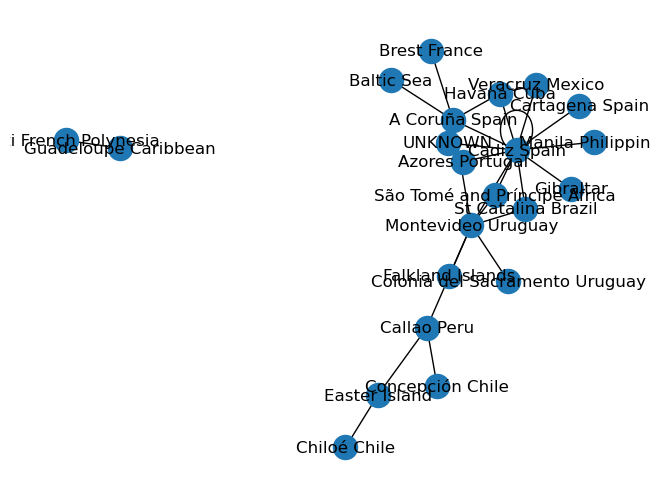

voyages.html


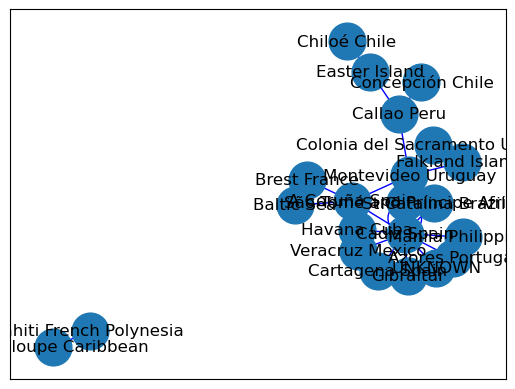

voyages.html


In [81]:
G = nx.from_pandas_edgelist(Updated_Spain_sorted_ship_voyages, 'VoyageFrom', 'VoyageTo')

nx.draw(G, with_labels=True)
plt.show()

net = Network(notebook=True)
net.from_nx(G)
net.show('voyages.html')

pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='blue')
nx.draw_networkx_labels(G, pos)
plt.show()


for node in G.nodes:
    net.add_node(node, title=node)

for edge in G.edges:
    net.add_edge(edge[0], edge[1])

net.show('voyages.html')



In [82]:
Updated_Spain_sorted_ship_voyages

VoyageIni          VoyageFrom            VoyageTo     ShipName  \
0      17770506.0  Montevideo Uruguay         Cadiz Spain      ANDALUZ   
1      17700114.0         Havana Cuba      A Coruña Spain       CORTES   
2      17711114.0         Havana Cuba      A Coruña Spain       CORTES   
3      17720802.0         Havana Cuba      A Coruña Spain       CORTES   
4      17721203.0      A Coruña Spain         Havana Cuba       CORTES   
..            ...                 ...                 ...          ...   
249    17790604.0      A Coruña Spain  Montevideo Uruguay     Tenerife   
250    17791207.0  Montevideo Uruguay      A Coruña Spain     Tenerife   
251  17771026.0.1  Montevideo Uruguay  St Catalina Brazil  SEPTENTRIÓN   
252  17780309.0.1  St Catalina Brazil         Cadiz Spain     PERPETUA   
253  17691226.0.1         Callao Peru    Concepción Chile  SEPTENTRIÓN   

       MinDate    MaxDate Duration HomeCountry       FormattedMin  \
0   1777-05-06 1777-08-11  97 days       Spain       May 06, 1777   
1   1770-01-14 1770-02-16  33 days       Spain   January 14, 1770   
2   1771-11-14 1772-02-12  90 days       Spain  November 14, 1771   
3   1772-08-02 1772-09-04  33 days       Spain    August 02, 1772   
4   1772-12-04 1773-01-10  37 days       Spain  December 04, 1772   
..         ...        ...      ...         ...                ...   
249 1779-06-04 1779-08-31  88 days       Spain      June 04, 1779   
250 1779-12-07 1779-12-31  24 days       Spain  December 07, 1779   
251 1777-10-26 1777-11-13  18 days       Spain   October 26, 1777   
252 1778-03-09 1778-08-05 149 days       Spain     March 09, 1778   
253 1770-01-01 1770-07-20 200 days       Spain   January 01, 1770   

           FormattedMax  
0       August 11, 1777  
1     February 16, 1770  
2     February 12, 1772  
3    September 04, 1772  
4      January 10, 1773  
..                  ...  
249     August 31, 1779  
250   December 31, 1779  
251   November 13, 1777  
252     August 05, 1778  
253       July 20, 1770  

[254 rows x 10 columns]

In [83]:
combined_df = pd.concat([Cleaned_France, Cleaned_UnitedKingdom, Cleaned_Spain,Cleaned_Netherlands], ignore_index=True)

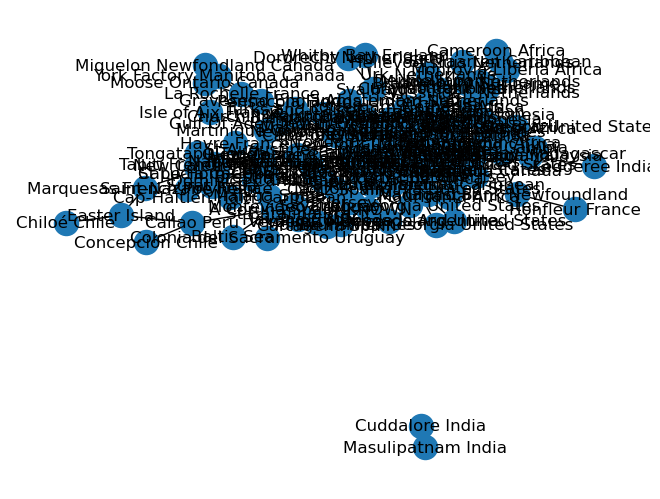

voyages.html


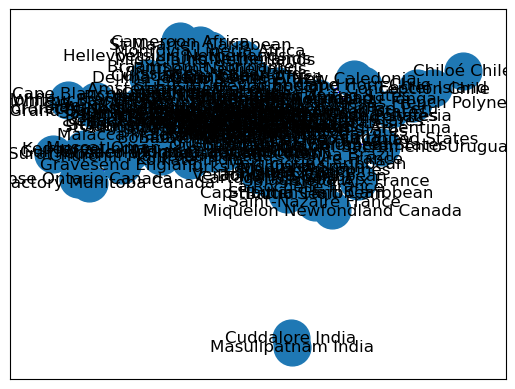

voyages.html


In [84]:
G = nx.from_pandas_edgelist(combined_df, 'VoyageFrom', 'VoyageTo')

nx.draw(G, with_labels=True)
plt.show()

net = Network(notebook=True)
net.from_nx(G)
net.show('voyages.html')

pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='blue')
nx.draw_networkx_labels(G, pos)
plt.show()


for node in G.nodes:
    net.add_node(node, title=node)

for edge in G.edges:
    net.add_edge(edge[0], edge[1])

net.show('voyages.html')

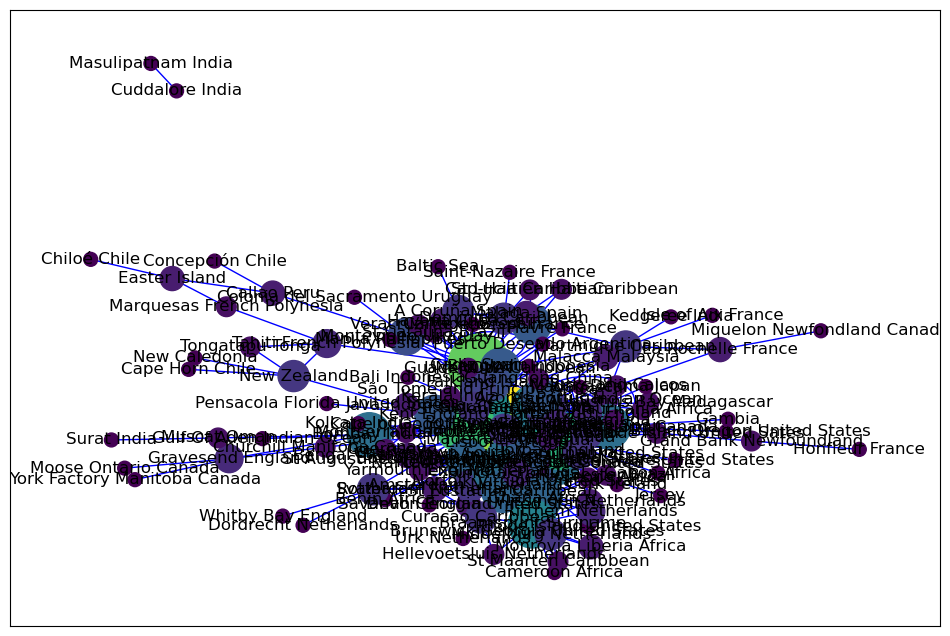

voyages.html


In [85]:
# Create a graph from the dataframe
G = nx.from_pandas_edgelist(combined_df, 'VoyageFrom', 'VoyageTo')

# Calculate node degree for size
node_size = [G.degree(node) * 100 for node in G.nodes()]

# Define node color based on degree (or any other criterion)
node_color = [G.degree(node) for node in G.nodes()]

# NetworkX Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes with the new size and color
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='blue')
nx.draw_networkx_labels(G, pos)
plt.show()

# Pyvis Visualization (to be executed in your local environment)
net = Network(notebook=True)
net.from_nx(G)

# Add nodes with specific attributes (size, color, title)
for node in G.nodes:
    net.add_node(node, title=node, size=G.degree(node) * 10, color=plt.cm.viridis(G.degree(node)/max(node_color)))

# Add edges
for edge in G.edges:
    net.add_edge(edge[0], edge[1])

# Save and show the network
net.show('voyages.html')


In [86]:
node_list = list(G.nodes)
pos = nx.spring_layout(G)
locations = {node: pos[node] for node in G.nodes()}
coordinates_list = [pos[node] for node in G.nodes()]


In [87]:
node_list


['Brest France',
 'Martinique Caribbean',
 'Cap-Haitien Haiti Caribbean',
 'Honfleur France',
 'Grand Bank Newfoundland',
 'Cadiz Spain',
 'Malaga Spain',
 'Dominica Caribbean',
 'Saint-Nazaire France',
 'La Rochelle France',
 'Turks and Caicos',
 'Isle of Aix France',
 'Havre France',
 'Guadeloupe Caribbean',
 'Mauritius Indian Ocean',
 'Miquelon Newfondland Canada',
 'St Lucia Caribbean',
 'New York United States',
 'Plymouth England',
 'Jersey',
 'Nova Scotia Canada',
 'St Johns Newfoundland Canada',
 'Portsmouth  England',
 'Lisbon Portugal',
 'London England',
 'Torbay England',
 'Madeira Portugal',
 'Cape Verde',
 'Ascension',
 'St Helena Island',
 'Antigua',
 'Tenerife Spain',
 'Newport Rhode Island United Sates',
 'Portsmouth England',
 'Cape of Good Hope South Africa',
 'Bombay India',
 'Pensacola Florida United States',
 'Kent England',
 'Yarmouth England',
 'Barbados',
 'Norfolk Virginia United States',
 'Chennai India',
 'Kerala India',
 'Jamaica',
 'Nantasket Massachusetts

In [88]:
# Filter the dataframe for voyages from Spain and the United Kingdom
spain_df = combined_df[combined_df['HomeCountry'] == 'Spain']
uk_df = combined_df[combined_df['HomeCountry'] == 'Netherlands']

# Extract unique locations (both 'VoyageFrom' and 'VoyageTo') for each country
spain_locations = set(pd.concat([spain_df['VoyageFrom'], spain_df['VoyageTo']]).unique())
uk_locations = set(pd.concat([uk_df['VoyageFrom'], uk_df['VoyageTo']]).unique())

# Find the common locations between Spain and the United Kingdom
common_locations = spain_locations.intersection(uk_locations)

# Count of common locations
common_locations_count = len(common_locations)

common_locations_count, common_locations



(1, {'Gibraltar'})

In [89]:
# Extracting unique countries from 'HomeCountry' column
unique_countries = combined_df['HomeCountry'].unique()

# Creating a dictionary to store the count of common locations for each pair of countries
common_locations_by_countries = {}

# Iterate over all combinations of two countries
for country1, country2 in combinations(unique_countries, 2):
    # Filter dataframes for each country
    country1_df = combined_df[combined_df['HomeCountry'] == country1]
    country2_df = combined_df[combined_df['HomeCountry'] == country2]

    # Extract unique locations for each country
    country1_locations = set(pd.concat([country1_df['VoyageFrom'], country1_df['VoyageTo']]).unique())
    country2_locations = set(pd.concat([country2_df['VoyageFrom'], country2_df['VoyageTo']]).unique())

    # Find common locations and count them
    common_locations = country1_locations.intersection(country2_locations)
    common_locations_count = len(common_locations)

    # Store the count in the dictionary
    common_locations_by_countries[(country1, country2)] = common_locations_count

common_locations_by_countries




{('France', 'UnitedKingdom'): 5,
 ('France', 'Spain'): 3,
 ('France', 'Netherlands'): 0,
 ('UnitedKingdom', 'Spain'): 8,
 ('UnitedKingdom', 'Netherlands'): 12,
 ('Spain', 'Netherlands'): 1}

/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/953898212.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  voyage_counts = combined_df['VoyageFrom'].append(combined_df['VoyageTo']).value_counts()
/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/953898212.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Number of Connections (Degree)')


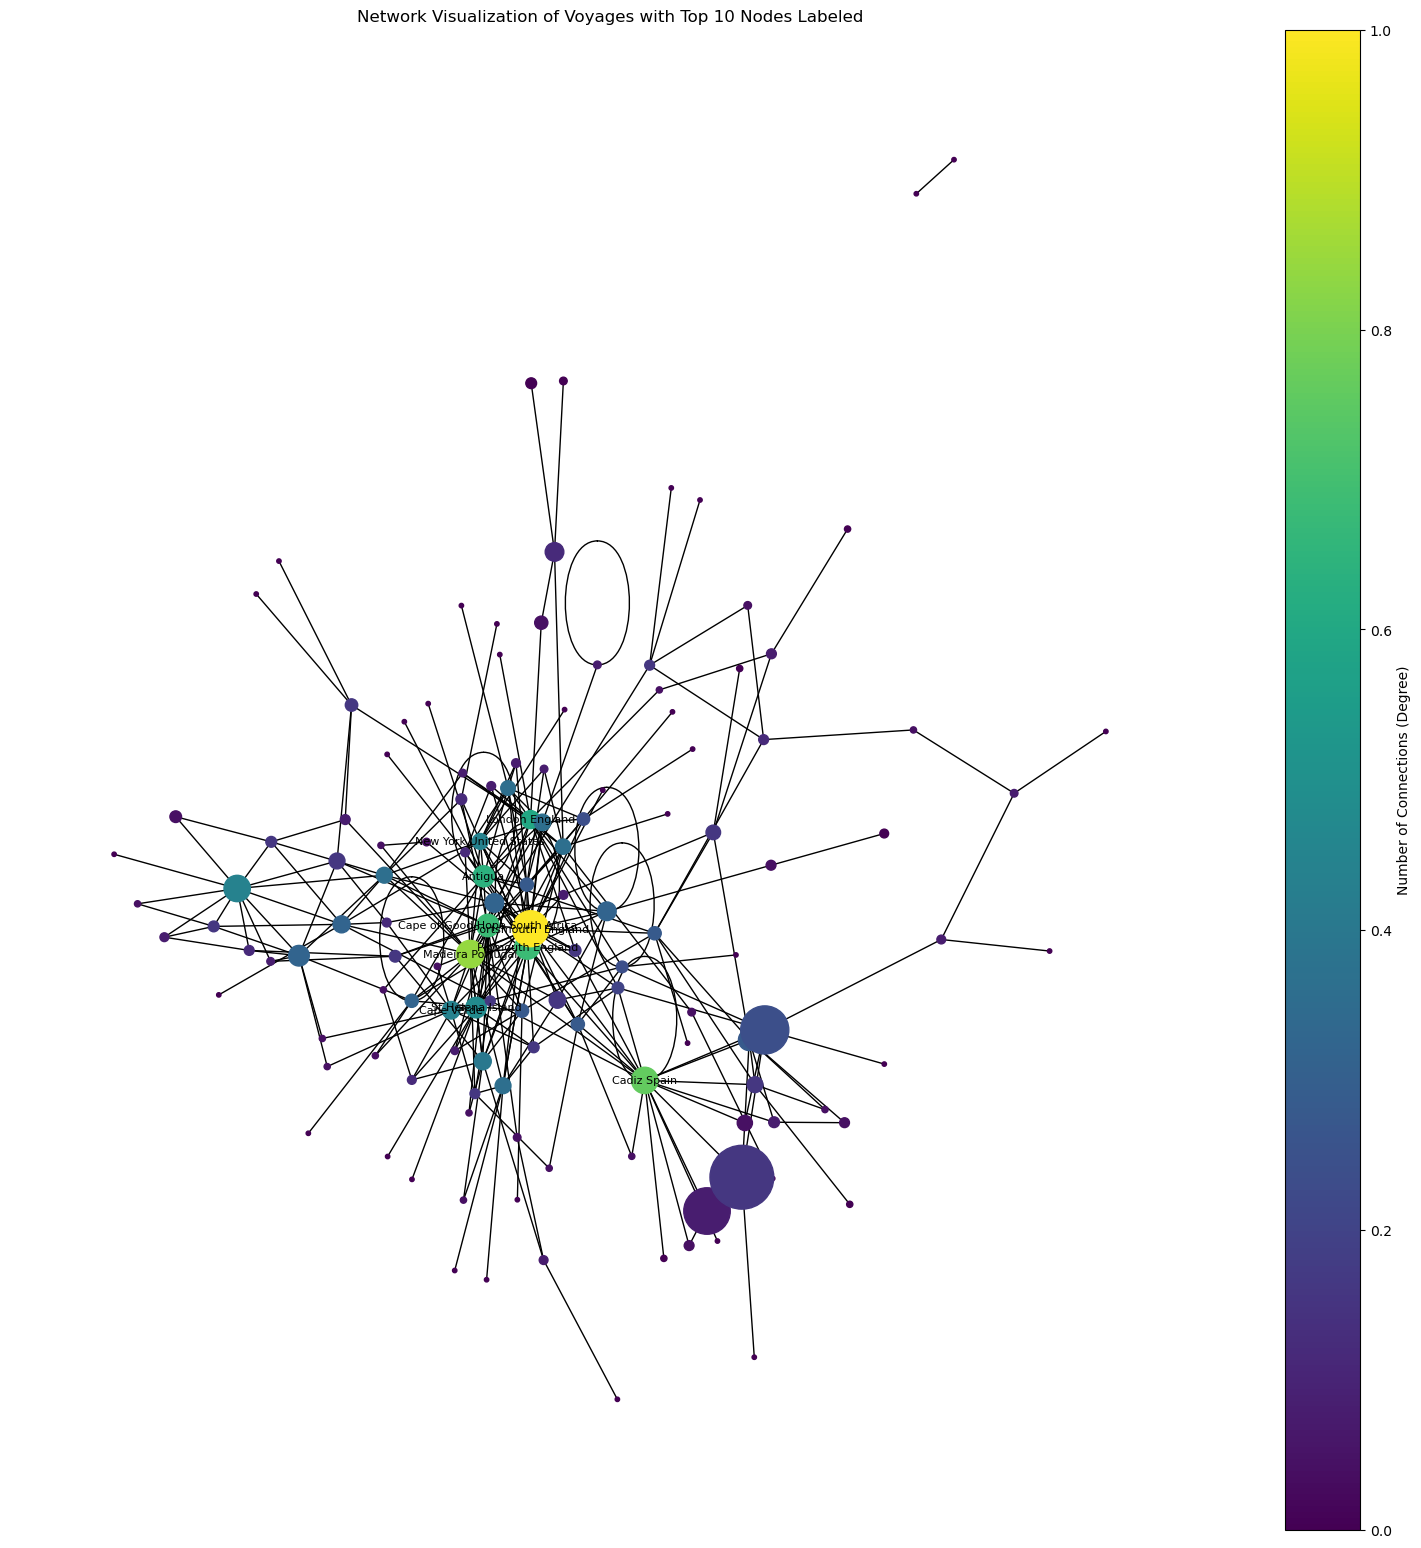

/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/953898212.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Number of Connections (Degree)')


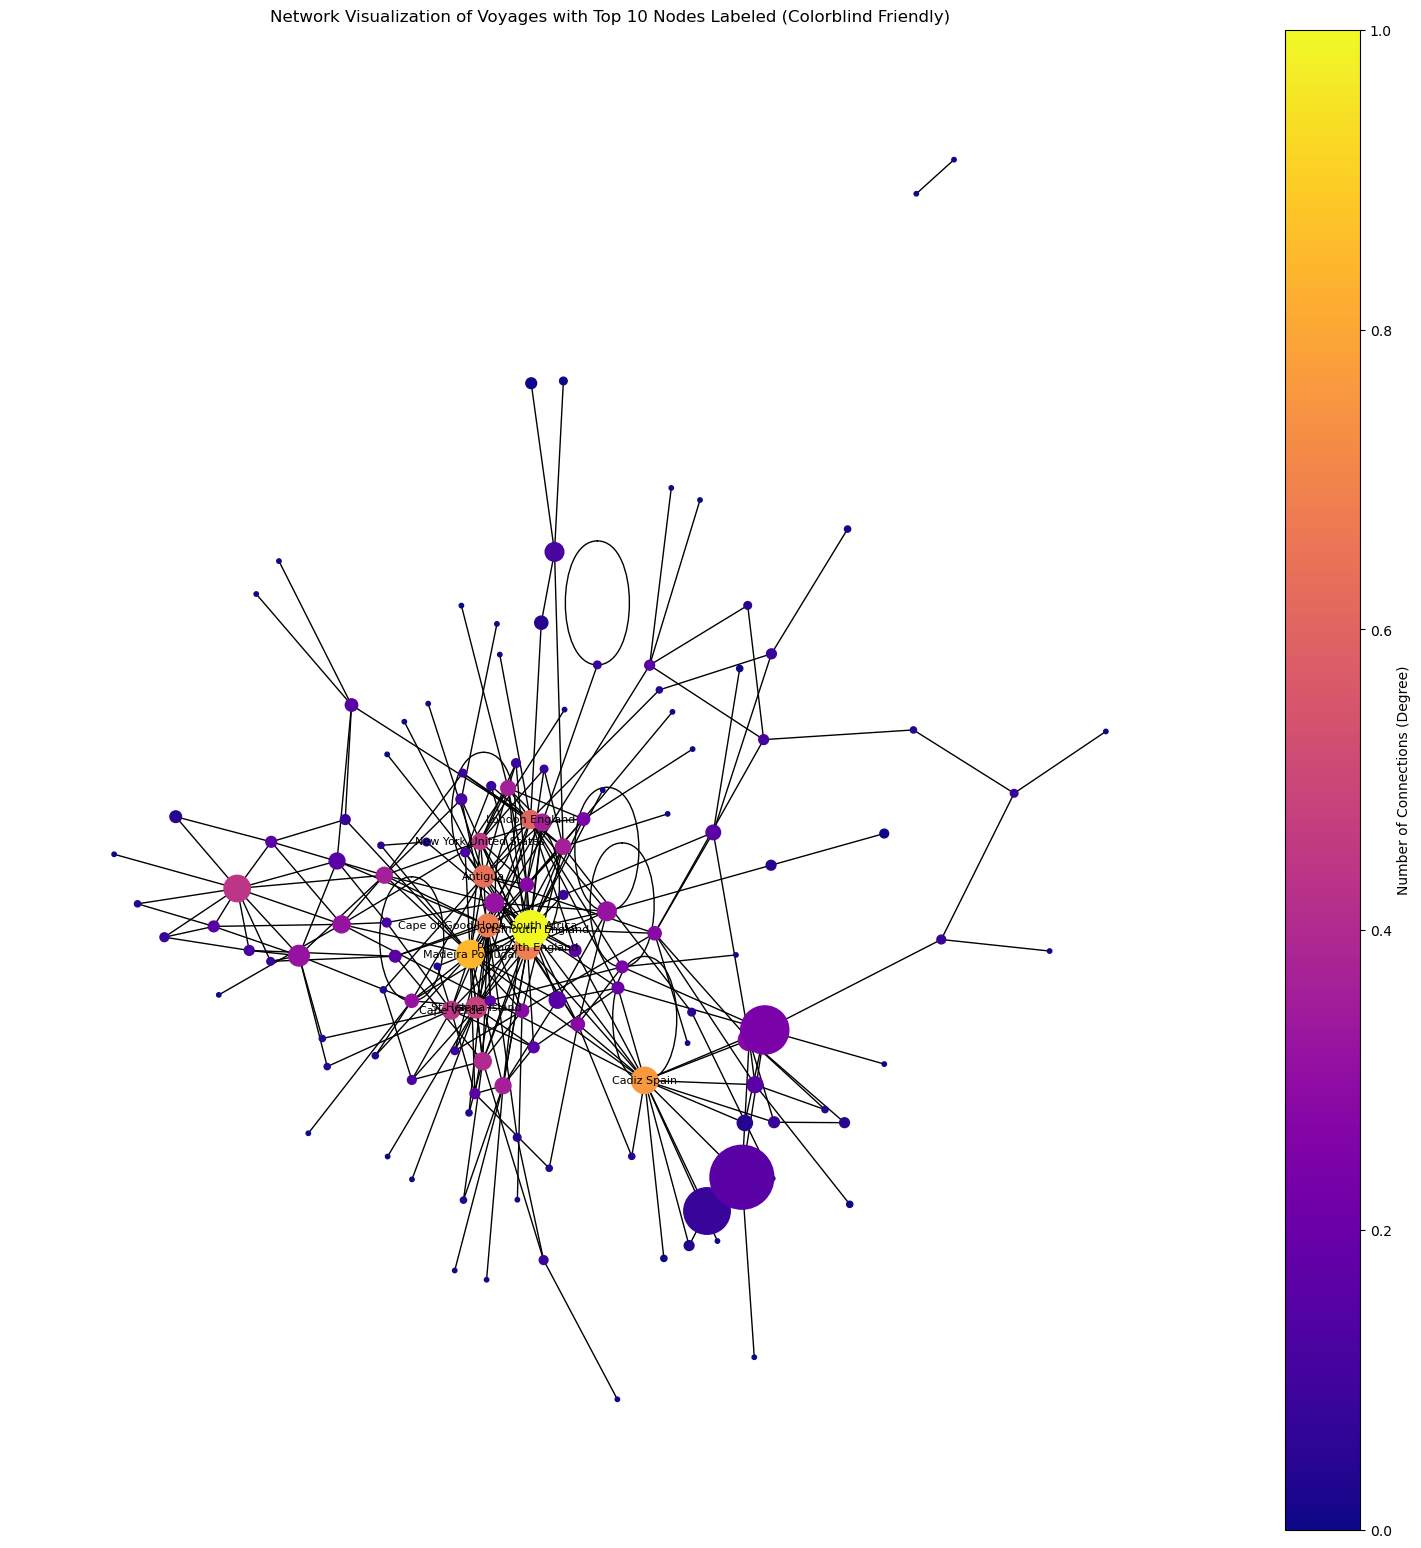

In [90]:


# Re-creating the graph
G = nx.Graph()
for index, row in combined_df.iterrows():
    G.add_edge(row['VoyageFrom'], row['VoyageTo'])

# Using the spring layout algorithm
pos = nx.spring_layout(G, k=0.15, iterations=50)

# Counting voyages for node size
voyage_counts = combined_df['VoyageFrom'].append(combined_df['VoyageTo']).value_counts()
node_sizes = [voyage_counts[port] * 10 for port in G.nodes()]

# Node colors based on degree
node_colors = [G.degree[port] for port in G.nodes()]

# Identifying the top 10 nodes (ports) based on their degree (number of connections)
top_10_ports = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
top_10_ports_dict = dict(top_10_ports)

# Creating a dictionary for node labels where only the top 10 nodes are labeled
labels = {node: node if node in top_10_ports_dict else '' for node in G.nodes()}

# Plotting the network with labels only for the top 10 nodes
plt.figure(figsize=(15, 15))
nx.draw(G, pos, labels=labels, with_labels=True, node_color=node_colors, node_size=node_sizes, cmap=plt.cm.viridis, font_size=8)
plt.title("Network Visualization of Voyages with Top 10 Nodes Labeled")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Number of Connections (Degree)')
plt.show()

# Node colors based on degree, using a colorblind-friendly colormap
node_colors = [G.degree[port] for port in G.nodes()]

# Plotting the network with labels only for the top 10 nodes
plt.figure(figsize=(15, 15))
nx.draw(G, pos, labels=labels, with_labels=True, node_color=node_colors, node_size=node_sizes, cmap=plt.cm.plasma, font_size=8)
plt.title("Network Visualization of Voyages with Top 10 Nodes Labeled (Colorblind Friendly)")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Number of Connections (Degree)')
plt.show()



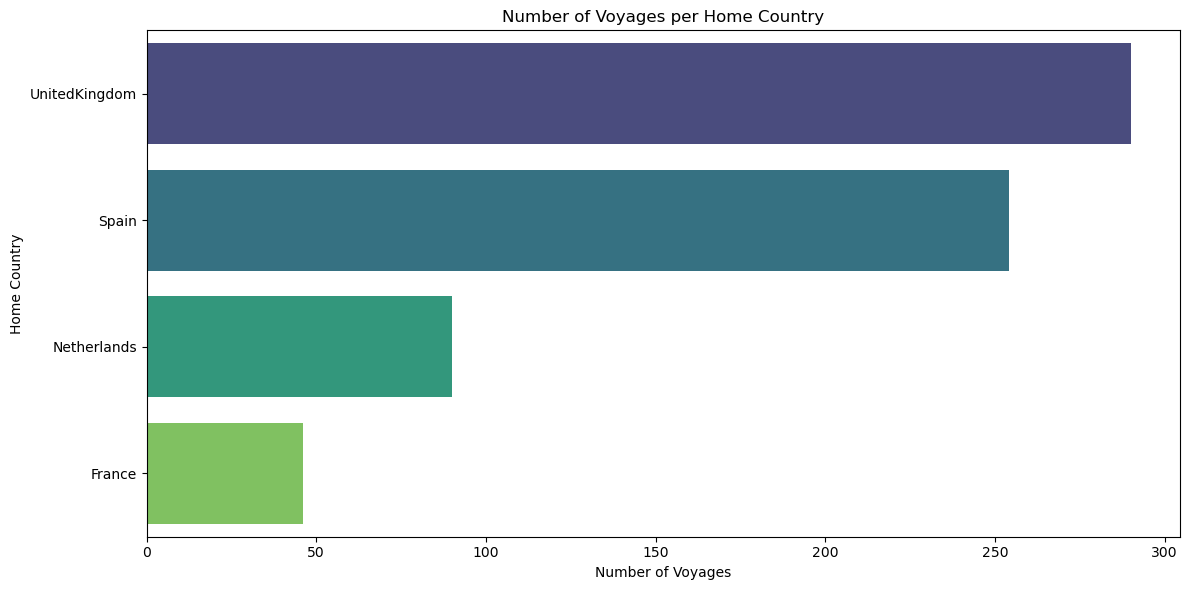

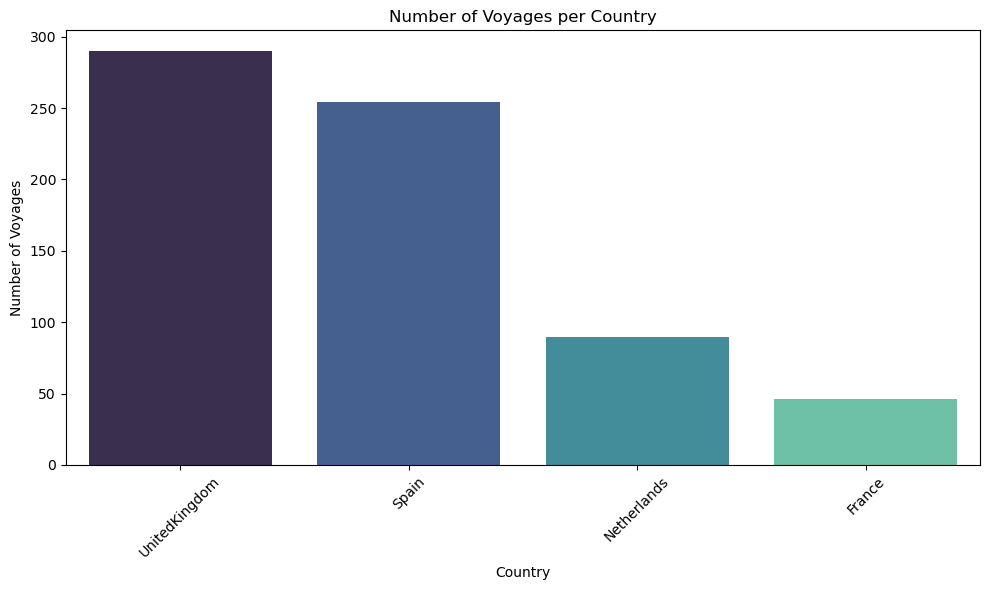

In [91]:
# Grouping the data by 'HomeCountry' and counting the number of voyages ('VoyageIni')
voyage_count = combined_df.groupby('HomeCountry')['VoyageIni'].count().reset_index()

# Sorting the data for better visualization
voyage_count_sorted = voyage_count.sort_values(by='VoyageIni', ascending=False)

# Creating a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='VoyageIni', y='HomeCountry', data=voyage_count_sorted, palette="viridis")
plt.title('Number of Voyages per Home Country')
plt.xlabel('Number of Voyages')
plt.ylabel('Home Country')
plt.tight_layout()

# Show the plot
plt.show()



# Creating a vertical bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='HomeCountry', y='VoyageIni', data=voyage_count_sorted, palette="mako")
plt.title('Number of Voyages per Country')
plt.xlabel('Country')
plt.ylabel('Number of Voyages')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()




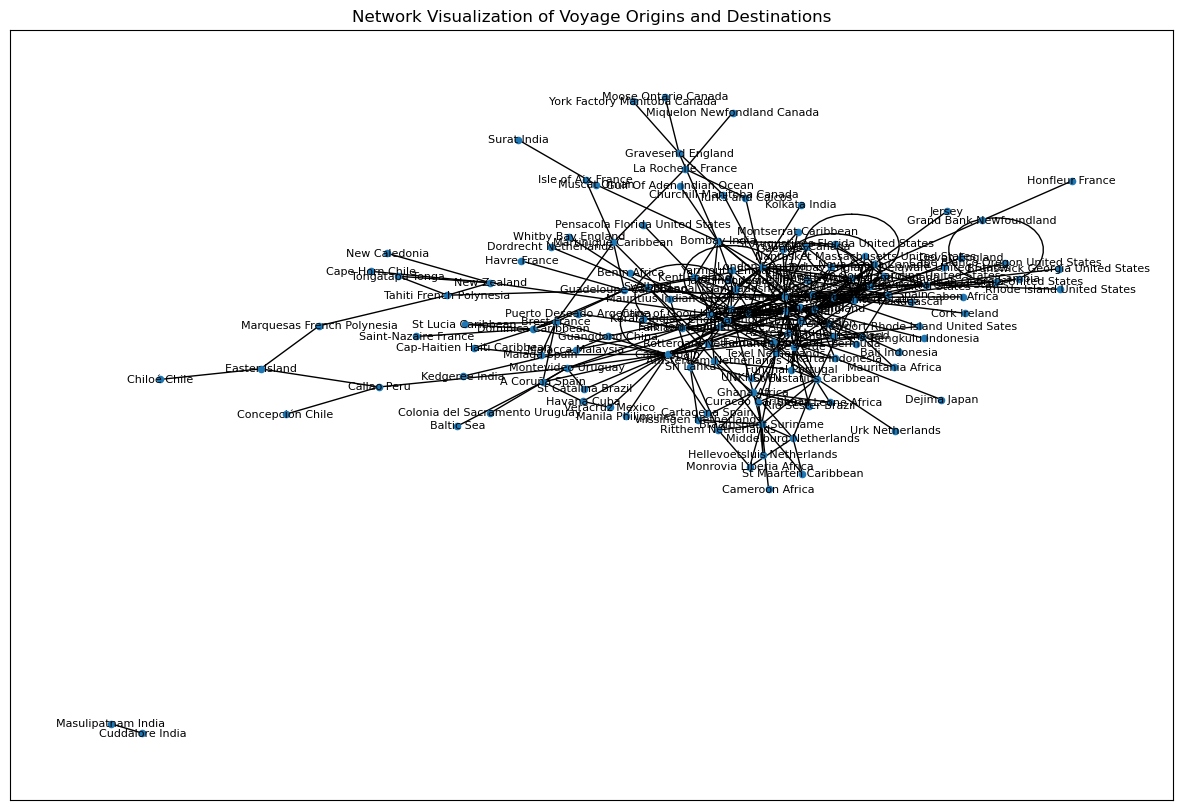

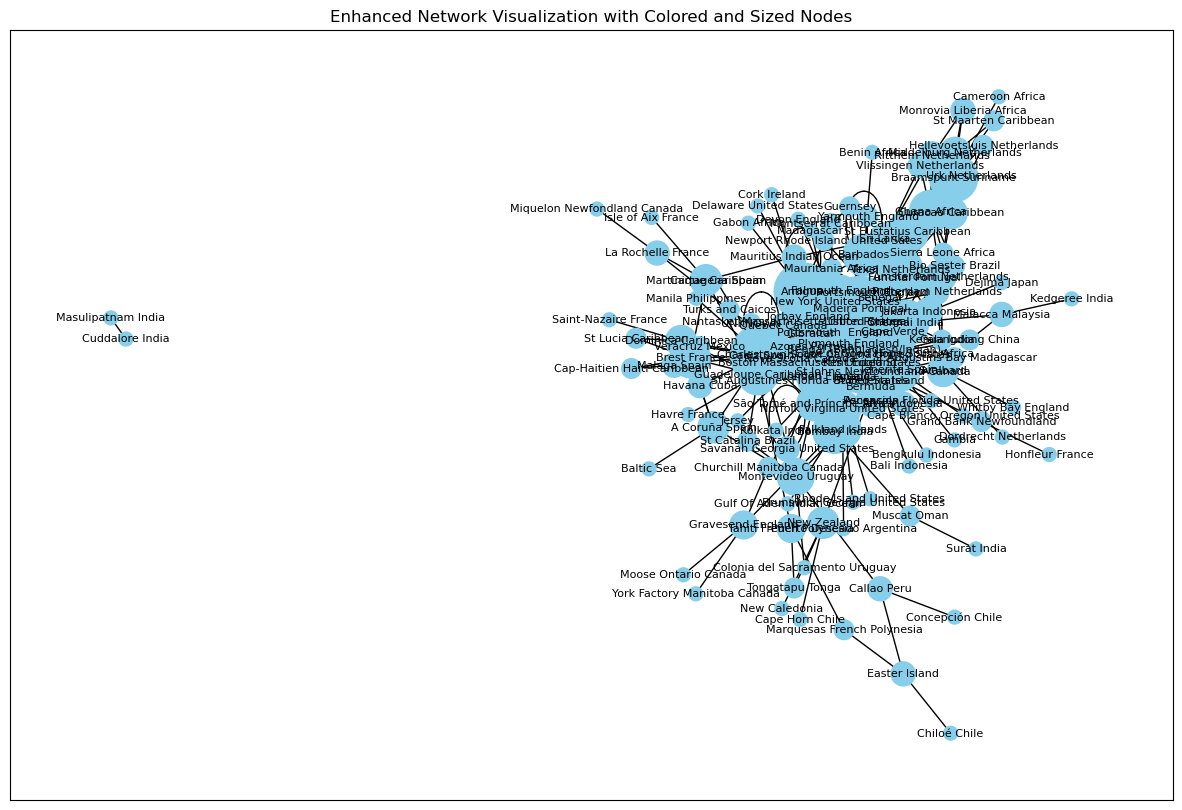

In [92]:


# Creating a graph from the voyage data
G = nx.from_pandas_edgelist(combined_df, 'VoyageFrom', 'VoyageTo')

# Drawing the network
plt.figure(figsize=(15, 10))
nx.draw_networkx(G, with_labels=True, node_size=20, font_size=8)
plt.title("Network Visualization of Voyage Origins and Destinations")
plt.show()


# Adjusting the color and size of the nodes in the network visualization

# Node sizes are determined by the number of connections (degree)
node_size = [G.degree(node) * 100 for node in G]

# Drawing the network with modified node colors and sizes
plt.figure(figsize=(15, 10))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', node_size=node_size, font_size=8)
plt.title("Enhanced Network Visualization with Colored and Sized Nodes")
plt.show()



/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/2586030573.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label='Node Degree')


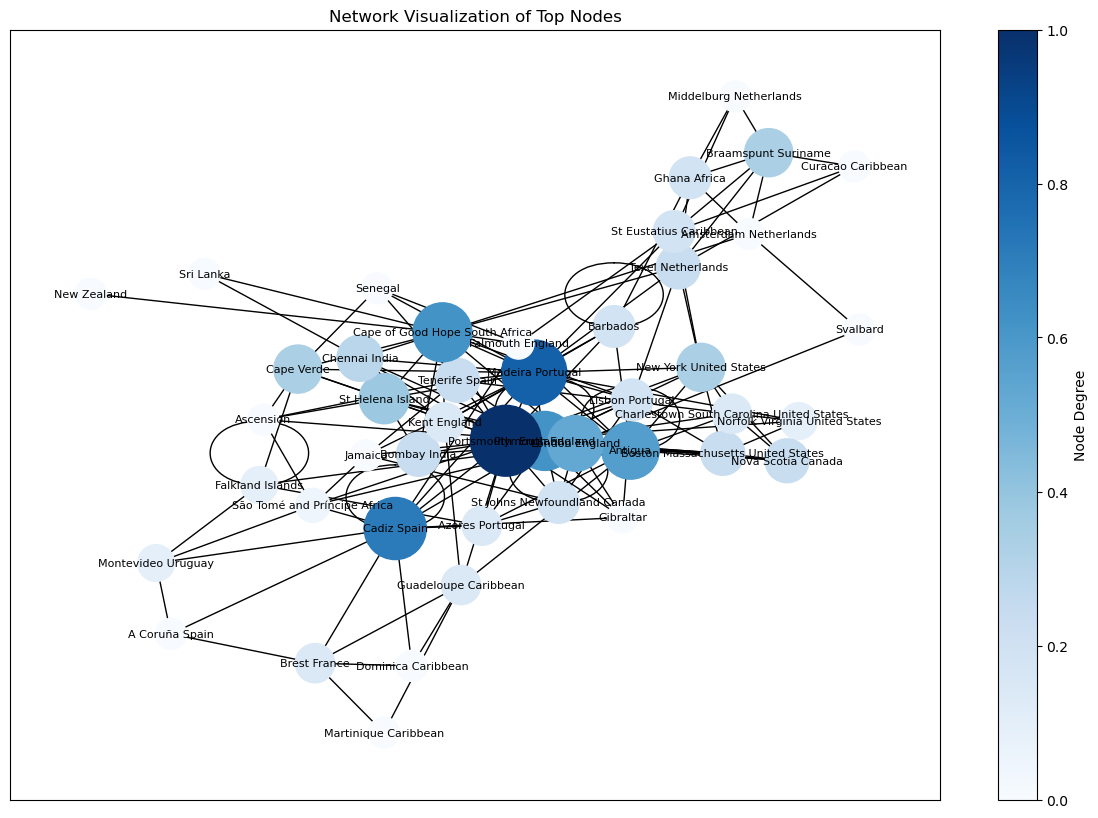

In [93]:
# To display only the top nodes, we need to identify nodes with the highest degrees
# Let's set a threshold to determine the "top" nodes

# Calculating degrees for all nodes
degrees = dict(G.degree())

# Determining a threshold for top nodes - for this example, we'll choose the 75th percentile
threshold = pd.Series(list(degrees.values())).quantile(0.75)

# Filtering the graph to include only nodes above the threshold
top_nodes = {node: degree for node, degree in degrees.items() if degree >= threshold}
top_subgraph = G.subgraph(top_nodes.keys())

# Drawing the network with only top nodes
plt.figure(figsize=(15, 10))
nx.draw_networkx(top_subgraph, with_labels=True, node_color=[top_nodes[node] for node in top_subgraph],
                 cmap=plt.cm.Blues, node_size=[top_nodes[node] * 100 for node in top_subgraph], font_size=8)
plt.title("Network Visualization of Top Nodes")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label='Node Degree')
plt.show()



/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/2376666469.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Node Degree')


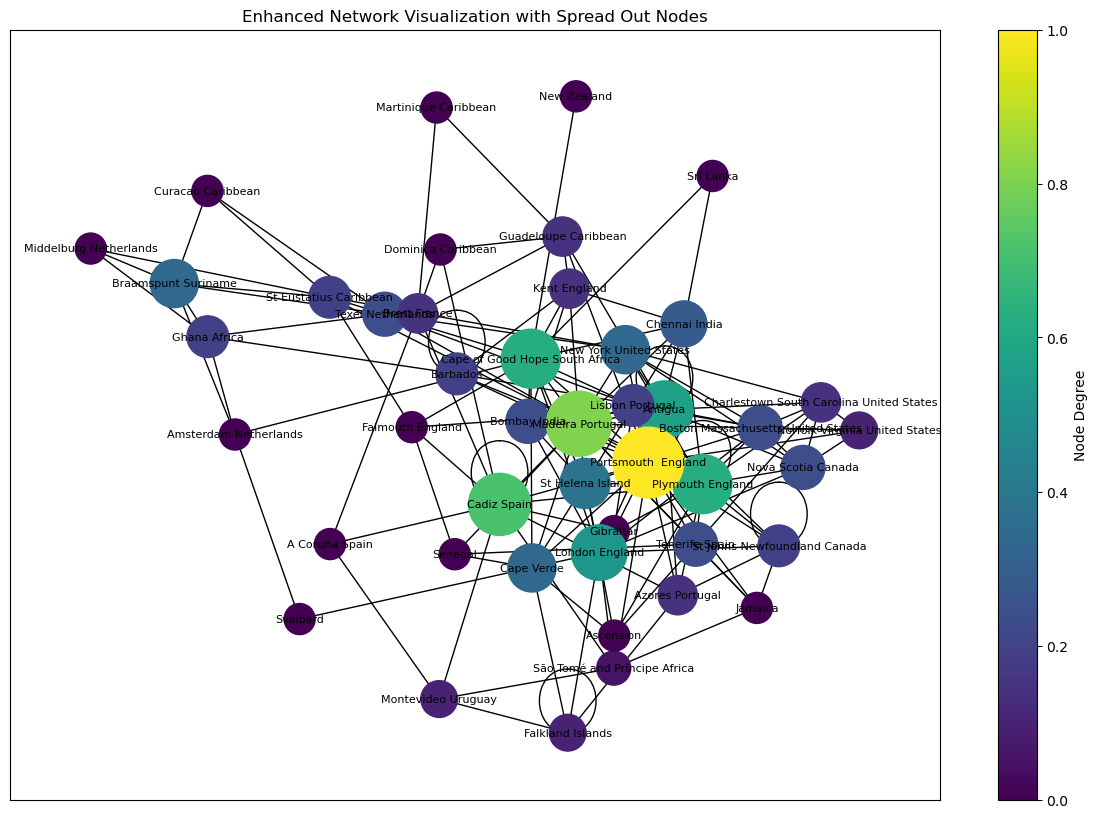

In [94]:
# Adjusting the layout to spread the nodes out and using a darker color map for better visibility

# Using the spring layout to spread nodes out more effectively
layout = nx.spring_layout(top_subgraph, k=0.15, iterations=20)

# Drawing the network with the new layout and a darker color map
plt.figure(figsize=(15, 10))
nx.draw_networkx(top_subgraph, pos=layout, with_labels=True, 
                 node_color=[top_nodes[node] for node in top_subgraph],
                 cmap=plt.cm.viridis, node_size=[top_nodes[node] * 100 for node in top_subgraph], font_size=8)
plt.title("Enhanced Network Visualization with Spread Out Nodes")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Node Degree')
plt.show()


/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/2066849019.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Diversity of Connections')


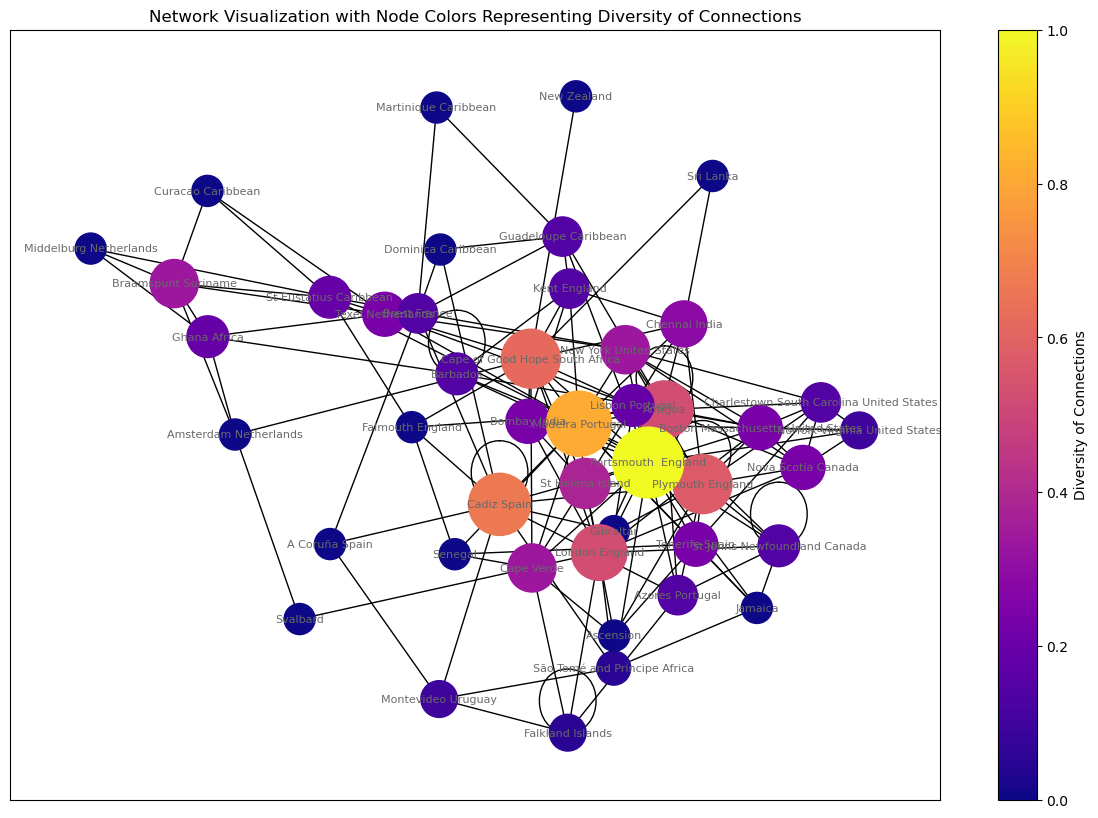

In [95]:
# Calculating the diversity of connections for each node
# Diversity is measured here as the number of unique connections each node has
def calculate_diversity(G, node):
    neighbors = list(nx.all_neighbors(G, node))
    return len(set(neighbors))

diversity = {node: calculate_diversity(G, node) for node in G.nodes()}

# Normalize diversity values for coloring
max_diversity = max(diversity.values())
min_diversity = min(diversity.values())
normalized_diversity = {node: (diversity[node] - min_diversity) / (max_diversity - min_diversity) 
                        for node in diversity}

# Adjusting node sizes for the top_subgraph
top_node_sizes = [top_nodes[node] * 100 for node in top_subgraph.nodes()]

# Filtering the diversity data for the nodes in the top subgraph
top_diversity = {node: normalized_diversity[node] for node in top_subgraph.nodes()}

# Drawing the network with corrected node sizes and diversity colors
plt.figure(figsize=(15, 10))
nx.draw_networkx(top_subgraph, pos=layout, with_labels=True, 
                 node_color=list(top_diversity.values()), cmap=plt.cm.plasma,
                 node_size=top_node_sizes, font_color='dimgrey', font_size=8)  # Set font_color to grey
plt.title("Network Visualization with Node Colors Representing Diversity of Connections")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Diversity of Connections')
plt.show()


/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/42721923.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Diversity of Connections')


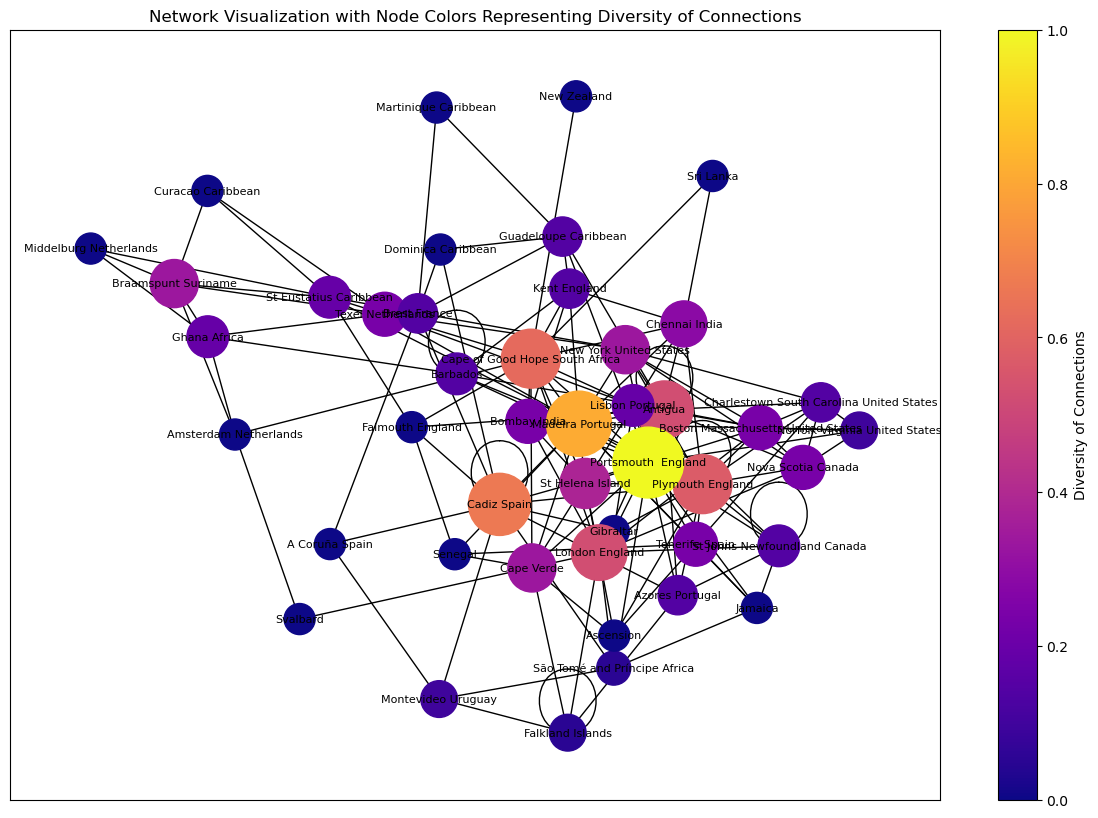

In [96]:
# Calculating the diversity of connections for each node
# Diversity is measured here as the number of unique connections each node has
def calculate_diversity(G, node):
    neighbors = list(nx.all_neighbors(G, node))
    return len(set(neighbors))

diversity = {node: calculate_diversity(G, node) for node in G.nodes()}

# Normalize diversity values for coloring
max_diversity = max(diversity.values())
min_diversity = min(diversity.values())
normalized_diversity = {node: (diversity[node] - min_diversity) / (max_diversity - min_diversity) 
                        for node in diversity}

# Adjusting node sizes for the top_subgraph
top_node_sizes = [top_nodes[node] * 100 for node in top_subgraph.nodes()]

# Filtering the diversity data for the nodes in the top subgraph
top_diversity = {node: normalized_diversity[node] for node in top_subgraph.nodes()}

# Drawing the network with corrected node sizes and diversity colors
plt.figure(figsize=(15, 10))
nx.draw_networkx(top_subgraph, pos=layout, with_labels=True, 
                 node_color=list(top_diversity.values()), cmap=plt.cm.plasma,
                 node_size=top_node_sizes, font_size=8)
plt.title("Network Visualization with Node Colors Representing Diversity of Connections")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Diversity of Connections')
plt.show()



/var/folders/gx/00rhw4l96ws8t6wj4d0r_m2c0000gn/T/ipykernel_72354/2044795024.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Diversity of Connections')


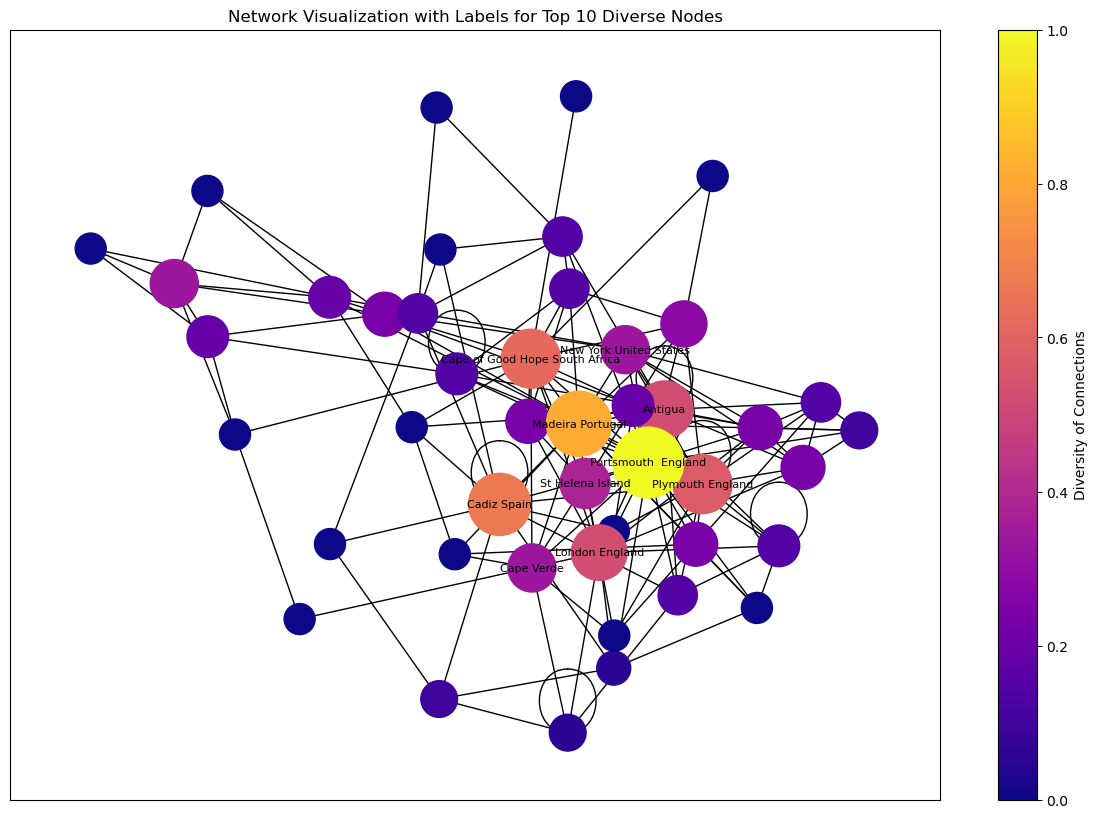

In [97]:
# Identifying the top 10 nodes with the highest diversity of connections
top_10_diverse_nodes = sorted(diversity, key=diversity.get, reverse=True)[:10]

# Creating a dictionary for node labels, labeling only the top 10 diverse nodes
labels = {node: node if node in top_10_diverse_nodes else '' for node in top_subgraph.nodes()}

# Drawing the network with labels only for the top 10 diverse nodes
plt.figure(figsize=(15, 10))
nx.draw_networkx(top_subgraph, pos=layout, labels=labels,
                 node_color=list(top_diversity.values()), cmap=plt.cm.plasma,
                 node_size=top_node_sizes, font_size=8)
plt.title("Network Visualization with Labels for Top 10 Diverse Nodes")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='Diversity of Connections')
plt.show()


In [98]:
top_10_diverse_nodes

['Portsmouth  England',
 'Madeira Portugal',
 'Cadiz Spain',
 'Cape of Good Hope South Africa',
 'Plymouth England',
 'London England',
 'Antigua',
 'St Helena Island',
 'New York United States',
 'Cape Verde']

In [99]:
# To find out how many locations each home country has in common with one another,
# we need to consider both 'VoyageFrom' and 'VoyageTo' for each country.

# Extracting unique locations for each home country
unique_locations_per_country = combined_df.groupby('HomeCountry').apply(
    lambda x: set(x['VoyageFrom']).union(set(x['VoyageTo']))
)

# Calculating the number of common locations between each pair of countries
common_locations = {
    (country1, country2): len(locations1.intersection(locations2))
    for country1, locations1 in unique_locations_per_country.items()
    for country2, locations2 in unique_locations_per_country.items()
    if country1 != country2
}

common_locations_df = pd.Series(common_locations).unstack()
common_locations_df.fillna(0, inplace=True)  # Replace NaNs with 0s
common_locations_df


France  Netherlands  Spain  UnitedKingdom
France            0.0          0.0    3.0            5.0
Netherlands       0.0          0.0    1.0           12.0
Spain             3.0          1.0    0.0            8.0
UnitedKingdom     5.0         12.0    8.0            0.0

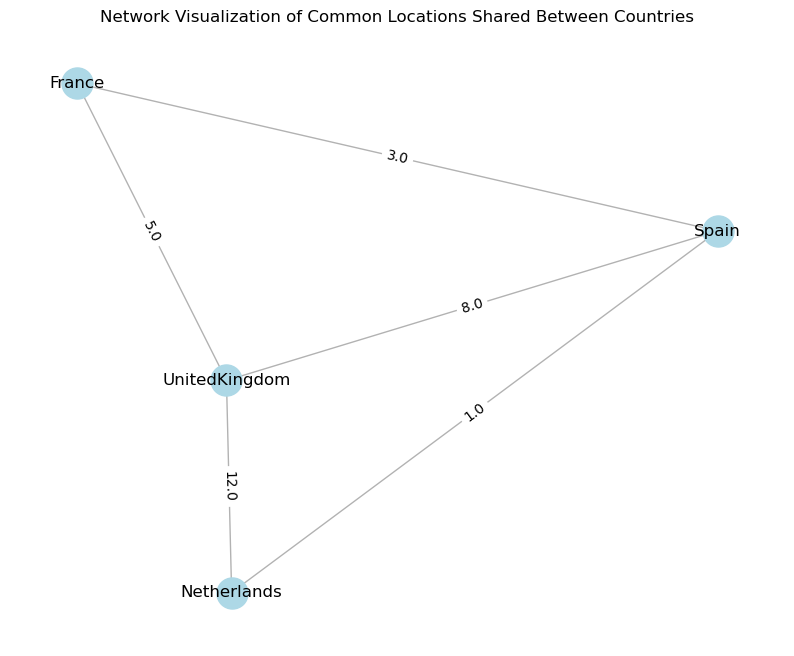

In [100]:
# Creating a network visualization to represent the common locations shared between countries

# Creating a graph for country relationships
G_countries = nx.Graph()

# Adding edges between countries with weights equal to the number of common locations
for country1, country2, common_locations in common_locations_df.stack().reset_index().values:
    if common_locations > 0:
        G_countries.add_edge(country1, country2, weight=common_locations)

# Drawing the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_countries, k=0.3, iterations=20)  # layout for better visibility
edges = nx.draw_networkx_edges(G_countries, pos, alpha=0.3, width=1)
nx.draw_networkx_nodes(G_countries, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G_countries, pos, font_size=12)
nx.draw_networkx_edge_labels(G_countries, pos, edge_labels=nx.get_edge_attributes(G_countries, 'weight'))

plt.title("Network Visualization of Common Locations Shared Between Countries")
plt.axis('off')  # Turn off the axis
plt.show()


In [101]:
# Calculating the specific common locations between each pair of countries

common_places = {
    (country1, country2): list(locations1.intersection(locations2))
    for country1, locations1 in unique_locations_per_country.items()
    for country2, locations2 in unique_locations_per_country.items()
    if country1 != country2 and locations1.intersection(locations2)
}

common_places_df = pd.DataFrame([
    {"Country1": pair[0], "Country2": pair[1], "Common Places": places}
    for pair, places in common_places.items()
])

common_places_df


Country1       Country2  \
0         France          Spain   
1         France  UnitedKingdom   
2    Netherlands          Spain   
3    Netherlands  UnitedKingdom   
4          Spain         France   
5          Spain    Netherlands   
6          Spain  UnitedKingdom   
7  UnitedKingdom         France   
8  UnitedKingdom    Netherlands   
9  UnitedKingdom          Spain   

                                       Common Places  
0  [Guadeloupe Caribbean, Cadiz Spain, Brest France]  
1  [Grand Bank Newfoundland, Mauritius Indian Oce...  
2                                        [Gibraltar]  
3  [Cape of Good Hope South Africa, Madeira Portu...  
4  [Guadeloupe Caribbean, Cadiz Spain, Brest France]  
5                                        [Gibraltar]  
6  [Falkland Islands, Guadeloupe Caribbean, São T...  
7  [Grand Bank Newfoundland, Mauritius Indian Oce...  
8  [Cape of Good Hope South Africa, Madeira Portu...  
9  [Falkland Islands, Guadeloupe Caribbean, São T...

In [102]:

# To show each location and the home countries associated with it, we need to reorganize the data.

# Combining 'VoyageFrom' and 'VoyageTo' into a single column
combined_locations = pd.concat([combined_df['VoyageFrom'], combined_df['VoyageTo']], axis=0).reset_index(drop=True)

# Combining the above with 'HomeCountry' to associate each location with countries
location_country_association = pd.concat([combined_locations, pd.concat([combined_df['HomeCountry'], combined_df['HomeCountry']], axis=0).reset_index(drop=True)], axis=1)
location_country_association.columns = ['Location', 'HomeCountry']

# Grouping by location to find all associated home countries
location_countries = location_country_association.groupby('Location')['HomeCountry'].unique().reset_index()
location_countries['HomeCountries'] = location_countries['HomeCountry'].apply(lambda x: ', '.join(x))
location_countries.drop('HomeCountry', axis=1, inplace=True)

location_countries.head()  # Displaying the first few rows of the result



# Correcting the approach to find the top 12 locations with the most associations

# Counting the number of associations (countries) for each location
location_countries['AssociationCount'] = location_countries['HomeCountries'].str.count(',') + 1

# Finding the top 12 locations with the most associations
top_12_associations = location_countries.nlargest(50, 'AssociationCount')
top_12_associations


Location  \
17                                Cadiz Spain   
47                                  Gibraltar   
50                       Guadeloupe Caribbean   
4                             Azores Portugal   
8                  Bengal (Bangladesh/Indian)   
15                               Brest France   
23                                 Cape Verde   
24             Cape of Good Hope South Africa   
40                              Easter Island   
41                           Falkland Islands   
42                           Falmouth England   
46                               Ghana Africa   
48                    Grand Bank Newfoundland   
59                          Jakarta Indonesia   
68                            Lisbon Portugal   
71                           Madeira Portugal   
79                     Mauritius Indian Ocean   
89                     New York United States   
108                                 Sri Lanka   
118                                  Svalbard   
119              São Tomé and Príncipe Africa   
120                   Tahiti French Polynesia   
125                          Turks and Caicos   
0                              A Coruña Spain   
1                       Amsterdam Netherlands   
2                                     Antigua   
3                                   Ascension   
5                              Bali Indonesia   
6                                  Baltic Sea   
7                                    Barbados   
9                          Bengkulu Indonesia   
10                               Benin Africa   
11                                    Bermuda   
12                               Bombay India   
13         Boston Massachusetts United States   
14                        Braamspunt Suriname   
16            Brunswick Georgia United States   
18                                Callao Peru   
19                            Cameroon Africa   
20                Cap-Haitien Haiti Caribbean   
21           Cape Blanco Oregon United States   
22                            Cape Horn Chile   
25                            Cartagena Spain   
26   Charlestown South Carolina United States   
27                              Chennai India   
28                               Chiloé Chile   
29                  Churchill Manitoba Canada   
30             Colonia del Sacramento Uruguay   
31                           Concepción Chile   
32                               Cork Ireland   

                         HomeCountries  AssociationCount  
17        France, UnitedKingdom, Spain                 3  
47   UnitedKingdom, Netherlands, Spain                 3  
50        France, UnitedKingdom, Spain                 3  
4                 UnitedKingdom, Spain                 2  
8           UnitedKingdom, Netherlands                 2  
15                       France, Spain                 2  
23          UnitedKingdom, Netherlands                 2  
24          UnitedKingdom, Netherlands                 2  
40                UnitedKingdom, Spain                 2  
41                UnitedKingdom, Spain                 2  
42          UnitedKingdom, Netherlands                 2  
46          UnitedKingdom, Netherlands                 2  
48               France, UnitedKingdom                 2  
59          Netherlands, UnitedKingdom                 2  
68          UnitedKingdom, Netherlands                 2  
71          UnitedKingdom, Netherlands                 2  
79               France, UnitedKingdom                 2  
89          UnitedKingdom, Netherlands                 2  
108         UnitedKingdom, Netherlands                 2  
118         UnitedKingdom, Netherlands                 2  
119               UnitedKingdom, Spain                 2  
120               UnitedKingdom, Spain                 2  
125              France, UnitedKingdom                 2  
0                                Spain                 1  
1                          Netherlands                 1  
2  

In [103]:
# Re-evaluating the approach to calculate the nodes with the most number of connections (degree)
# and diversity of connections

# Most number of connections (degree)
most_connected_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]

# Diversity of connections: Calculating the number of unique destinations for each origin
diversity_of_connections = {}
for node in G.nodes:
    unique_destinations = set(G.neighbors(node))
    diversity_of_connections[node] = len(unique_destinations)

most_diverse_connections = sorted(diversity_of_connections.items(), key=lambda x: x[1], reverse=True)[:10]
                                                                



In [104]:
most_diverse_connections

[('Portsmouth  England', 26),
 ('Madeira Portugal', 22),
 ('Cadiz Spain', 19),
 ('Cape of Good Hope South Africa', 18),
 ('Plymouth England', 17),
 ('London England', 16),
 ('Antigua', 16),
 ('St Helena Island', 13),
 ('New York United States', 12),
 ('Cape Verde', 12)]

In [105]:
most_connected_nodes

[('Portsmouth  England', 26),
 ('Madeira Portugal', 22),
 ('Cadiz Spain', 20),
 ('Plymouth England', 18),
 ('Cape of Good Hope South Africa', 18),
 ('Antigua', 17),
 ('London England', 16),
 ('St Helena Island', 13),
 ('New York United States', 12),
 ('Cape Verde', 12)]

In [106]:
# Counting the unique combinations of 'VoyageFrom' and 'VoyageTo' to determine the number of unique routes
unique_routes = combined_df[['VoyageFrom', 'VoyageTo']].drop_duplicates()
number_of_routes = unique_routes.shape[0]
number_of_routes



341

In [107]:
# To consider routes as the same regardless of the order, we need to create a set of the two locations for each row
# and then find the unique sets.

# Creating a set for each row
route_sets = combined_df.apply(lambda row: frozenset([row['VoyageFrom'], row['VoyageTo']]), axis=1)

# Counting unique sets
unique_bidirectional_routes = set(route_sets)
number_of_bidirectional_routes = len(unique_bidirectional_routes)
number_of_bidirectional_routes


297